Привет, Дима!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-info">
<b>💾 Благодарность:</b> 
Спасибо за тщательную и подробную проверку проекта. Замечания были полезны.
</div>


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе большое за оформление оглавления проекта. 
</div 

## Откройте файл с данными и изучите общую информацию. 

### Открываем файл

Импортируем необходимые библиотеки.

In [1]:
import sys
!{sys.executable} -m pip install missingno

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import random
import missingno as msno
import operator

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    pass

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод используешь для открытия проекта на разных платформах. 
</div 

### Изучаем данные

In [3]:
display(data.sample(2))

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
8247   10\t3800000.0\t74.0\t2016-04-19T00:00:00\t3\t\...                                                                                                                                                                                                                                                                  
12328  11\t5800000.0\t91.0\t2018-11-19T00:00:00\t3\t2...

Данные импортировались неправильно - необходимо исправить.

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    pass

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, c разделителем намного лучше. 
</div 

Ещё раз попробуем

In [5]:
display(data.sample(10))
display(data.head(10))

total_images  last_price  total_area first_day_exposition  rooms  \
4420             12   3200000.0        60.0  2016-05-14T00:00:00      3   
2998              6   9500000.0        78.0  2018-11-14T00:00:00      3   
14625             8   7640000.0       115.0  2018-02-21T00:00:00      4   
7984             18   6700000.0        84.1  2016-06-07T00:00:00      3   
16424            14   4600000.0        45.0  2019-02-11T00:00:00      2   
1513             12   9500000.0       114.0  2018-08-14T00:00:00      3   
22711            10   3950000.0        37.9  2019-03-07T00:00:00      1   
20291             3   4630000.0        35.0  2018-01-11T00:00:00      1   
13518            10   1850000.0        32.0  2017-08-28T00:00:00      1   
23066             3   8800000.0        72.0  2017-05-19T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
4420              NaN           5.0         42.0      1        False  ...   
2998             2.75          25.0         47.0     22          NaN  ...   
14625            2.78          18.0         65.0     10          NaN  ...   
7984              NaN           5.0         52.2      5          NaN  ...   
16424            2.60          14.0         24.7     10          NaN  ...   
1513             2.80          10.0          NaN      2          NaN  ...   
22711            2.78          17.0         16.4      3          NaN  ...   
20291             NaN          25.0          NaN      7          NaN  ...   
13518             NaN           5.0         18.0      2          NaN  ...   
23066            3.00           7.0          NaN      6          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
4420            7.0      0.0           Выборг               NaN   
2998           10.5      NaN  Санкт-Петербург           32837.0   
14625          15.0      NaN  Санкт-Петербург           15957.0   
7984           14.3      0.0         Петергоф           39818.0   
16424           7.4      NaN  Санкт-Петербург           36909.0   
1513           29.0      2.0  Санкт-Петербург           35979.0   
22711           9.1      NaN  Санкт-Петербург           17209.0   
20291           NaN      NaN  Санкт-Петербург           35715.0   
13518           5.0      NaN         Отрадное               NaN   
23066           NaN      NaN  Санкт-Петербург           11891.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
4420                  NaN               NaN            NaN               NaN   
2998              13936.0               0.0            NaN               0.0   
14625             14753.0               1.0          820.0               0.0   
7984              32499.0               0.0            NaN               0.0   
16424             10659.0               1.0          257.0               0.0   
1513              16280.0               0.0            NaN               0.0   
22711             16005.0               1.0          557.0               2.0   
20291              9238.0               0.0            NaN               1.0   
13518                 NaN               NaN            NaN               NaN   
23066              9647.0               1.0          544.0               3.0   

       ponds_nearest  days_exposition  
4420             NaN            254.0  
2998             NaN             34.0  
14625            NaN            313.0  
7984             NaN             49.0  
16424            NaN             29.0  
1513             NaN            121.0  
22711          830.0             37.0  
20291          293.0             60.0  
13518            NaN            101.0  
23066          585.0            200.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

### Описание данных.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о данных получена. Супер. 
</div 

До этапа предобработки данных можно заметить, что из 22 столбцов следующие имеют ячейки с пустыми значениями: 
- `ceiling_height`
- `floors_total`
- `living_area`
- `is_apartment`
- `kitchen_area`
- `balcony`
- `locality_name`
- `airports_nearest`
- `cityCenters_neares`
- `parks_around3000`
- `parks_nearest`
- `days_exposition`

Также можно заметить, что многие строки не используют оптимальный тип данных в условиях данной задачи. int64 для количества комнат и другие. Нужно это также будут исправить.

In [7]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

Хочется сначала отметить, что в базе данных присутствуют заявления, где общая площадь меньше чем сумма кухни и жилой части.

In [8]:
data.query('living_area + kitchen_area > total_area')

total_images  last_price  total_area first_day_exposition  rooms  \
184               7   2600000.0       30.20  2018-02-14T00:00:00      1   
545               9   4700000.0       23.80  2018-12-28T00:00:00      1   
551               8   3100000.0       31.59  2018-03-08T00:00:00      1   
601              12   5600000.0       53.70  2017-04-18T00:00:00      2   
696               1   3364930.0       34.69  2014-11-27T00:00:00      1   
...             ...         ...         ...                  ...    ...   
21824            20   2450000.0       44.00  2019-02-12T00:00:00      2   
21868            12   2600000.0       34.30  2018-09-26T00:00:00      1   
21915            14  11990000.0       91.40  2016-05-16T00:00:00      2   
21956             0   5200000.0       46.00  2018-07-20T00:00:00      2   
23202            13   4919880.0       67.92  2018-10-23T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
184              2.65           9.0        26.10      5          NaN  ...   
545               NaN          18.0        20.00      9          NaN  ...   
551              2.70          19.0        30.55      2          NaN  ...   
601              2.50          12.0        48.30      5          NaN  ...   
696              2.64          25.0        23.43     25          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
21824           27.00           2.0        38.00      2        False  ...   
21868            2.50           9.0        30.60      6          NaN  ...   
21915             NaN          16.0        62.00     12          NaN  ...   
21956             NaN           5.0        44.00      5          NaN  ...   
23202             NaN           3.0        63.00      3          NaN  ...   

       kitchen_area  balcony                    locality_name  \
184            6.20      NaN                  Санкт-Петербург   
545            5.00      NaN                  Санкт-Петербург   
551            9.28      2.0                   посёлок Мурино   
601            7.00      2.0                  Санкт-Петербург   
696           23.43      2.0                  Санкт-Петербург   
...             ...      ...                              ...   
21824          8.60      2.0  городской поселок Большая Ижора   
21868          8.00      2.0                     Сосновый Бор   
21915         32.40      0.0                  Санкт-Петербург   
21956          8.00      1.0                  Санкт-Петербург   
23202         13.04      NaN                       Всеволожск   

       airports_nearest cityCenters_nearest  parks_around3000  parks_nearest  \
184             13952.0             15031.0               0.0            NaN   
545              9731.0             11849.0               0.0            NaN   
551                 NaN                 NaN               NaN            NaN   
601             50477.0             13252.0               2.0          220.0   
696             43396.0             12153.0               0.0            NaN   
...                 ...                 ...               ...            ...   
21824               NaN                 NaN               NaN            NaN   
21868               NaN                 NaN               NaN            NaN   
21915           10934.0             12551.0               0.0            NaN   
21956           14103.0             15182.0               1.0          488.0   
23202               NaN                 NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
184                 1.0          824.0             12.0  
545                 0.0            NaN            108.0  
551                 NaN            NaN             70.0  
601                 1.0         1250.0            167.0  
696                 0.0            NaN            574.0  
...                 ...            ...              ...  
21824               NaN          

Если бы это была разница на порядок, то можно было предположить, что просто ошиблись нулем, но поскольку разница всего лишь в единицах, то в итоге это равенство просто не будет проверяться.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, согласен с тобой. 
</div 

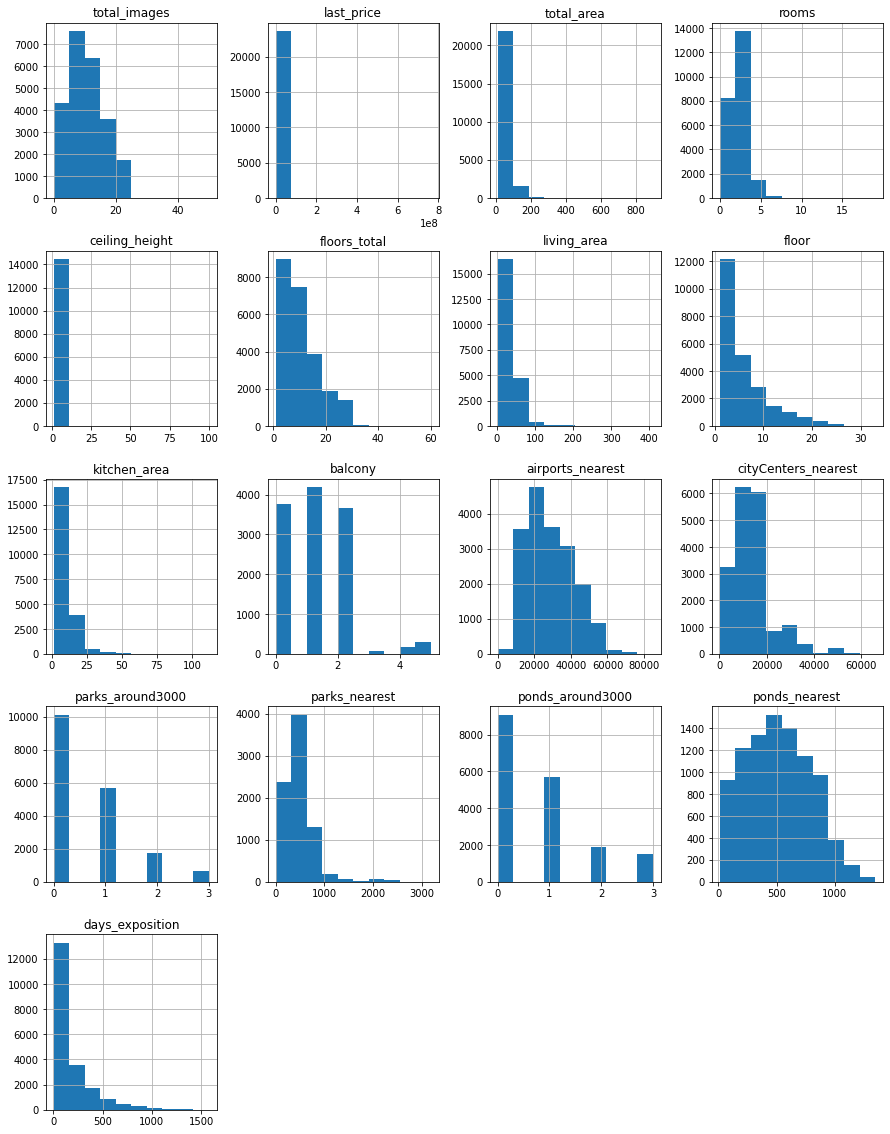

In [9]:
ax = data.hist(figsize=(15, 20))
plt.show()

Немного преобразуем их, чтобы были они более читабельными.

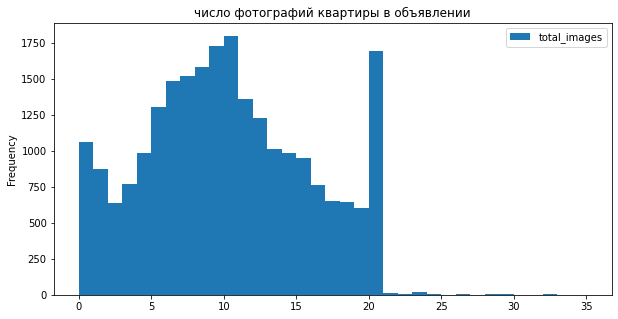

In [10]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='total_images',
    bins=35,
    range=(0,35),
    title='число фотографий квартиры в объявлении'
)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший и грамотный график получился. 
</div 

Гистограмма числа фотографий квартиры в объявлении не подчиняется пуассоновскому распределению. Можно заметить 3 пика:
- рядом с 0;
- около 11;
- около 21

Также интересно, что после пика в 21, все остальные данные крайне малы.

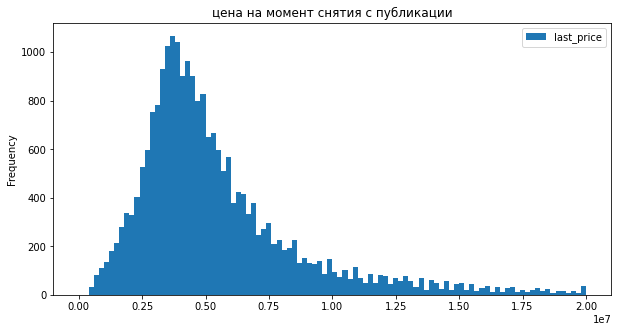

In [11]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='last_price',
    bins=100,
    range=(0,20_000_000),
    title='цена на момент снятия с публикации'
)
plt.show()

Гистограмма цены на момент снятия с публикации подходит под пуассоновское распределение с единственным пиком около 4 млн.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И тут поддержу вывод. 
</div 

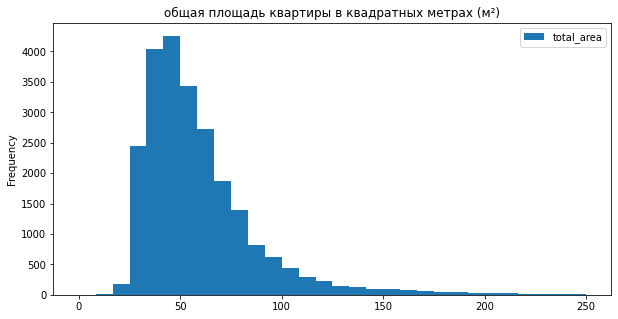

In [12]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='total_area',
    bins=30,
    range=(0,250),
    title='общая площадь квартиры в квадратных метрах (м²)'
)
plt.show()

Гистограмма общей площади квартиры напоминает пуассоновское распределение с пиком около 50.

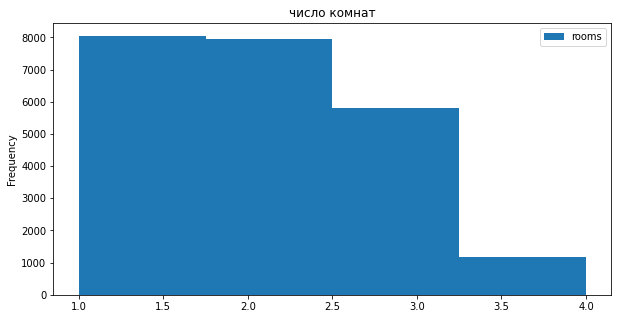

In [13]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='rooms',
    bins=4,
    range=(1,4),
    title='число комнат'
)
plt.show()

Как можно заметить по гистограмме числа комнат, то что количество доступных квартир снижается с увеличением числа комнат.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Ну да, здесь тоже нет ничего выбивающегося. 
</div 

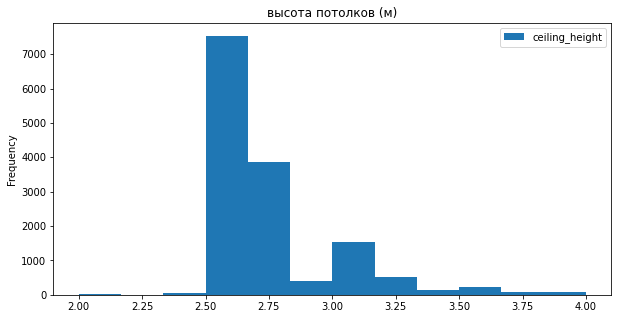

In [14]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='ceiling_height',
    bins=12,
    range=(2,4),
    title='высота потолков (м)'
)
plt.show()

Данная гистограмма высоты потолков соотносится с реальностью, поскольку минимальной нормой потолков является 2.4м.

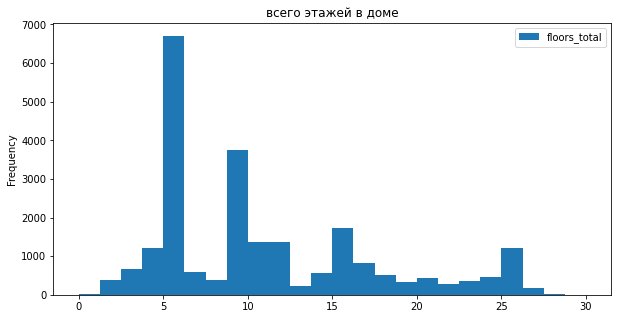

In [15]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='floors_total',
    bins=24,
    range=(0,30),
    title='всего этажей в доме'
)
plt.show()

Гистограмма этажей в доме не соответствует пуассоновскому распределению, хотя это скорее всего связано, что количество этажей не совсем рандомная величена, она частично обусловена историческими причинами. 

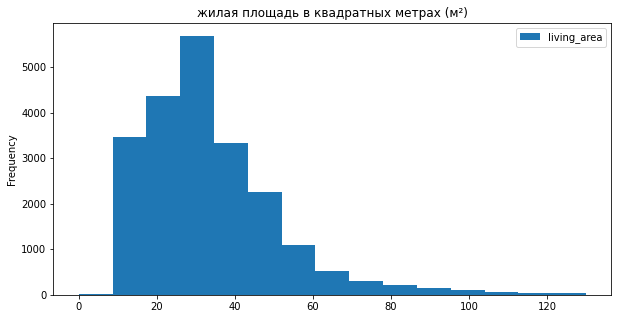

In [16]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='living_area',
    bins=15,
    range=(0,130),
    title='жилая площадь в квадратных метрах (м²)'
)
plt.show()

Гистограмма жилой площади соответствует пуассоновскому распределению.

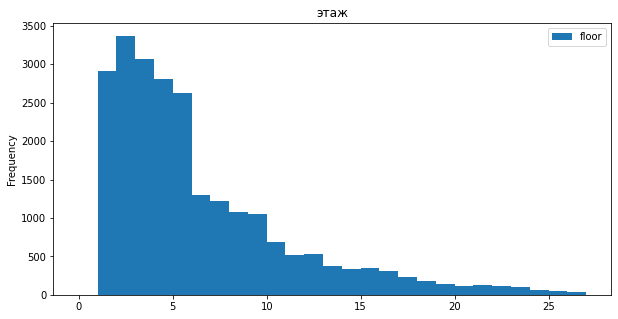

In [17]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='floor',
    bins=27,
    range=(0,27),
    title='этаж'
)
plt.show()

Гистограмма этажей соответствует пуассоновскому распределению.

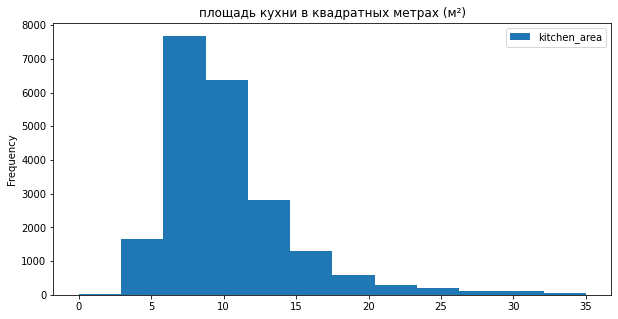

In [18]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='kitchen_area',
    bins=12,
    range=(0,35),
    title='площадь кухни в квадратных метрах (м²)'
)
plt.show()

Гистограмма площади кухни соответствует пуассоновскому распределению с пиком около 7

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, кухни у нас небольшие получаются. 
</div 

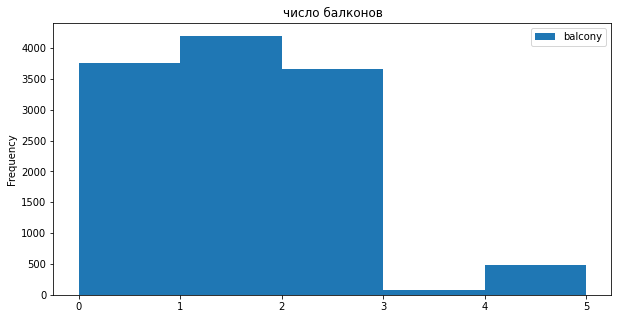

In [19]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='balcony',
    bins=5,
    range=(0,5),
    title='число балконов'
)
plt.show()

Можно заметить, что число балконов 1-3 приблизительно одинаково много, в то время как 4-5 крайне мало по сравнению с ними.

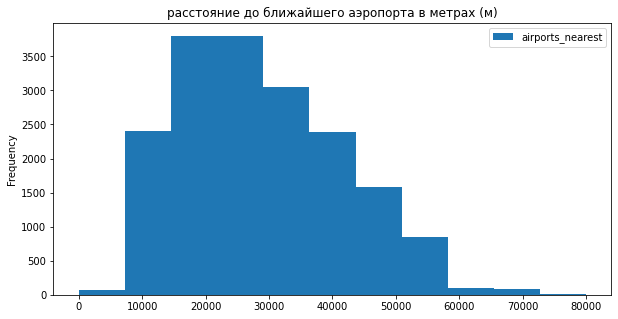

In [20]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='airports_nearest',
    bins=11,
    range=(0,80_000),
    title='расстояние до ближайшего аэропорта в метрах (м)'
)
plt.show()

Гистограмма расстояния до ближайшего аэропорта соответствует пуассоновскому распределению с единственным пиком на 20.000.

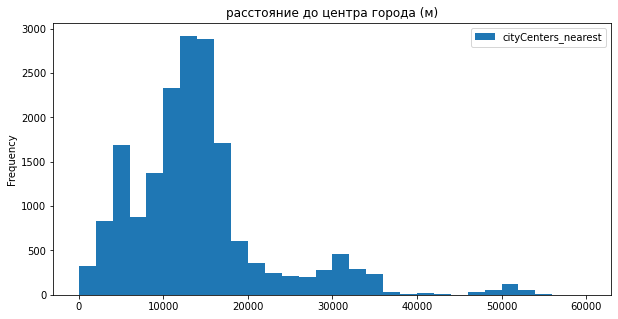

In [21]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='cityCenters_nearest',
    bins=30,
    range=(0,60_000),
    title='расстояние до центра города (м)'
)
plt.show()

 Можно заметить, что гистограмма расстояния до центра города имеет несколько пико около 5000, 15000, 31000 и 51000.

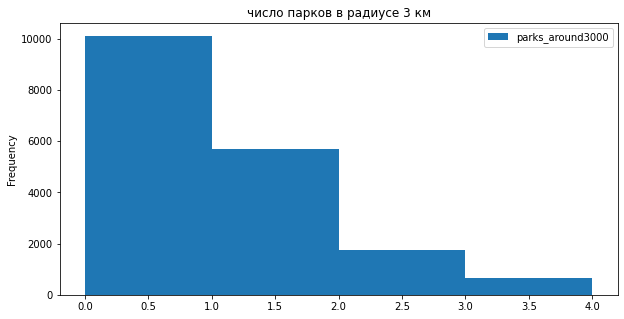

In [22]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='parks_around3000',
    bins=4,
    range=(0,4),
    title='число парков в радиусе 3 км'
)
plt.show()

Можно отметить тенденцию к тому, что квартиры с большим количеством парков рядом встречаются реже.

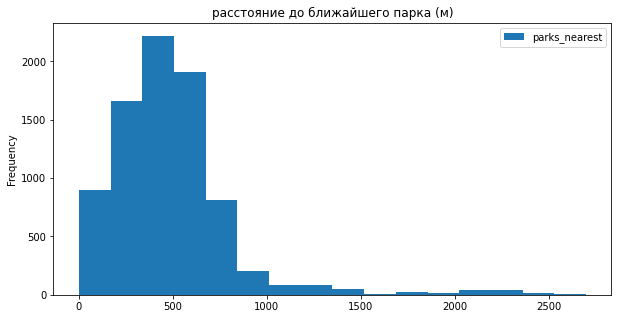

In [23]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='parks_nearest',
    bins=16,
    range=(0,2700),
    title='расстояние до ближайшего парка (м)'
)
plt.show()

Гистограмма расстояния до ближайшего парка соответствует пуассоновскому распределению с единственным пиком на 400м.

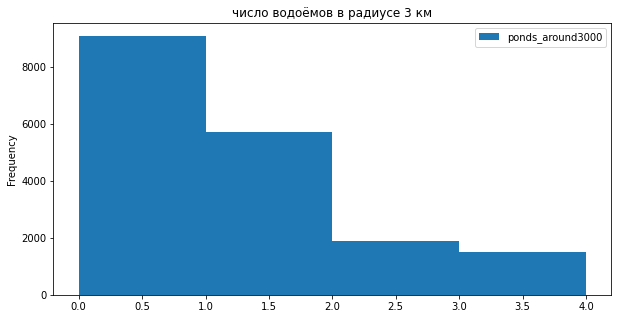

In [24]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='ponds_around3000',
    bins=4,
    range=(0,4),
    title='число водоёмов в радиусе 3 км'
)
plt.show()

Можно отметить тенденцию к тому, что квартиры с большим количеством водоёмов рядом встречаются реже.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Сложно с этим поспорить. 
</div 

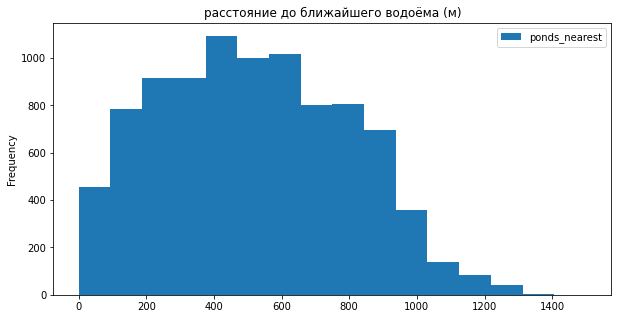

In [25]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='ponds_nearest',
    bins=16,
    range=(0,1500),
    title='расстояние до ближайшего водоёма (м)'
)
plt.show()

Гистограмма расстояния до ближайшего водоёма соответствует пуассоновскому распределению с единственным пиком на 400м.

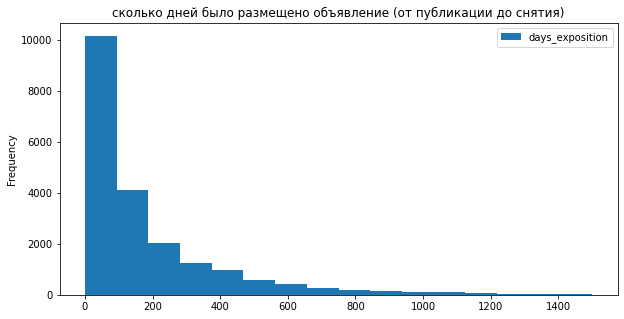

In [26]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='days_exposition',
    bins=16,
    range=(0,1500),
    title='сколько дней было размещено объявление (от публикации до снятия)'
)
plt.show()

Можно заметить, что большинство квартир скупают меньше чем в за год.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Хоть у тебя и есть это по ходу раздела, но я бы все же добавил небольшой резюмирующий вывод по итогу Знакомства с данными. 
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
    
После предварительного просмотра данных во многих рассмотренных параметров были выявлены некоторые закономерности, но при этом поскольку обработки этих данных ещё не было, в них полно выбросов и аномалий.
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Супер

## Предобработка данных

### Устранения неявные дубликаты в названиях населённых пунктов

В качестве основы для устранения неявных дубликатов возьмём последнее слово из каждой строчки столбца названия населенного пункта.

In [27]:
def check_duplicates(data,repeat_not_full_names=[]):
    names_array = data['locality_name'].drop_duplicates().str.split()
    unique_names = []
    counter = 0
    repeat_names = []
    for i in names_array:
        try:
            if i[-1] not in unique_names:
                unique_names.append(i[-1])
            else:
                repeat_names.append(i)
                repeat_not_full_names.append(i[-1])
                counter += 1
        except:
            pass
    print(repeat_names)
    print(counter)
check_duplicates(data)

[['поселок', 'Мурино'], ['Мурино'], ['Сосновый', 'Бор'], ['поселок', 'Новый', 'Свет'], ['Кудрово'], ['поселок', 'Бугры'], ['посёлок', 'городского', 'типа', 'Красный', 'Бор'], ['посёлок', 'городского', 'типа', 'Кузьмоловский'], ['городской', 'посёлок', 'Павлово'], ['поселок', 'городского', 'типа', 'Вырица'], ['городской', 'посёлок', 'Фёдоровское'], ['посёлок', 'городского', 'типа', 'Рощино'], ['деревня', 'Чудской', 'Бор'], ['посёлок', 'городского', 'типа', 'имени', 'Свердлова'], ['посёлок', 'Ропша'], ['деревня', 'Малые', 'Колпаны'], ['поселок', 'Тельмана'], ['посёлок', 'Ильичёво'], ['садовое', 'товарищество', 'Рахья'], ['поселок', 'Аннино'], ['поселок', 'Победа'], ['деревня', 'Старые', 'Бегуницы'], ['поселок', 'Гаврилово'], ['поселок', 'Поляны'], ['поселок', 'городского', 'типа', 'Рябово'], ['посёлок', 'городского', 'типа', 'Мга'], ['городской', 'поселок', 'Янино-1'], ['село', 'Никольское'], ['посёлок', 'Терволово'], ['поселок', 'городского', 'типа', 'Лебяжье'], ['село', 'Старая', 'Ладо

Как можно заметить в базе данных много неявных дупликатов, где-то "посёлок", а где-то "поселок"

In [28]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно простой и эффективный метод вышел. 
</div 

In [29]:
rp = []
check_duplicates(data,rp)
for i in rp:
    display(data.loc[(
        ~data['locality_name'].isna())&(data['locality_name'].str.contains(i)),['locality_name']].drop_duplicates()
           )

[['Мурино'], ['Сосновый', 'Бор'], ['Кудрово'], ['городской', 'посёлок', 'Павлово'], ['городской', 'посёлок', 'Фёдоровское'], ['деревня', 'Чудской', 'Бор'], ['посёлок', 'Ропша'], ['деревня', 'Малые', 'Колпаны'], ['садовое', 'товарищество', 'Рахья'], ['деревня', 'Старые', 'Бегуницы'], ['посёлок', 'городского', 'типа', 'Рябово'], ['посёлок', 'городского', 'типа', 'Мга'], ['село', 'Никольское'], ['село', 'Старая', 'Ладога'], ['посёлок', 'городского', 'типа', 'Павлово'], ['городской', 'посёлок', 'Рощино'], ['посёлок', 'городского', 'типа', 'Лесогорский'], ['деревня', 'Щеглово'], ['посёлок', 'при', 'железнодорожной', 'станции', 'Вещево'], ['посёлок', 'Форт', 'Красная', 'Горка'], ['посёлок', 'городского', 'типа', 'Назия'], ['посёлок', 'при', 'железнодорожной', 'станции', 'Приветнинское'], ['деревня', 'Бор'], ['городской', 'посёлок', 'Советский'], ['посёлок', 'Любань'], ['деревня', 'Зимитицы'], ['посёлок', 'Гарболово'], ['посёлок', 'городского', 'типа', 'Большая', 'Ижора'], ['посёлок', 'Громов

locality_name
8    посёлок Мурино
261          Мурино

locality_name
37     посёлок городского типа Красный Бор
306                           Сосновый Бор
2097                   деревня Чудской Бор
11800                          деревня Бор
19455                деревня Трубников Бор
19681        посёлок Пансионат Зелёный Бор
23411               деревня Борисова Грива

locality_name
22   деревня Кудрово
369          Кудрово

locality_name
476                      село Павлово
1145        городской посёлок Павлово
7436  посёлок городского типа Павлово

locality_name
68              деревня Фёдоровское
1490  городской посёлок Фёдоровское

locality_name
37     посёлок городского типа Красный Бор
306                           Сосновый Бор
2097                   деревня Чудской Бор
11800                          деревня Бор
19455                деревня Трубников Бор
19681        посёлок Пансионат Зелёный Бор
23411               деревня Борисова Грива

locality_name
101   садовое товарищество Новая Ропша
2262                     посёлок Ропша

locality_name
1394  деревня Большие Колпаны
2405    деревня Малые Колпаны

locality_name
1249  посёлок городского типа Рахья
2711     садовое товарищество Рахья

locality_name
1680         деревня Бегуницы
2851  деревня Старые Бегуницы

locality_name
1611                  посёлок Рябово
3930  посёлок городского типа Рябово

locality_name
1710        городской посёлок Мга
4089  посёлок городского типа Мга

locality_name
295        Никольское
4246  село Никольское

locality_name
1514        Новая Ладога
4672  село Старая Ладога

locality_name
476                      село Павлово
1145        городской посёлок Павлово
7436  посёлок городского типа Павлово

locality_name
393   посёлок городского типа Рощино
7606        городской посёлок Рощино

locality_name
1196        городской посёлок Лесогорский
7905  посёлок городского типа Лесогорский

locality_name
2294  посёлок Щеглово
8636  деревня Щеглово

locality_name
1982                      посёлок станции Вещево
9512  посёлок при железнодорожной станции Вещево

locality_name
6096   посёлок городского типа Дружная Горка
10183             посёлок Форт Красная Горка

locality_name
2421         городской посёлок Назия
10550  посёлок городского типа Назия

locality_name
3249                       посёлок станции Приветнинское
11596  посёлок при железнодорожной станции Приветнинское

locality_name
37     посёлок городского типа Красный Бор
306                           Сосновый Бор
2097                   деревня Чудской Бор
11800                          деревня Бор
19455                деревня Трубников Бор
19681        посёлок Пансионат Зелёный Бор
23411               деревня Борисова Грива

locality_name
718    посёлок городского типа Советский
12086        городской посёлок Советский

locality_name
3891           Любань
12925  посёлок Любань

locality_name
1578   посёлок Зимитицы
13542  деревня Зимитицы

locality_name
3177   деревня Гарболово
15211  посёлок Гарболово

locality_name
1009         городской посёлок Большая Ижора
17305  посёлок городского типа Большая Ижора
18639                     посёлок Усть-Ижора

locality_name
10385  посёлок станции Громово
18956          посёлок Громово

locality_name
37     посёлок городского типа Красный Бор
306                           Сосновый Бор
2097                   деревня Чудской Бор
11800                          деревня Бор
19455                деревня Трубников Бор
19681        посёлок Пансионат Зелёный Бор
23411               деревня Борисова Грива

locality_name
2001   деревня Калитино
19560  посёлок Калитино

locality_name
2288   посёлок городского типа Приладожский
19635     садовое товарищество Приладожский

locality_name
37     посёлок городского типа Красный Бор
306                           Сосновый Бор
2097                   деревня Чудской Бор
11800                          деревня Бор
19455                деревня Трубников Бор
19681        посёлок Пансионат Зелёный Бор
23411               деревня Борисова Грива

locality_name
2335   деревня Рабитицы
21835  посёлок Рабитицы

locality_name
370          посёлок Романовка
22176  деревня Малая Романовка

locality_name
13679             посёлок Лесное
23048  коттеджный посёлок Лесное

In [30]:
data['locality_name'].replace('посёлок Лесное', 'коттеджный посёлок Лесное',inplace=True )

Посёлок городского типа и городской посёлок это одно и тоже.

In [31]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','городской посёлок')

Посёлок станции и посёлок при железнодожной станции одно и тоже.

In [32]:
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции','посёлок станции')

Мурино ялвяется городом с 2019 года, поэтому записи о нем как о деревне надо изменить на город.

In [33]:
data['locality_name'].replace('посёлок Мурино', 'Мурино',inplace=True )

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь все проработано. Супер.
</div 

### Обработка пропусков

Для начала посмотрим ещё раз где эти пропуски есть.

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков ты можешь использовать такую библиотеку https://russianblogs.com/article/5001266235/
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
    
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Шикарно справился с библиотекой.

<AxesSubplot:>

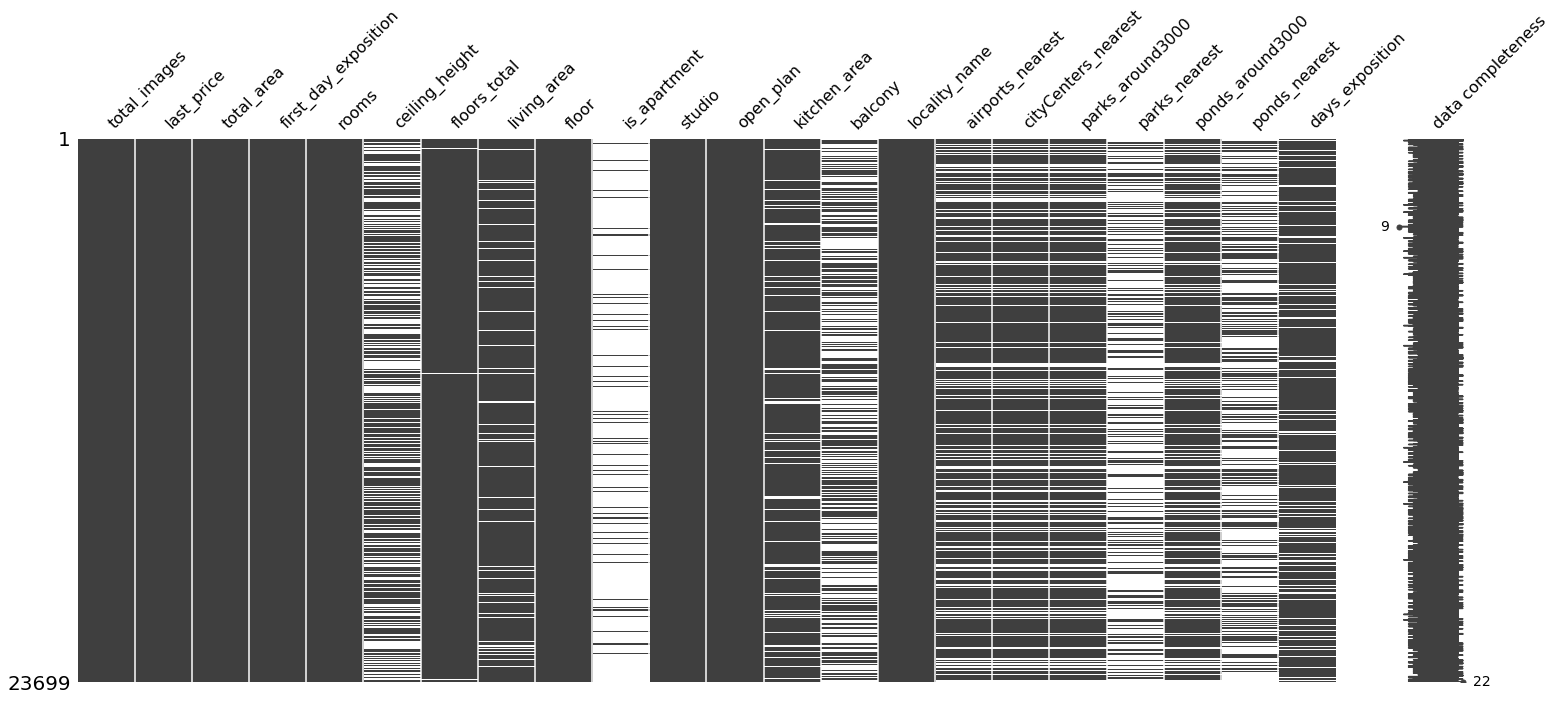

In [35]:
msno.matrix(data,labels=True)

Все пропуски кроме days_exposition скорее всего связано с человеческими причинами - например человек просто не знает сколько парков поблизости или же расстояние, забыл указать балкон или померить высоту потолка.

**Обработка пропусков в количестве этажей.**

In [36]:
display(data.sample(10))
data[data['floors_total'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
17450            10  10880100.0        70.5  2018-06-09T00:00:00      2   
16811            15   3550000.0        46.4  2018-07-20T00:00:00      2   
7794              4   2350000.0        36.0  2017-07-22T00:00:00      1   
22148             1   4658410.0        57.7  2017-09-27T00:00:00      2   
14394            13   1700000.0        30.2  2019-04-08T00:00:00      1   
22692            20   3900000.0        44.0  2017-07-28T00:00:00      2   
18897            10   5100000.0        54.0  2017-11-20T00:00:00      2   
3717              5   9000000.0        90.0  2019-04-02T00:00:00      3   
19320            11   4050000.0        57.4  2018-07-06T00:00:00      3   
20857             7   5150000.0        51.0  2018-05-17T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
17450             2.8           9.0          NaN      7          NaN  ...   
16811             NaN           5.0         30.1      4          NaN  ...   
7794              NaN          16.0         16.0      3          NaN  ...   
22148             NaN           4.0         32.7      1          NaN  ...   
14394             NaN           9.0         17.4      6        False  ...   
22692             NaN           5.0         27.9      4          NaN  ...   
18897             2.6          18.0         33.0     15          NaN  ...   
3717              3.3           7.0         47.0      4          NaN  ...   
19320             2.5           9.0         39.2      9          NaN  ...   
20857             2.6           9.0         30.0      1          NaN  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
17450          14.2      2.0    Санкт-Петербург           27643.0   
16811           5.5      NaN    Санкт-Петербург           40466.0   
7794            8.0      1.0     посёлок Шушары           13097.0   
22148           9.8      NaN  деревня Мистолово               NaN   
14394           6.0      NaN          Кингисепп               NaN   
22692           5.7      1.0    Санкт-Петербург           17160.0   
18897          14.0      1.0    Санкт-Петербург           43122.0   
3717           17.0      NaN    Санкт-Петербург           24970.0   
19320           6.1      NaN            Колпино           26186.0   
20857          10.0      NaN    Санкт-Петербург           29692.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
17450              6346.0               2.0          458.0               3.0   
16811             12970.0               0.0            NaN               0.0   
7794              18883.0               0.0            NaN               1.0   
22148                 NaN               NaN            NaN               NaN   
14394                 NaN               NaN            NaN               NaN   
22692             17145.0               0.0            NaN               0.0   
18897             22438.0               0.0            NaN               1.0   
3717               5538.0               0.0            NaN               0.0   
19320             31973.0               0.0            NaN               0.0   
20857             13717.0               0.0            NaN               1.0   

       ponds_nearest  days_exposition  
17450          365.0            179.0  
16811            NaN             16.0  
7794           649.0             49.0  
22148            NaN            477.0  
14394            NaN              8.0  
22692            NaN            116.0  
18897          881.0             82.0  
3717             NaN              NaN  
19320            NaN            142.0  
20857          651.0             87.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
20146            16   3850000.0       36.00  2018-10-12T00:00:00      1   
7922              3   5426412.0       50.11  2016-06-08T00:00:00      2   
19452             5   9500000.0       76.80  2019-04-11T00:00:00      3   
20250             5   6060000.0       60.60  2015-10-29T00:00:00      2   
10351             4   5380992.0      110.72  2015-10-09T00:00:00      4   
22656             4   4574160.0       64.50  2017-04-02T00:00:00      2   
21273             3   6300000.0       70.02  2015-03-28T00:00:00      2   
18832             0  40348248.0      284.00  2016-11-24T00:00:00      4   
9023              5   2900000.0       35.10  2018-07-18T00:00:00      1   
1930              1   9750000.0       66.77  2016-05-13T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
20146             NaN           NaN        19.00     15          NaN  ...   
7922              NaN           NaN        26.94     24          NaN  ...   
19452             NaN           NaN          NaN     10          NaN  ...   
20250             2.8           NaN          NaN      2          NaN  ...   
10351             NaN           NaN        80.39      4          NaN  ...   
22656             NaN           NaN        31.70     20          NaN  ...   
21273             NaN           NaN        34.87     19          NaN  ...   
18832             NaN           NaN       104.76      6          NaN  ...   
9023              NaN           NaN          NaN     11          NaN  ...   
1930              NaN           NaN          NaN      4          NaN  ...   

       kitchen_area  balcony                locality_name  airports_nearest  \
20146          8.50      NaN             посёлок Стрельна           28276.0   
7922          11.13      0.0              Санкт-Петербург            7050.0   
19452           NaN      NaN              Санкт-Петербург           36628.0   
20250           NaN      NaN              Санкт-Петербург           35231.0   
10351           NaN      0.0    городской посёлок Токсово               NaN   
22656         14.40      0.0              Санкт-Петербург           22041.0   
21273         10.13      0.0              Санкт-Петербург           35234.0   
18832         14.77      0.0              Санкт-Петербург           19095.0   
9023            NaN      NaN  городской посёлок Новоселье               NaN   
1930            NaN      0.0              Санкт-Петербург           39886.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
20146             23454.0               0.0            NaN               0.0   
7922              13266.0               1.0          868.0               0.0   
19452             14780.0               0.0            NaN               0.0   
20250             13301.0               0.0            NaN               1.0   
10351                 NaN               NaN            NaN               NaN   
22656             17369.0               0.0            NaN               1.0   
21273             14674.0               0.0            NaN               1.0   
18832              4529.0               0.0            NaN               0.0   
9023                  NaN               NaN            NaN               NaN   
1930              10660.0               1.0         2276.0               3.0   

       ponds_nearest  days_exposition  
20146            NaN            183.0  
7922             NaN             14.0  
19452            NaN              NaN  
20250          830.0           1257.0  
10351            NaN            251.0  
22656          374.0            127.0  
21273          844.0            516.0  
18832            NaN            256.0  
9023             NaN             26.0  
1930           244.0             90.0  

[10 rows x 22 columns]

Из гистограммы этажей в доме можно заметить, что дома с кратным пяти количеством этажей встречаются чаще всего. Так что для заполнения пропущенных значений возьмём этаж сдаваемой квартиру округленную в большую сторону с точностью до пяти.

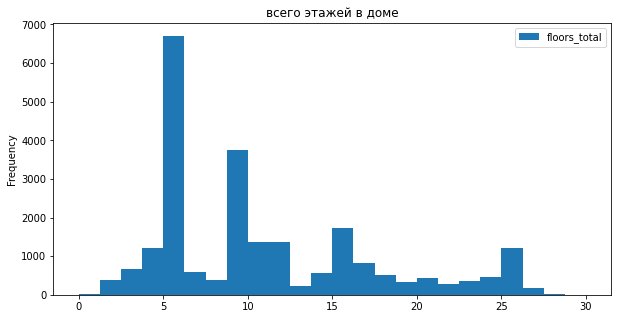

In [37]:
ax = data.plot(
    figsize=(10, 5),
    kind='hist',
    y='floors_total',
    bins=24,
    range=(0,30),
    title='всего этажей в доме'
)
plt.show()

In [38]:
data.loc[data['floors_total'].isna(),'floors_total'] = data[data['floors_total'].isna()]['floor'].apply(
    lambda x: x if x %  5 == 0 else 5*(x//5 + 1)
)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, можно так и сделать.
</div 

In [39]:
display(data['floors_total'].isna().sum())
data.loc[11389]

0

total_images                              3
last_price                        4700000.0
total_area                             55.2
first_day_exposition    2016-06-23T00:00:00
rooms                                     1
ceiling_height                          NaN
floors_total                           10.0
living_area                           18.39
floor                                     7
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                          15.37
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    35234.0
cityCenters_nearest                 14674.0
parks_around3000                        0.0
parks_nearest                           NaN
ponds_around3000                        1.0
ponds_nearest                         844.0
days_exposition                        15.0
Name: 11389, dtype: object

От пропусков в количестве этажей успешно избавились.

**Обработка пропусков в высоте потолка.**

In [40]:
display(data.sample(10))
data[data['ceiling_height'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
8203              7   4050000.0       39.00  2018-11-01T00:00:00      1   
288               5   3810000.0       41.68  2018-07-10T00:00:00      1   
18173             9   6300000.0       66.00  2017-06-08T00:00:00      3   
948               1   5900000.0       68.00  2017-06-15T00:00:00      3   
17880            15   3930000.0       44.00  2018-02-01T00:00:00      1   
19299            14   4600000.0       60.00  2018-06-14T00:00:00      1   
10706            20   7100000.0       93.40  2016-02-06T00:00:00      4   
18365             4   5300000.0       48.03  2015-11-06T00:00:00      1   
10057             9   3000000.0       34.60  2016-02-15T00:00:00      1   
18952             0   6150000.0       72.20  2017-11-14T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8203             2.65          12.0        20.00      5          NaN  ...   
288              2.70          19.0        19.00      4          NaN  ...   
18173             NaN          16.0        43.00     15          NaN  ...   
948               NaN           9.0        43.50      5          NaN  ...   
17880            2.77          15.0        21.00     14          NaN  ...   
19299            2.60           9.0          NaN      1          NaN  ...   
10706            2.50           9.0        63.90      1          NaN  ...   
18365             NaN          10.0        20.03      1          NaN  ...   
10057             NaN           6.0        15.90      3        False  ...   
18952             NaN           9.0        49.70      5          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
8203           8.30      NaN  Санкт-Петербург           33549.0   
288           10.44      NaN  Санкт-Петербург           37792.0   
18173         10.00      0.0  Санкт-Петербург           34865.0   
948            8.40      0.0       Сестрорецк           56579.0   
17880         10.00      NaN  Санкт-Петербург           18936.0   
19299           NaN      NaN   посёлок Шушары           19739.0   
10706          8.60      NaN  Санкт-Петербург           45909.0   
18365           NaN      NaN  Санкт-Петербург           39946.0   
10057          8.10      1.0   посёлок Шушары           17349.0   
18952          9.00      NaN  Санкт-Петербург           27232.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8203              14648.0               0.0            NaN               2.0   
288               14635.0               0.0            NaN               0.0   
18173             12479.0               0.0            NaN               0.0   
948               33508.0               0.0            NaN               1.0   
17880             13744.0               1.0          561.0               0.0   
19299             30142.0               0.0            NaN               0.0   
10706             18633.0               0.0            NaN               0.0   
18365             10720.0               1.0         2102.0               3.0   
10057             31459.0               0.0            NaN               0.0   
18952             12353.0               1.0          547.0               0.0   

       ponds_nearest  days_exposition  
8203           338.0             41.0  
288              NaN             67.0  
18173            NaN            114.0  
948            190.0             35.0  
17880            NaN            179.0  
19299            NaN            248.0  
10706            NaN           1147.0  
18365          303.0           1103.0  
10057            NaN            171.0  
18952            NaN             60.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
14302            12   2250000.0        30.0  2017-06-22T00:00:00      1   
7999              4   3000000.0        33.0  2018-02-09T00:00:00      1   
5630             11   3300000.0        35.0  2017-11-14T00:00:00      1   
9920              4   4100000.0        58.0  2015-01-16T00:00:00      2   
11334            12   5750000.0        70.0  2017-11-18T00:00:00      3   
4738              4   3796000.0        38.6  2018-01-16T00:00:00      1   
19793             9   3600000.0        39.9  2017-10-24T00:00:00      1   
7606             19   6500000.0        75.0  2019-04-26T00:00:00      3   
8687              5   1750000.0        45.0  2018-01-21T00:00:00      2   
17517             1   3806504.0        52.0  2017-07-01T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
14302             NaN           5.0         16.0      4          NaN  ...   
7999              NaN          22.0         16.0      3          NaN  ...   
5630              NaN           5.0         15.6      3          NaN  ...   
9920              NaN          25.0         31.0      2          NaN  ...   
11334             NaN          25.0         42.0     23          NaN  ...   
4738              NaN          16.0          NaN      4          NaN  ...   
19793             NaN          12.0         11.5      6          NaN  ...   
7606              NaN           2.0          NaN      2          NaN  ...   
8687              NaN           9.0         28.0      2          NaN  ...   
17517             NaN          18.0         29.0      1          NaN  ...   

       kitchen_area  balcony             locality_name  airports_nearest  \
14302           5.5      0.0           Санкт-Петербург           24392.0   
7999            8.0      NaN           Санкт-Петербург           16017.0   
5630            9.3      NaN                  Петергоф           37250.0   
9920           10.3      2.0           деревня Кудрово               NaN   
11334          10.2      2.0                    Мурино               NaN   
4738            NaN      NaN           Санкт-Петербург           37091.0   
19793          18.2      1.0           деревня Кудрово               NaN   
7606            NaN      1.0  городской посёлок Рощино               NaN   
8687            7.0      1.0                    Тихвин               NaN   
17517           8.0      0.0   деревня Новое Девяткино               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
14302             21953.0               0.0            NaN               0.0   
7999              13862.0               0.0            NaN               2.0   
5630              40675.0               1.0         1942.0               0.0   
9920                  NaN               NaN            NaN               NaN   
11334                 NaN               NaN            NaN               NaN   
4738              11184.0               1.0          826.0               0.0   
19793                 NaN               NaN            NaN               NaN   
7606                  NaN               NaN            NaN               NaN   
8687                  NaN               NaN            NaN               NaN   
17517                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
14302            NaN             13.0  
7999           538.0            212.0  
5630             NaN            273.0  
9920             NaN            918.0  
11334            NaN            118.0  
4738             NaN             21.0  
19793            NaN             45.0  
7606             NaN              NaN  
8687             NaN             80.0  
17517            NaN             45.0  

[10 rows x 22 columns]

На первый взгляд никакой закономерности между отсутствиями записи о высоте потолка не было найдено, так что скорее всего придется заполнить медианым значением из записей, которые имеют высоту. Но для начала хотелось бы проверить, есть ли зависимость между количеством этажей всего в здании и высотой комнатой из имеющихся данных.

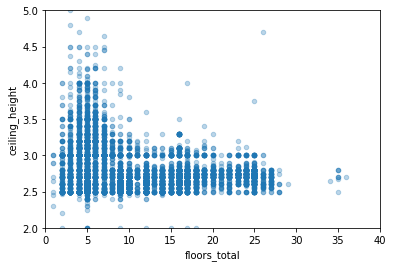

In [41]:
ax = data.plot(kind='scatter', x='floors_total', y='ceiling_height', alpha=0.3, ylim=(2,5), xlim=(0,40))
plt.show()

Можно заметить, что более низкии дома (этажей меньше 10) имеют более хаотичный разброс, так что при заполнении пропусков хотелось бы их разделить. 

In [42]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data.groupby('floors_total')['ceiling_height'].transform('median')
display(data.sample(10))
data.loc[data['floors_total']==33,'ceiling_height'] = data.loc[data['floors_total']==35,'ceiling_height'].median()
# Так уж получилось, что у нас единственная запись о 33 этажных домах, поэтому пришлось взять из других
data['ceiling_height'].isna().sum()

total_images  last_price  total_area first_day_exposition  rooms  \
9849             14   3300000.0        43.4  2015-03-17T00:00:00      2   
4374             17   4800000.0        53.0  2018-03-05T00:00:00      2   
12064            16   4600000.0        58.3  2018-03-20T00:00:00      2   
1055              1  11472552.0        88.4  2016-05-12T00:00:00      3   
12823            15   5500000.0        65.7  2019-03-27T00:00:00      3   
13315            11   6500000.0        70.5  2018-12-27T00:00:00      3   
15614             3  19400000.0       117.7  2014-12-09T00:00:00      3   
17186             6   4300000.0        42.0  2017-10-17T00:00:00      1   
6051              8   4500000.0        60.0  2017-06-22T00:00:00      3   
265               7   3150000.0        37.3  2016-08-16T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
9849             2.50           4.0         31.2      1          NaN  ...   
4374             3.00           6.0          NaN      2          NaN  ...   
12064            2.70           7.0         35.5      6          NaN  ...   
1055             3.10          16.0         52.5      3          NaN  ...   
12823            2.50           9.0         48.3      4          NaN  ...   
13315            3.54           4.0         42.0      3          NaN  ...   
15614            3.00           8.0         62.6      5        False  ...   
17186            2.70          16.0         20.0     14        False  ...   
6051             2.55           9.0         44.0      6          NaN  ...   
265              2.80          17.0         15.2     14          NaN  ...   

       kitchen_area  balcony            locality_name  airports_nearest  \
9849           5.60      0.0                 Петергоф           36622.0   
4374            NaN      NaN                 Петергоф           35636.0   
12064         10.30      3.0               Всеволожск               NaN   
1055          11.78      0.0          Санкт-Петербург           37407.0   
12823          6.30      NaN          Санкт-Петербург           48272.0   
13315         12.00      NaN          Санкт-Петербург           22321.0   
15614         21.30      NaN          Санкт-Петербург           39393.0   
17186         10.00      NaN          Санкт-Петербург           16798.0   
6051           6.00      2.0          Санкт-Петербург           20718.0   
265           10.30      0.0  деревня Новое Девяткино               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
9849              31811.0               2.0          697.0               3.0   
4374              30825.0               3.0           13.0               3.0   
12064                 NaN               NaN            NaN               NaN   
1055               8434.0               1.0          456.0               2.0   
12823             17214.0               0.0            NaN               0.0   
13315              6594.0               1.0          367.0               1.0   
15614             11096.0               1.0          537.0               0.0   
17186             14760.0               1.0          843.0               0.0   
6051              14813.0               2.0          474.0               1.0   
265                   NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
9849           641.0            547.0  
4374            35.0             60.0  
12064            NaN            329.0  
1055           454.0             54.0  
12823            NaN              NaN  
13315          755.0              9.0  
15614            NaN              NaN  
17186            NaN             60.0  
6051           268.0             70.0  
265              NaN            359.0  

[10 rows x 22 columns]

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Взять здесь медиану является хорошим решением. 
</div 

От пропусков в высоте потолка успешно избавились.

**Заполнение пропусков в жилой площади**

In [43]:
display(data.sample(10))
data[data['living_area'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
1964             18   3100000.0        44.2  2018-01-18T00:00:00      2   
22395             6   3800000.0        47.0  2017-06-08T00:00:00      2   
11544             5   2350000.0        45.7  2018-02-21T00:00:00      2   
2117              0   6500000.0        73.9  2018-08-21T00:00:00      4   
7524              0   4899000.0        39.0  2017-07-18T00:00:00      1   
5821              7    820000.0        51.0  2017-12-09T00:00:00      2   
5416             14   4200000.0        47.3  2018-08-31T00:00:00      2   
19755            11   2080000.0        50.7  2017-07-20T00:00:00      2   
12518             6   1890000.0        40.0  2018-02-01T00:00:00      2   
9081             13   7375000.0        77.8  2017-09-18T00:00:00      4   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1964             2.60           9.0         27.0      7          NaN  ...   
22395            2.70           2.0         30.0      2          NaN  ...   
11544            2.70           9.0         27.9      4          NaN  ...   
2117             2.60          14.0         46.5     11          NaN  ...   
7524             2.55           9.0         17.0      3          NaN  ...   
5821             2.55           5.0         32.0      5          NaN  ...   
5416             2.50           9.0         30.0      6          NaN  ...   
19755            2.56          14.0         30.6      8          NaN  ...   
12518            3.00           4.0          NaN      2          NaN  ...   
9081             3.38           4.0         51.0      2          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
1964            6.3      2.0     Красное Село           24675.0   
22395           5.0      0.0  Санкт-Петербург           22884.0   
11544           6.9      1.0           Выборг               NaN   
2117            8.3      2.0  Санкт-Петербург           13758.0   
7524           10.0      0.0  Санкт-Петербург           11057.0   
5821            8.5      NaN     Бокситогорск               NaN   
5416            6.4      NaN  Санкт-Петербург           12477.0   
19755           7.5      2.0  Санкт-Петербург           21190.0   
12518           NaN      NaN             Луга               NaN   
9081           11.9      0.0  Санкт-Петербург           24354.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1964              28100.0               0.0            NaN               0.0   
22395              6830.0               1.0          502.0               1.0   
11544                 NaN               NaN            NaN               NaN   
2117              11885.0               0.0            NaN               0.0   
7524              10347.0               0.0            NaN               0.0   
5821                  NaN               NaN            NaN               NaN   
5416              11699.0               1.0          414.0               1.0   
19755             22902.0               0.0            NaN               1.0   
12518                 NaN               NaN            NaN               NaN   
9081               2469.0               1.0          687.0               3.0   

       ponds_nearest  days_exposition  
1964             NaN             46.0  
22395          797.0             59.0  
11544            NaN            153.0  
2117             NaN             60.0  
7524             NaN             67.0  
5821             NaN            130.0  
5416           645.0             13.0  
19755          450.0             14.0  
12518            NaN             43.0  
9081           777.0             55.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
15483            10   5100000.0       55.00  2018-02-24T00:00:00      3   
13486            13   2550000.0       37.00  2018-02-25T00:00:00      1   
12128             7   3270000.0       41.65  2018-04-03T00:00:00      1   
6027              4   2150000.0       51.00  2018-03-21T00:00:00      2   
23036             0   2500000.0       44.00  2017-12-07T00:00:00      2   
19866            11   3600000.0       56.00  2018-03-24T00:00:00      1   
18523             9   1350000.0       38.00  2018-07-08T00:00:00      1   
17885            11   2100000.0       48.00  2018-03-28T00:00:00      2   
5559             17   4450000.0       52.00  2018-10-02T00:00:00      2   
20889             5  10500000.0       91.00  2016-11-03T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
15483            2.50           5.0          NaN      4          NaN  ...   
13486            2.50           5.0          NaN      2          NaN  ...   
12128            2.70          17.0          NaN      1          NaN  ...   
6027             2.60           8.0          NaN      2          NaN  ...   
23036            2.55           5.0          NaN      2          NaN  ...   
19866            2.55           9.0          NaN      2          NaN  ...   
18523            2.50           4.0          NaN      2          NaN  ...   
17885            2.50           9.0          NaN      8        False  ...   
5559             2.55           5.0          NaN      1          NaN  ...   
20889            2.80          17.0          NaN      8          NaN  ...   

       kitchen_area  balcony        locality_name  airports_nearest  \
15483           NaN      NaN       посёлок Репино           64127.0   
13486           NaN      NaN             Отрадное               NaN   
12128         10.32      NaN               Мурино               NaN   
6027            NaN      NaN    посёлок Романовка               NaN   
23036           NaN      NaN              Гатчина               NaN   
19866           NaN      NaN           Всеволожск               NaN   
18523           NaN      1.0  посёлок Запорожское               NaN   
17885           NaN      1.0               Выборг               NaN   
5559            NaN      NaN       посёлок Шушары           18459.0   
20889           NaN      NaN      Санкт-Петербург           35231.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
15483             45226.0               0.0            NaN               0.0   
13486                 NaN               NaN            NaN               NaN   
12128                 NaN               NaN            NaN               NaN   
6027                  NaN               NaN            NaN               NaN   
23036                 NaN               NaN            NaN               NaN   
19866                 NaN               NaN            NaN               NaN   
18523                 NaN               NaN            NaN               NaN   
17885                 NaN               NaN            NaN               NaN   
5559              31150.0               0.0            NaN               0.0   
20889             13301.0               0.0            NaN               1.0   

       ponds_nearest  days_exposition  
15483            NaN             60.0  
13486            NaN             45.0  
12128            NaN            116.0  
6027             NaN             45.0  
23036            NaN             45.0  
19866            NaN             45.0  
18523            NaN              NaN  
17885            NaN            105.0  
5559             NaN             58.0  
20889          830.0            481.0  

[10 rows x 22 columns]

Для заполнения пропусков в жилой площади хотелось бы проверить гипотезу, что чем больше комнат, тем больше площадь.

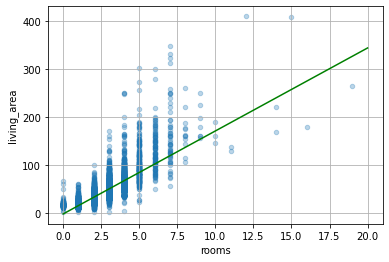

rooms  living_area
rooms        1.000000     0.845977
living_area  0.845977     1.000000

In [44]:
ax = data.plot(kind='scatter', x='rooms', y='living_area', grid=True, alpha=0.3)
a, b = np.polyfit(
    x = data.loc[~(data['living_area'].isna()),'rooms'], 
    y = data.loc[~(data['living_area'].isna()),'living_area'], 
    deg = 1
)
x = np.linspace(0,20,100)
plt.plot(x, a*x+b, '-g')  
plt.show()
data[['rooms','living_area']].corr()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И снова шикарный точечный метод проработки демонстрируешь. 
</div 

Коэффициент корреляции = 0.846. Что достаточно большой. Соответственно гипотеза потвердилась. Также мы нашли коэффициеты для этого графика, так что пожно будет просто посчитать по y=a*x + b. Для значение, где количество комнат 0 возьмём медиану.

In [45]:
#data.loc[(data['kitchen_area'].isna())&(a * data['rooms'] + b > data['total_area']),'living_area'] = 0.9*(data['total_area'] - data['kitchen_area'].min())
#data.loc[(~data['kitchen_area'].isna())&(a * data['rooms'] + b > data['total_area'] - data['kitchen_area']),'living_area'] = 0.9*(data['total_area'] - data['kitchen_area'])
data.loc[(data['living_area'].isna())&(data['rooms'] != 0),'living_area'] = (a * data['rooms'] + b)
#data.loc[data.loc[data['rooms']==0,'living_area'].median() + data['kitchen_area'] >= data['total_area'],  'living_area'].fillna(data.loc[data['rooms']==0,'living_area'].min(),inplace=True)
data.loc[(data['living_area'].isna())&(data['rooms'] == 0),'living_area'] = data.loc[data['rooms']==0,'living_area'].median()
data['living_area'].isna().sum()

0

**Заполнение пропусков в столбце является ли квартира апартаментами или нет.**

In [46]:
display(data[data['is_apartment']==True].sample(10))
data[data['is_apartment'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
2975              9   4931398.0        42.9  2018-07-23T00:00:00      1   
19691            16   7000000.0        52.8  2018-11-15T00:00:00      2   
6353              0  11620701.0       122.3  2018-10-01T00:00:00      2   
7521             16  43500000.0       245.8  2015-12-17T00:00:00      3   
8252             15  12750000.0       102.0  2018-10-17T00:00:00      3   
5809             10   7900000.0        74.0  2019-02-12T00:00:00      3   
4339             19   6900000.0        72.0  2019-03-25T00:00:00      3   
21244            10   5500000.0        58.0  2018-12-13T00:00:00      3   
3067             13   6600000.0        95.0  2018-09-08T00:00:00      2   
1608             12   2150000.0        20.1  2019-01-30T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
2975             3.15           4.0    20.390000      3         True  ...   
19691            2.70          16.0    28.900002     13         True  ...   
6353             2.80           3.0    33.216786      3         True  ...   
7521             4.45           7.0   170.800000      7         True  ...   
8252             2.80           7.0    61.000000      4         True  ...   
5809             3.55           6.0    56.000000      3         True  ...   
4339             3.50           4.0    70.000000      1         True  ...   
21244            2.60           9.0    41.000000      2         True  ...   
3067             4.50           7.0    45.000000      7         True  ...   
1608             2.55           9.0    15.965325      1         True  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
2975          10.29      NaN  Санкт-Петербург           44870.0   
19691          9.50      1.0  Санкт-Петербург            8426.0   
6353            NaN      NaN  Санкт-Петербург           44870.0   
7521          25.00      1.0  Санкт-Петербург               NaN   
8252          12.00      5.0          Колпино           26100.0   
5809            NaN      NaN  Санкт-Петербург           31006.0   
4339            NaN      NaN  Санкт-Петербург           31487.0   
21244          7.00      5.0  Санкт-Петербург           28632.0   
3067          25.00      2.0           Выборг               NaN   
1608            NaN      NaN  Санкт-Петербург           26646.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2975              20802.0               0.0            NaN               1.0   
19691             12082.0               2.0           24.0               1.0   
6353              20802.0               0.0            NaN               1.0   
7521               5735.0               2.0          110.0               0.0   
8252              31886.0               2.0          332.0               2.0   
5809               3075.0               2.0          123.0               3.0   
4339               4466.0               2.0          353.0               1.0   
21244             13261.0               0.0            NaN               1.0   
3067                  NaN               NaN            NaN               NaN   
1608              12147.0               0.0            NaN               0.0   

       ponds_nearest  days_exposition  
2975           792.0            273.0  
19691          271.0            165.0  
6353           792.0              NaN  
7521             NaN           1067.0  
8252           472.0            172.0  
5809           274.0              6.0  
4339           439.0             22.0  
21244          544.0             12.0  
3067             NaN             96.0  
1608             NaN             13.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
21701            20   4150000.0       45.70  2017-12-06T00:00:00      1   
675              15   5799000.0       64.00  2018-11-16T00:00:00      3   
15279             0   4700000.0       58.16  2018-02-01T00:00:00      3   
15958             7   4250000.0       47.70  2017-11-14T00:00:00      2   
23358             7   5500000.0       57.00  2016-05-07T00:00:00      3   
16669             8   3750000.0       45.80  2015-12-01T00:00:00      2   
22864             5   3250000.0       35.00  2018-10-14T00:00:00      1   
8680              0   6000000.0       43.00  2017-12-10T00:00:00      1   
10848             9   5650000.0       64.00  2017-11-17T00:00:00      3   
10426            16   4600000.0       50.80  2018-02-28T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
21701            2.66          26.0         18.0     15          NaN  ...   
675              2.55           9.0         40.0      7          NaN  ...   
15279            2.60           9.0         39.0      7          NaN  ...   
15958            2.55           9.0         28.4      7          NaN  ...   
23358            2.50           5.0         36.6      5          NaN  ...   
16669            2.55           5.0         30.5      3          NaN  ...   
22864            2.60          14.0         17.8     13          NaN  ...   
8680             2.75          24.0         30.0      9          NaN  ...   
10848            2.50          15.0         42.8     13          NaN  ...   
10426            2.65          16.0         31.7     10          NaN  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
21701          13.1      1.0  посёлок Парголово           53963.0   
675             9.6      NaN    Санкт-Петербург           12323.0   
15279           7.0      NaN    Санкт-Петербург           29009.0   
15958           7.0      NaN    Санкт-Петербург           33044.0   
23358           5.0      0.0             Пушкин           17236.0   
16669           6.4      0.0    Санкт-Петербург           27083.0   
22864          10.2      NaN             Мурино               NaN   
8680           13.0      2.0    Санкт-Петербург           37294.0   
10848          10.2      1.0    Санкт-Петербург           14846.0   
10426           7.0      1.0    Санкт-Петербург           16403.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
21701             18129.0               0.0            NaN               0.0   
675               14914.0               0.0            NaN               0.0   
15279             13624.0               0.0            NaN               0.0   
15958             14208.0               0.0            NaN               0.0   
23358             29389.0               1.0          245.0               1.0   
16669              8062.0               0.0            NaN               0.0   
22864                 NaN               NaN            NaN               NaN   
8680              12191.0               0.0            NaN               2.0   
10848             10652.0               0.0            NaN               1.0   
10426             11646.0               0.0            NaN               1.0   

       ponds_nearest  days_exposition  
21701            NaN            167.0  
675              NaN              4.0  
15279            NaN            135.0  
15958            NaN             85.0  
23358          928.0            397.0  
16669            NaN            346.0  
22864            NaN             54.0  
8680           583.0             59.0  
10848         1018.0             83.0  
10426         1219.0              3.0  

[10 rows x 22 columns]

У меня нет никаких гипотез, как это можно было бы заполнить. Ни знания в этой области, ни просмотр самих квартир в базе данных не помог выявить никаких закономерностей.  

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В целом, тут мало пропусков и можно их либо удалить, либо оставить все как есть. 
</div 

In [47]:
data['is_apartment'].isna().sum()

20924

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
13,714 пропусков, многовато для удаления
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Прошу прощения, я смотрел на один столец, а вот подумал совершенно о другом. Да, ты прав:)

**Заполнение пропусков в столбце балконы**

In [48]:
display(data.sample(10))
data[data['balcony'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
7765             12   8300000.0        91.0  2016-06-21T00:00:00      3   
169               0   6180000.0        85.0  2017-06-02T00:00:00      3   
2626              6   4250000.0        42.0  2018-07-09T00:00:00      2   
1998             20   3450000.0        55.9  2017-02-21T00:00:00      2   
10982            19   3200000.0        35.4  2018-10-30T00:00:00      1   
20653            12   6800000.0        58.0  2016-04-29T00:00:00      2   
15206            14   4150000.0        35.0  2016-07-12T00:00:00      1   
3667             17   4320000.0        38.8  2018-02-01T00:00:00      1   
21797             3  17385000.0       115.9  2016-05-25T00:00:00      3   
22353            14   3000000.0        36.0  2016-02-29T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
7765             2.75          13.0        59.70     12          NaN  ...   
169              2.80          17.0        51.80     17          NaN  ...   
2626             2.50           9.0        28.00      5          NaN  ...   
1998             2.55           5.0        28.70      1          NaN  ...   
10982            2.75          20.0        14.50     14          NaN  ...   
20653            2.75          20.0        32.60     16        False  ...   
15206            2.75          25.0        17.50     15        False  ...   
3667             2.50          17.0        18.20      9          NaN  ...   
21797            2.73          20.0        62.75     10        False  ...   
22353            2.60           6.0        17.00      5        False  ...   

       kitchen_area  balcony            locality_name  airports_nearest  \
7765          10.00      2.0          Санкт-Петербург           14506.0   
169           17.50      0.0          Санкт-Петербург           16057.0   
2626            NaN      NaN          Санкт-Петербург           11485.0   
1998           8.80      0.0          Санкт-Петербург           39816.0   
10982         10.10      NaN  деревня Новое Девяткино               NaN   
20653          9.60      1.0          Санкт-Петербург           19362.0   
15206          8.00      2.0          Санкт-Петербург           36784.0   
3667           9.70      1.0          Санкт-Петербург           16441.0   
21797         16.25      NaN          Санкт-Петербург           39357.0   
22353          9.10      1.0                  Гатчина               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
7765              13303.0               0.0            NaN               0.0   
169               14853.0               0.0            NaN               0.0   
2626              13666.0               0.0            NaN               1.0   
1998              18870.0               0.0            NaN               2.0   
10982                 NaN               NaN            NaN               NaN   
20653             21074.0               0.0            NaN               2.0   
15206             11718.0               1.0          683.0               2.0   
3667              15443.0               1.0          458.0               1.0   
21797             10581.0               2.0          288.0               3.0   
22353                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
7765             NaN            848.0  
169              NaN             20.0  
2626           636.0              NaN  
1998           478.0            142.0  
10982            NaN            100.0  
20653          494.0             60.0  
15206          713.0            316.0  
3667          1031.0            256.0  
21797          311.0            870.0  
22353            NaN            779.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
12753            10   1499000.0        31.5  2018-07-13T00:00:00      1   
4332             16   2550000.0        37.3  2017-06-28T00:00:00      1   
17631            19   5800000.0        38.0  2018-08-06T00:00:00      1   
5050              3   1900000.0        32.7  2018-07-09T00:00:00      1   
22890             5   2450000.0        42.5  2018-06-28T00:00:00      2   
11890            15   5000000.0        72.0  2019-02-27T00:00:00      3   
8571              8   3690000.0        38.5  2016-11-08T00:00:00      1   
7511             10  16500000.0       113.0  2017-09-27T00:00:00      3   
12101            11   3550000.0        30.6  2018-10-08T00:00:00      1   
16742             9   5599000.0        76.0  2017-11-19T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
12753            2.50           2.0    18.700000      2          NaN  ...   
4332             2.80           8.0    19.000000      1          NaN  ...   
17631            2.75          24.0    15.800000     23          NaN  ...   
5050             2.55           9.0    18.000000      8          NaN  ...   
22890            2.50           4.0    33.216786      4          NaN  ...   
11890            2.50           5.0    48.000000      4          NaN  ...   
8571             2.50           6.0    16.000000      2          NaN  ...   
7511             2.65          12.0    51.000000     12          NaN  ...   
12101            2.51           9.0    15.600000      5          NaN  ...   
16742            2.95           4.0    53.000000      2          NaN  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
12753           6.0      NaN  посёлок Кобралово               NaN   
4332            7.5      NaN          Кронштадт           65224.0   
17631          10.0      NaN    Санкт-Петербург            7201.0   
5050            6.5      NaN          Сертолово               NaN   
22890           NaN      NaN            Кировск               NaN   
11890           9.0      NaN             Выборг               NaN   
8571           13.0      NaN    Санкт-Петербург           18344.0   
7511           26.5      NaN    Санкт-Петербург           40855.0   
12101           8.0      NaN    Санкт-Петербург           35841.0   
16742           6.1      NaN    Санкт-Петербург           20474.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
12753                 NaN               NaN            NaN               NaN   
4332              46949.0               1.0          631.0               1.0   
17631             13417.0               1.0         1199.0               0.0   
5050                  NaN               NaN            NaN               NaN   
22890                 NaN               NaN            NaN               NaN   
11890                 NaN               NaN            NaN               NaN   
8571              17346.0               0.0            NaN               2.0   
7511              12558.0               2.0          167.0               0.0   
12101              9841.0               1.0          101.0               0.0   
16742             12929.0               1.0          552.0               0.0   

       ponds_nearest  days_exposition  
12753            NaN            125.0  
4332           452.0            202.0  
17631            NaN             45.0  
5050             NaN             17.0  
22890            NaN             45.0  
11890            NaN             54.0  
8571           341.0            640.0  
7511             NaN             79.0  
12101            NaN            155.0  
16742            NaN             12.0  

[10 rows x 22 columns]

Гипотеза 1 : большинство квартир на первом этаже не имеют балконов. 

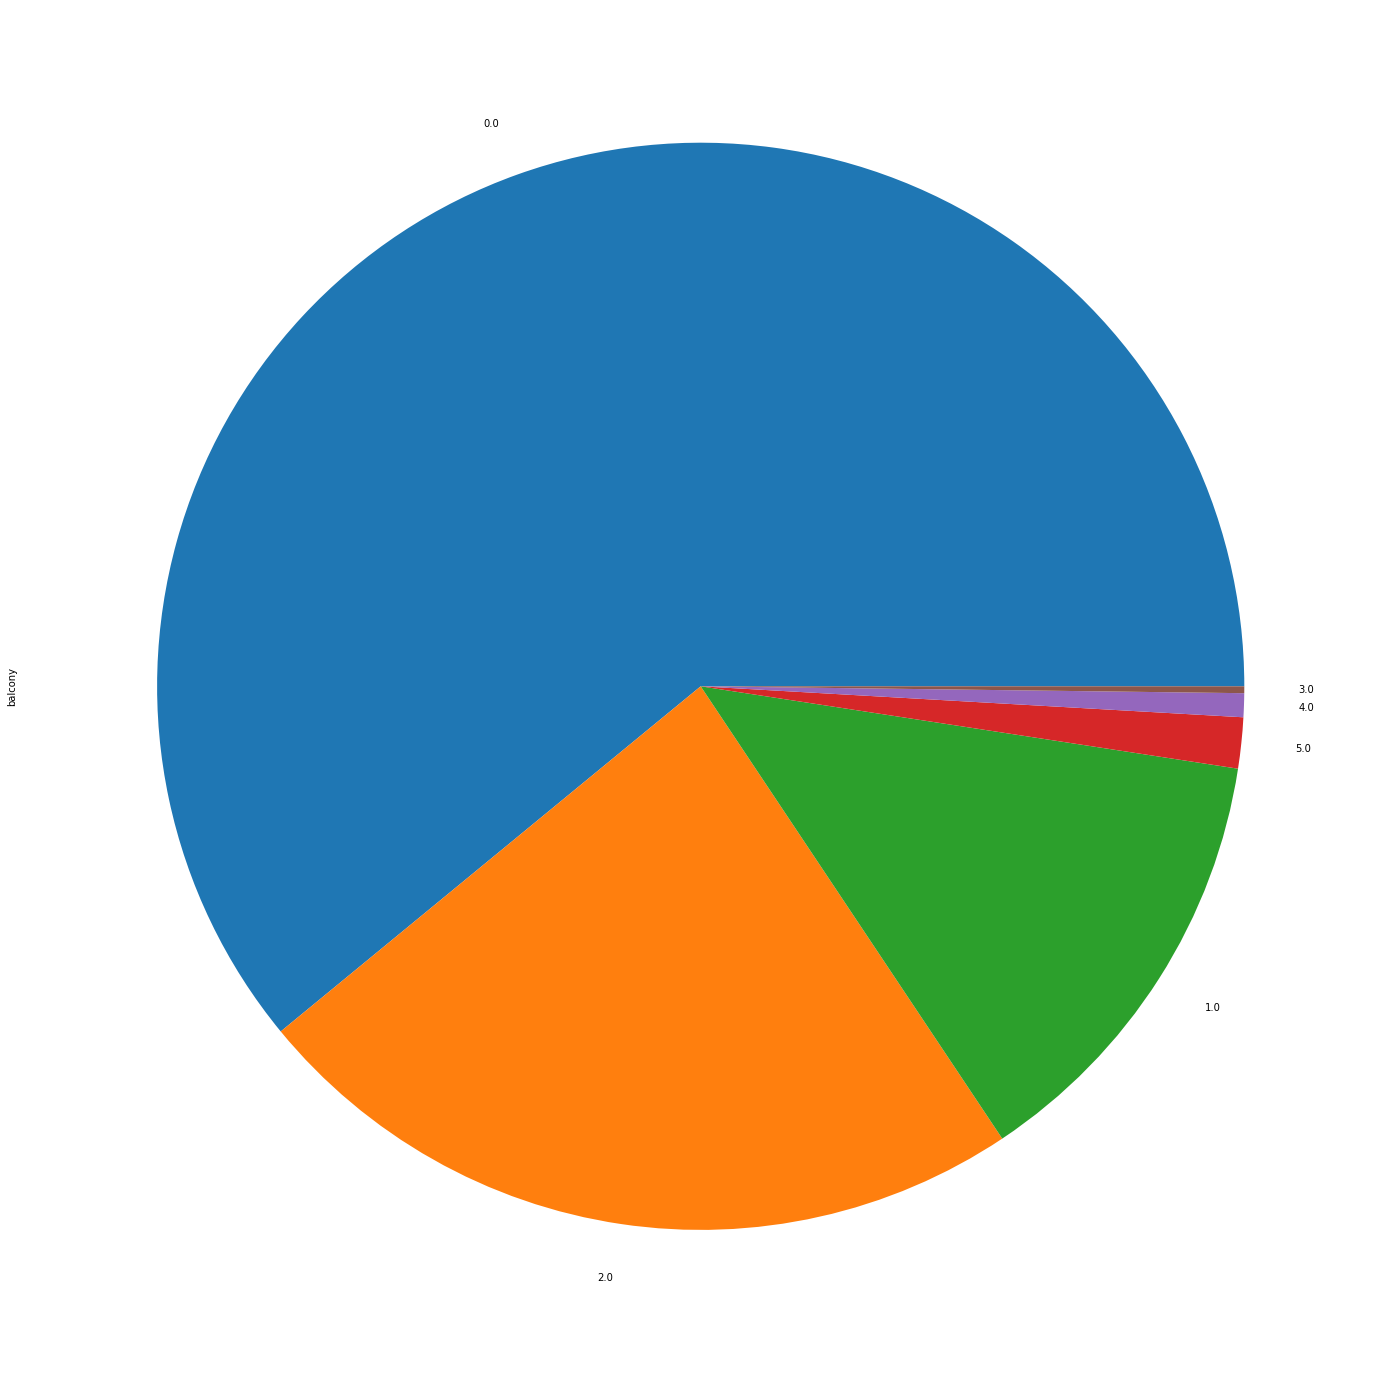

In [49]:
ax = data.loc[(data['floor']==1),'balcony'].value_counts().plot(kind='pie', figsize=(25, 25))
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Давай тут выведем график в большем машстабе, а то подписи накладываются друга на друга.
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
    
Даже после увеличения графика в 5 раз, всё равно выглядит ужасно, поэтому лучше будем заменить значения, где балконов больше 2, на "3+"
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Так лучше 

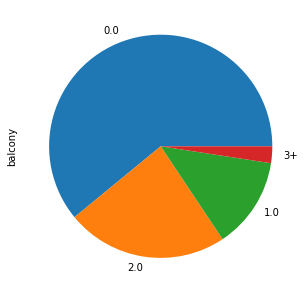

In [50]:
ax = data.loc[(~data['balcony'].isna())&(data['floor']==1),'balcony'].where(data['balcony'] < 3, '3+').value_counts().plot(kind='pie', figsize=(5,10))
plt.show()

Гипотеза потвердилась, поэтому все квартиры с пустыми записями о балконах на первом этаже, заполним нулями.

In [51]:
data.loc[(data['floor']==1)&(data['balcony'].isna()),'balcony'] = 0

Гипотеза 2 : количество балконов зависит от количества комнат.

In [52]:
data.loc[data['balcony'].isna(),'balcony'] = data[data['floor']!=1].groupby('rooms')['balcony'].transform('median')
display(data[data['balcony'].isna()])
# Не удалось заполнить дома с комнатами больше 10 медианными значениях, поскольку других данных о них нет.
display(data.loc[data['rooms'] > 10, 'balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0)
display(data[data['balcony'].isna()])

total_images   last_price  total_area first_day_exposition  rooms  \
648               3   17500000.0       183.7  2018-07-01T00:00:00     11   
5358             20   65000000.0       590.0  2019-02-14T00:00:00     15   
9688              8   33000000.0       194.1  2017-02-07T00:00:00     11   
14498             6   32250000.0       374.6  2018-06-09T00:00:00     19   
19540             8  420000000.0       900.0  2017-12-06T00:00:00     12   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
648              3.40           7.0        138.8      7          NaN  ...   
5358             3.50           6.0        409.0      3          NaN  ...   
9688             3.43           5.0        129.0      2          NaN  ...   
14498            2.55           5.0        264.5      2          NaN  ...   
19540            2.80          25.0        409.7     25          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
648            13.3      NaN  Санкт-Петербург           23606.0   
5358          100.0      NaN  Санкт-Петербург           24447.0   
9688           11.9      NaN  Санкт-Петербург           21469.0   
14498          27.6      NaN  Санкт-Петербург           19497.0   
19540         112.0      NaN  Санкт-Петербург           30706.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
648                3148.0               0.0            NaN               0.0   
5358               4666.0               1.0          767.0               0.0   
9688               1015.0               1.0          686.0               2.0   
14498              3574.0               0.0            NaN               2.0   
19540              7877.0               0.0            NaN               2.0   

       ponds_nearest  days_exposition  
648              NaN              NaN  
5358             NaN             14.0  
9688            66.0            813.0  
14498          548.0            114.0  
19540          318.0            106.0  

[5 rows x 22 columns]

0.0    2
1.0    1
Name: balcony, dtype: int64

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Мне очень нравится, как ты проверяешь все данные по нескольким гипотезам. Это очень хороше качество для аналитика. 
</div 

**Заполнение пропусков в столбце площадь кухни.**

In [53]:
display(data.sample(10))
data[data['kitchen_area'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
16140            11   2380000.0        44.6  2019-03-25T00:00:00      2   
3884              8   3450000.0        35.0  2017-05-04T00:00:00      1   
1406              9   4900000.0        69.0  2017-05-30T00:00:00      2   
13997            13   1000000.0        27.9  2019-04-11T00:00:00      2   
17004             5   3500000.0        61.4  2018-02-01T00:00:00      4   
18075            12   2750000.0        40.0  2017-07-07T00:00:00      2   
12320            20   7300000.0        72.0  2017-06-17T00:00:00      2   
5103              8   3050000.0        40.5  2017-10-14T00:00:00      1   
15413            11   8200000.0        75.0  2019-03-17T00:00:00      3   
7777              9   4100000.0        41.5  2018-03-30T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
16140            2.50           5.0         31.4      4          NaN  ...   
3884             2.60          14.0         20.0      5          NaN  ...   
1406             3.20           8.0         35.0      6        False  ...   
13997            2.60           2.0         17.0      1          NaN  ...   
17004            2.50           5.0         45.0      2          NaN  ...   
18075            3.00           4.0         28.0      3          NaN  ...   
12320            2.75          14.0         38.0     14        False  ...   
5103             2.55          10.0         17.2      4          NaN  ...   
15413            2.90           5.0         52.2      3          NaN  ...   
7777             2.60          23.0         21.4     22          NaN  ...   

       kitchen_area  balcony                locality_name  airports_nearest  \
16140           6.2      1.0                         Луга               NaN   
3884            7.5      2.0              Санкт-Петербург           31851.0   
1406           17.0      2.0                посёлок Бугры               NaN   
13997           5.0      0.0  городской посёлок Ульяновка               NaN   
17004           5.5      1.0                      Гатчина               NaN   
18075           6.0      0.0                      Колпино           23905.0   
12320          13.0      2.0              Санкт-Петербург           10997.0   
5103            8.3      1.0              Санкт-Петербург           16662.0   
15413           9.0      1.0              Санкт-Петербург           13638.0   
7777           10.5      2.0              Санкт-Петербург           30187.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
16140                 NaN               NaN            NaN               NaN   
3884               8929.0               3.0          257.0               1.0   
1406                  NaN               NaN            NaN               NaN   
13997                 NaN               NaN            NaN               NaN   
17004                 NaN               NaN            NaN               NaN   
18075             29691.0               0.0            NaN               1.0   
12320             11082.0               0.0            NaN               1.0   
5103              15664.0               1.0          447.0               1.0   
15413              8517.0               0.0            NaN               0.0   
7777              11313.0               1.0          401.0               1.0   

       ponds_nearest  days_exposition  
16140            NaN              NaN  
3884           454.0            115.0  
1406             NaN             59.0  
13997            NaN              NaN  
17004            NaN             23.0  
18075          519.0             53.0  
12320          418.0             44.0  
5103           944.0            255.0  
15413            NaN              NaN  
7777           699.0             45.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
1209              0   6700000.0       67.00  2016-05-19T00:00:00      2   
2859              6  14898509.0       87.00  2017-11-30T00:00:00      2   
8123              2  11207364.0       80.80  2018-03-21T00:00:00      3   
1499             20   6200000.0       65.00  2019-04-08T00:00:00      2   
1660              5   1935000.0       33.50  2018-02-15T00:00:00      1   
19521             6  10000000.0       71.00  2019-01-22T00:00:00      2   
22747            10   5550000.0       59.00  2018-02-13T00:00:00      2   
11692             0   2550000.0       23.06  2017-10-24T00:00:00      0   
18690             3   2945000.0       27.90  2018-07-10T00:00:00      1   
9063              6   3800000.0       39.00  2016-05-19T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1209             2.70          18.0    33.216786      6          NaN  ...   
2859             2.70          16.0    33.216786      1          NaN  ...   
8123             2.80           8.0    50.468246      3          NaN  ...   
1499             2.80           9.0    33.216786      6        False  ...   
1660             2.60          10.0    15.965325      4          NaN  ...   
19521            3.00           3.0    35.000000      3          NaN  ...   
22747            2.75          24.0    33.216786     12          NaN  ...   
11692            2.80          14.0    18.000000      9          NaN  ...   
18690            2.70          16.0    18.900000     13          NaN  ...   
9063             2.70          17.0    30.000000      1        False  ...   

       kitchen_area  balcony      locality_name  airports_nearest  \
1209            NaN      0.0    Санкт-Петербург           33623.0   
2859            NaN      0.0    Санкт-Петербург           31244.0   
8123            NaN      1.0    Санкт-Петербург           32551.0   
1499            NaN      2.0     посёлок Шушары           23450.0   
1660            NaN      1.0             Мурино               NaN   
19521           NaN      1.0    Санкт-Петербург           44870.0   
22747           NaN      1.0  посёлок Парголово           53426.0   
11692           NaN      2.0    деревня Кудрово               NaN   
18690           NaN      1.0    Санкт-Петербург           43642.0   
9063            NaN      0.0    Санкт-Петербург           36721.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1209              14722.0               0.0            NaN               1.0   
2859               6572.0               1.0          677.0               1.0   
8123               4599.0               2.0          630.0               0.0   
1499              29236.0               0.0            NaN               0.0   
1660                  NaN               NaN            NaN               NaN   
19521             20802.0               0.0            NaN               0.0   
22747             19603.0               0.0            NaN               0.0   
11692                 NaN               NaN            NaN               NaN   
18690              9496.0               0.0            NaN               0.0   
9063              13635.0               0.0            NaN               0.0   

       ponds_nearest  days_exposition  
1209           506.0             53.0  
2859           474.0              NaN  
8123             NaN             90.0  
1499             NaN              NaN  
1660             NaN             29.0  
19521            NaN              NaN  
22747            NaN             60.0  
11692            NaN             20.0  
18690            NaN             72.0  
9063             NaN             45.0  

[10 rows x 22 columns]

Гипотеза: исходя из поверхностных знаний области квартиры-студии не имеют кухни.

In [54]:
display(data[data.studio].head())
print('Количество студий всего',data[data.studio]['studio'].count())
print('Количество студий с пропусками в площади кухни', data[(data['kitchen_area'].isna())&(data.studio)]['studio'].count())

total_images  last_price  total_area first_day_exposition  rooms  \
144             1   2450000.0       27.00  2017-03-30T00:00:00      0   
440             8   2480000.0       27.11  2018-03-12T00:00:00      0   
608             2   1850000.0       25.00  2019-02-20T00:00:00      0   
697            12   2500000.0       24.10  2017-12-01T00:00:00      0   
716             5   1500000.0       17.00  2017-06-07T00:00:00      0   

     ceiling_height  floors_total  living_area  floor is_apartment  ...  \
144            2.75          24.0        15.50      2          NaN  ...   
440            2.70          17.0        24.75      4          NaN  ...   
608            2.60          10.0        18.00      7          NaN  ...   
697            2.75          25.0        17.50     21          NaN  ...   
716            2.70           9.0        12.00      1          NaN  ...   

     kitchen_area  balcony    locality_name  airports_nearest  \
144           NaN      2.0           Мурино               NaN   
440           NaN      2.0  Санкт-Петербург           38171.0   
608           NaN      2.0   посёлок Шушары               NaN   
697           NaN      2.0  деревня Кудрово               NaN   
716           NaN      0.0   посёлок Шушары           18654.0   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                 NaN               NaN            NaN               NaN   
440             15015.0               0.0            NaN               2.0   
608                 NaN               NaN            NaN               NaN   
697                 NaN               NaN            NaN               NaN   
716             29846.0               0.0            NaN               0.0   

     ponds_nearest  days_exposition  
144            NaN            181.0  
440          982.0             64.0  
608            NaN             29.0  
697            NaN            201.0  
716            NaN             40.0  

[5 rows x 22 columns]

Количество студий всего 149
Количество студий с пропусками в площади кухни 149


Гипотеза подтвердилась и можно заполнить для строк про студии нулями площадь кухни.

In [55]:
data.loc[data.studio,'kitchen_area'].fillna(0, inplace=True)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен и тут. 
</div 

Гипотеза: поскольку вся площадь квартиры высчитывается как жилая_площадь + площадь_кухни + площадь_коридоров ( ) , то можно будет предсказать площадь кухни, если вычесть из площади всей квартиры жилую площадь. 

In [56]:
#ax = data.plot(kind='scatter', x='total_area' ,y='kitchen_area',grid=True, alpha=0.3)
data['total_area_without_living_area'] = data['total_area'] - data['living_area'] 
data[['total_area_without_living_area', 'kitchen_area']].corr()

total_area_without_living_area  kitchen_area
total_area_without_living_area                         1.00000       0.71319
kitchen_area                                           0.71319       1.00000

Коэффициент корреляции 0.71. Это достаточно высокий, чтобы  использовать его.

In [57]:
a, b = np.polyfit(
    x = data.loc[~(data['kitchen_area'].isna()),'total_area_without_living_area'], 
    y = data.loc[~(data['kitchen_area'].isna()),'kitchen_area'], 
    deg = 1
)
print(a,b)
# data.loc[(a * data['total_area_without_living_area'] + b > data['total_area'] -data['living_area']),'kitchen_area'] = 0.8*(data['total_area'] - data['living_area'])
data.loc[data['kitchen_area'].isna(),'kitchen_area'] = (a * data['total_area_without_living_area'] + b).abs()
data['kitchen_area'].isna().sum()

0.24850304460771602 4.083244659429675


0

In [58]:
data.drop(columns='total_area_without_living_area',inplace=True)

Успешно избавились от пропусков в площади кухни.

**Пропуски в названии населенного пункта**

In [59]:
display(data.sample(10))
data[data['locality_name'].isna()].sample(10)

total_images  last_price  total_area first_day_exposition  rooms  \
7124              3   6199424.0       69.19  2015-11-12T00:00:00      2   
20955            14  67000000.0      172.00  2016-05-13T00:00:00      4   
18696            16   4990000.0       48.00  2018-10-13T00:00:00      2   
14678             1   6900000.0       80.00  2018-07-29T00:00:00      3   
7784             18   6600000.0       72.00  2017-04-17T00:00:00      2   
18103             0   3650000.0       58.00  2017-04-06T00:00:00      3   
3455             30   3570000.0       38.30  2017-11-10T00:00:00      1   
12534             8   5400000.0       76.80  2017-11-08T00:00:00      3   
18220             8   5600000.0       43.00  2018-07-24T00:00:00      1   
12749            18  19500000.0       96.00  2018-06-28T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
7124             2.75          24.0    33.216786      8        False  ...   
20955            2.80           8.0   101.000000      7          NaN  ...   
18696            3.05           5.0    28.000000      2          NaN  ...   
14678            2.60          12.0    46.000000     10        False  ...   
7784             2.50          17.0    34.000000     17          NaN  ...   
18103            2.55           9.0    38.000000      1          NaN  ...   
3455             2.65          12.0    20.000000      4          NaN  ...   
12534            2.50           5.0    44.600000      1          NaN  ...   
18220            2.75          18.0    21.000000     15          NaN  ...   
12749            3.40           5.0    71.000000      5          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
7124      13.022698      0.0  Санкт-Петербург            9655.0   
20955     17.000000      1.0  Санкт-Петербург           27102.0   
18696     11.000000      1.0  Санкт-Петербург           14169.0   
14678     15.000000      1.0  Санкт-Петербург           20498.0   
7784      14.000000      2.0    посёлок Бугры               NaN   
18103      7.000000      0.0          Колпино           25335.0   
3455      10.000000      1.0  Санкт-Петербург           15606.0   
12534     14.900000      0.0  Санкт-Петербург           18118.0   
18220     11.000000      1.0  Санкт-Петербург           11987.0   
12749     18.000000      1.0  Санкт-Петербург           23851.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
7124              13255.0               1.0          980.0               1.0   
20955              7442.0               2.0          164.0               2.0   
18696              8565.0               0.0            NaN               0.0   
14678             22210.0               0.0            NaN               0.0   
7784                  NaN               NaN            NaN               NaN   
18103             31121.0               1.0          645.0               0.0   
3455              14402.0               1.0          413.0               0.0   
12534             21280.0               0.0            NaN               0.0   
18220             11444.0               1.0          389.0               1.0   
12749              2164.0               2.0          230.0               1.0   

       ponds_nearest  days_exposition  
7124          1093.0            244.0  
20955          473.0            790.0  
18696            NaN             65.0  
14678            NaN             18.0  
7784             NaN            302.0  
18103            NaN             83.0  
3455             NaN             74.0  
12534            NaN              NaN  
18220          272.0            113.0  
12749          134.0             26.0  

[10 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
4670              1   5500000.0        83.0  2015-08-14T00:00:00      3   
7600              8   6800000.0        70.0  2016-01-31T00:00:00      3   
7330              8   5100000.0        63.0  2015-01-27T00:00:00      3   
5707              7   3700000.0        30.0  2016-04-29T00:00:00      1   
15866            10   3950000.0        44.0  2016-04-16T00:00:00      2   
17764             9   8400000.0        94.0  2016-01-24T00:00:00      3   
19045             6   4650000.0        48.0  2016-01-25T00:00:00      2   
20590             7   3380000.0        56.0  2017-11-06T00:00:00      2   
14273             2   4422000.0        60.0  2016-03-23T00:00:00      2   
18526             3  10800000.0        86.0  2016-06-24T00:00:00      4   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
4670             3.00           7.0    50.468246      6          NaN  ...   
7600             2.75          11.0    42.000000      9          NaN  ...   
7330             2.55           5.0    42.000000      1        False  ...   
5707             2.75          24.0    20.000000     23          NaN  ...   
15866            2.70           5.0    28.500000      5        False  ...   
17764            2.75          23.0    52.000000      5          NaN  ...   
19045            3.12           5.0    26.200000      1        False  ...   
20590            2.70           4.0    29.000000      3          NaN  ...   
14273            2.75          23.0    32.000000     14          NaN  ...   
18526            3.20           7.0    48.000000      2          NaN  ...   

       kitchen_area  balcony  locality_name  airports_nearest  \
4670      12.167485      0.0            NaN           26534.0   
7600      11.000000      1.0            NaN           37123.0   
7330       7.500000      0.0            NaN           25925.0   
5707       6.568275      0.0            NaN           21460.0   
15866      5.500000      1.0            NaN           36380.0   
17764     14.520373      0.0            NaN           36865.0   
19045      8.000000      0.0            NaN           21654.0   
20590     10.000000      1.0            NaN               NaN   
14273     11.900000      0.0            NaN           22041.0   
18526     12.000000      0.0            NaN           11206.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
4670               5382.0               1.0          446.0               1.0   
7600              12332.0               0.0            NaN               0.0   
7330               4627.0               2.0          459.0               0.0   
5707              16788.0               0.0            NaN               1.0   
15866              9497.0               1.0          634.0               3.0   
17764             10976.0               0.0            NaN               1.0   
19045              3312.0               1.0          549.0               1.0   
20590                 NaN               NaN            NaN               NaN   
14273             17369.0               0.0            NaN               1.0   
18526              8943.0               0.0            NaN               0.0   

       ponds_nearest  days_exposition  
4670           376.0            350.0  
7600             NaN            209.0  
7330             NaN            566.0  
5707           170.0             49.0  
15866          513.0             85.0  
17764          856.0            305.0  
19045          858.0            254.0  
20590            NaN             78.0  
14273          374.0             90.0  
18526            NaN             65.0  

[10 rows x 22 columns]

Очередной столбец, где нельзя заполнить пропуски.

**Заполнение пропусков для столбца расстояние до ближайшего аэропорта**

Для начала заполним медианными значениями те строки, информация о городе у нас есть.

In [60]:
data.loc[data['airports_nearest'].isna(),'airports_nearest'] = (
    data.groupby('locality_name')['airports_nearest'].transform('median')
)

Для всех остальных заполним их максимальным значением из всех расстояний до аэропорта.

In [61]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].max())
data['airports_nearest'].isna().sum()

0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Поскольку эти данные не особо нужны для нашего исследования, то можно было оставить пропуски как есть.  
</div 

<div class="alert alert-block alert-info">
<b>💾 Thinking:</b> 

Возможно.    
</div>


**Заполнение пропусков столбца расстояния до центра города**

Для начала заполним медианными значениями те строки, информация о городе у нас есть.

In [62]:
data.loc[data['cityCenters_nearest'].isna(),'cityCenters_nearest'] = (
    data.groupby('locality_name')['cityCenters_nearest'].transform('median')
)

Хотелось бы сравнить, данные где у нас нет информации о расстояние до города с теми где есть.

In [63]:
data[data['cityCenters_nearest'].isna()].groupby('locality_name')['last_price'].count().head(10)

locality_name
Бокситогорск     16
Волосово         36
Волхов          111
Всеволожск      398
Выборг          237
Высоцк            4
Гатчина         307
Ивангород        28
Каменногорск     13
Кингисепп       104
Name: last_price, dtype: int64

In [64]:
data[~data['cityCenters_nearest'].isna()].groupby('locality_name')['last_price'].count().head(10)

locality_name
Зеленогорск           24
Колпино              338
Красное Село         178
Кронштадт             96
Ломоносов            133
Мурино               590
Павловск              38
Петергоф             201
Пушкин               369
Санкт-Петербург    15721
Name: last_price, dtype: int64

Всеволожск, Выборг, Гатчина и т.д. - это населенные которые находятся близко от Петрербурга, но которые не зависят от него.

Павловск, Петергоф, Пушкин итд  - это  внутригородское муниципальное образование города федерального значения Санкт-Петербурга России.

Можно сделать вывод, что у нас есть данные по всем населенным пуктам, которые принадлежат Питеру, в том время данные отствуют по тем, которые нет. Здесь есть два варианта как обработать данные:
- считать расстояние от города, как от любого города, но тогда расстояние до центра города придется заполнять вручную основываясь на карту
- считать расстояние от города как расстояние от Петербурга, как культурного центра.
Для простоты обработки я выберу второй вариант.

Для всех остальных заполним их максимальным значением из всех расстояний до центра города.

In [65]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С этим тоже классно. 

**Заполнение пропусков столбца количества парков в радиусе 3км.**

Для начала заполним пропуски для тех строк, у которых есть информация о расстоянии до ближайшего парка. Если это меньше 3км, то заполняем 1, если же больше заполняем 0.

In [66]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = (
data['parks_nearest'].apply(lambda x: 1 if x <= 3000 else x*0 )
)

In [67]:
#data.groupby('locality_name')['parks_nearest'].sum().sort_values(ascending=False).head(10)
print(data.loc[data['parks_around3000'].isna()].groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(12))

locality_name
Мурино                     588
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
посёлок Бугры              114
Сланцы                     112
Волхов                     111
Name: last_price, dtype: int64


Мирино имеет 1 парк, который находится в центре посёлка, длина и ширина которого меньше 3км. Следовательно каждая квартира будет имеет хотя бы 1 парк поблизости.

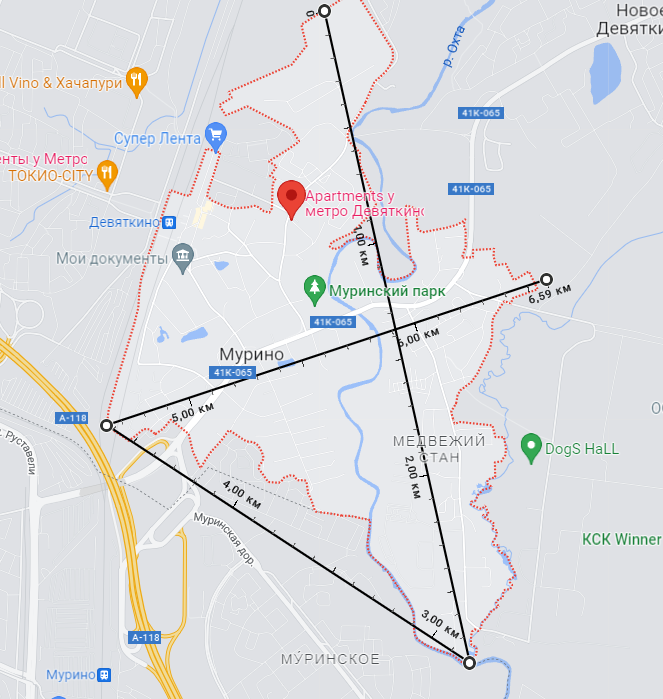

In [68]:
data.loc[(data['locality_name'] == 'Мурино')&(data['parks_around3000'].isna()), 'parks_around3000' ] = 1

Всеволожск имеет один парк, максимальное расстояния до него 5.5км. Можно предположить, что где-то ~30% квартир находится вблизи с парком, отстальные нет.

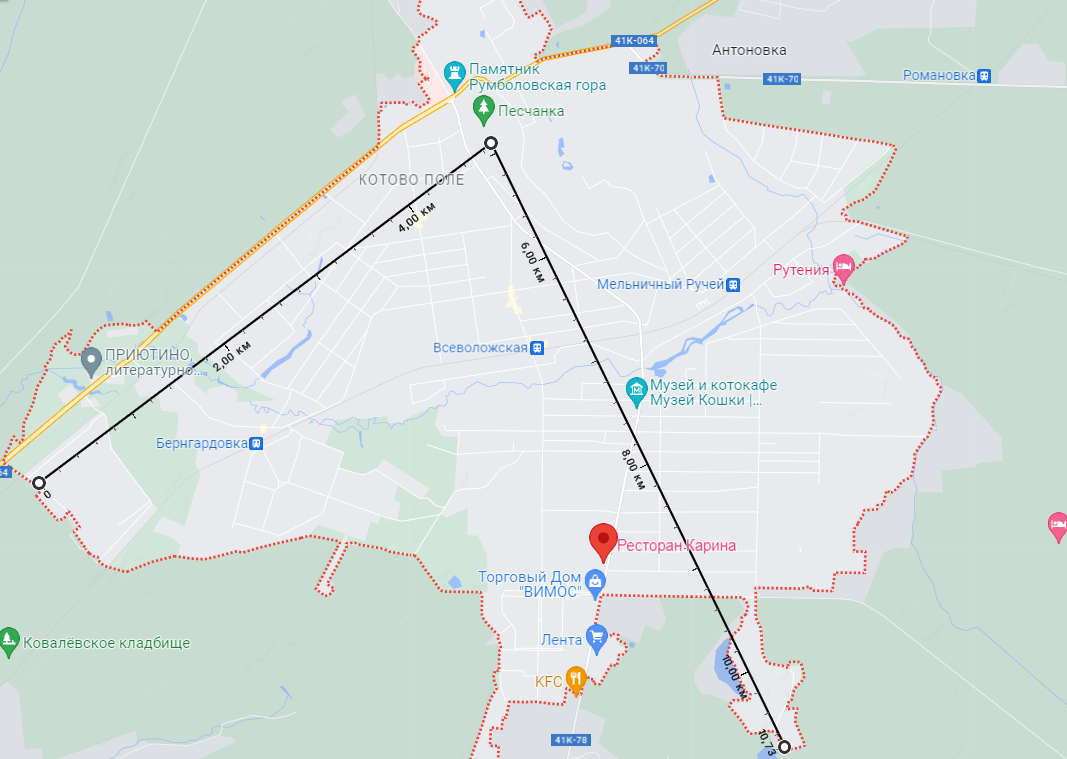

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А тут ты пошел дальше и воспользовался данными с внешних источников. Супер. 
</div 

In [69]:
data.loc[(data['locality_name'] == 'Всеволожск')&(data['parks_around3000'].isna()), 'parks_around3000' ] = data['total_images'].apply(lambda x: random.choice([0,0,1]))

Гатчина имеет два парка близко друг от друга с расстоянием до дальнешей дочки 5км. 

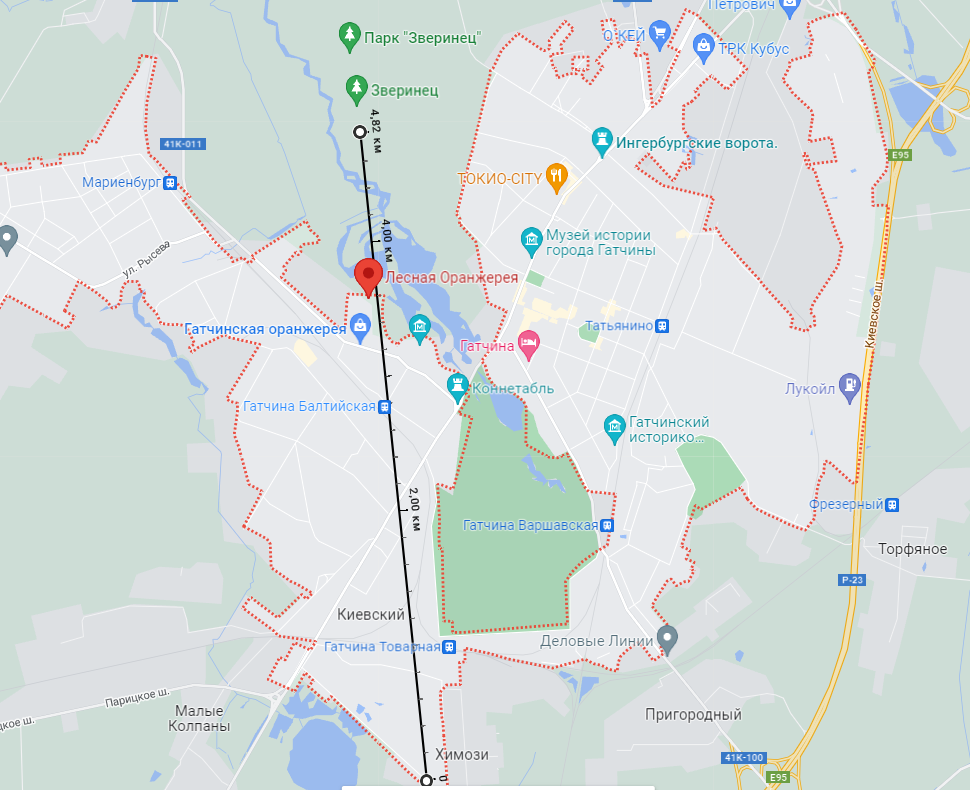

In [70]:
data.loc[(data['locality_name'] == 'Гатчина')&(data['parks_around3000'].isna()), 'parks_around3000' ] = data['total_images'].apply(lambda x: random.choice([0,2]))

Деревня Кудрово не имеет поблизости совсем никаких парков.

In [71]:
data.loc[(data['locality_name'] == 'деревня Кудрово')&(data['parks_around3000'].isna()), 'parks_around3000' ] = 0

Выборг тоже не имеет поблизости совсем никаких парков.

In [72]:
data.loc[(data['locality_name'] == 'Выборг')&(data['parks_around3000'].isna()), 'parks_around3000' ] = 0

Город Кудрово имеет в радиусе 2.17км один парк.

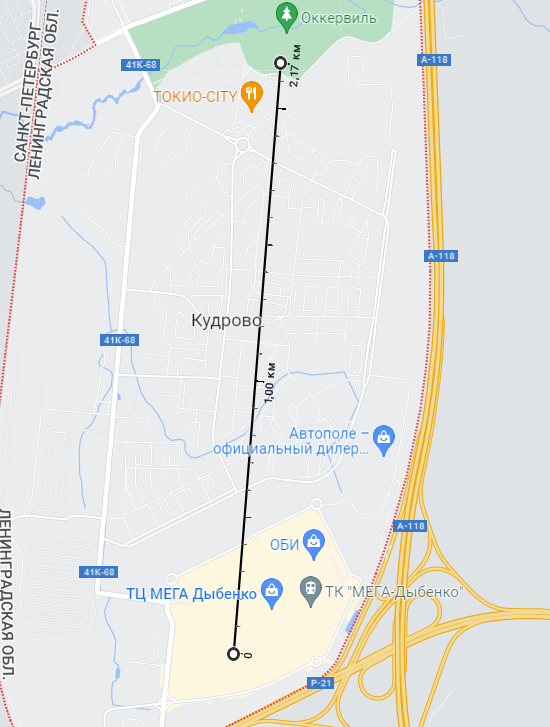

In [73]:
data.loc[(data['locality_name'] == 'Кудрово')&(data['parks_around3000'].isna()), 'parks_around3000' ] = 1

Новое Девяткино имеет один парк в радиусе 3.75км.

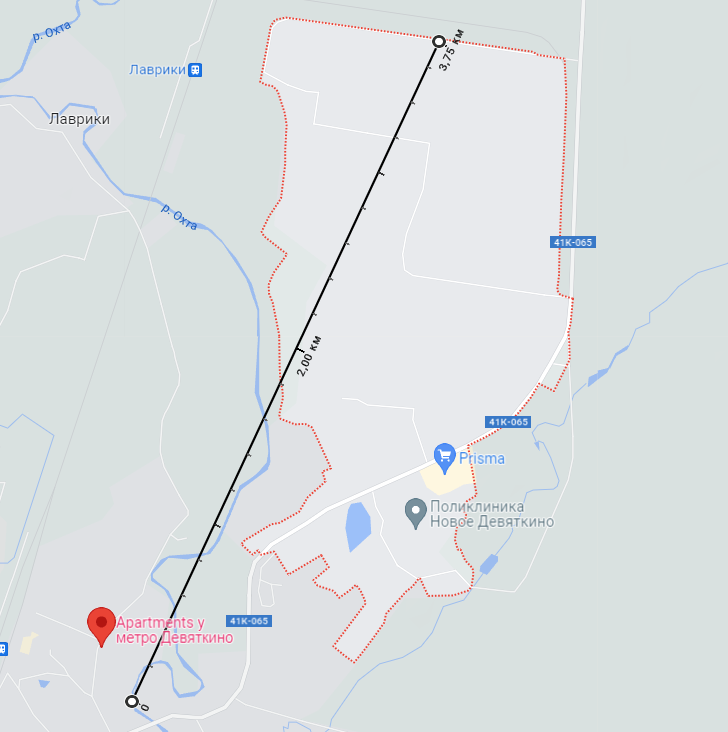

In [74]:
data.loc[(data['locality_name'] == 'деревня Новое Девяткино')&(data['parks_around3000'].isna()), 'parks_around3000' ] = data['total_images'].apply(lambda x: random.choice([0,1]))

...итд

In [75]:
data['parks_around3000'].fillna(0, inplace=True)

**Заполнение пропусков для ближайшего расстояния до парка**

Для начала заполненим пропуски для тех парков для которых есть ненулевое количество парков в радиусе 3км.  

In [76]:
data.loc[(data['parks_around3000'] > 0) & (data['parks_nearest'].isna()),'parks_nearest'] =\
data[(data['parks_around3000'] > 0)].groupby('locality_name')['parks_nearest'].transform('mean')

Теперь тоже самое, но для тех у которых нет средних данных

In [77]:
data.loc[(data['parks_around3000'] > 0) & (data['parks_nearest'].isna()),'parks_nearest'] = data[data['parks_around3000']>0]['parks_nearest'].median()

In [78]:
data['parks_nearest'].fillna(data['parks_nearest'].max(), inplace=True)
data['parks_nearest'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь супер. 
</div 

**Заполнение пропусков столбца количества водоёмов в радиусе 3км.**

Для начала заполним пропуски для тех строк, у которых есть информация о расстоянии до ближайшего парка. Если это меньше 3км, то заполняем 1, если же больше заполняем 0.

In [79]:
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = (
data['ponds_around3000'].apply(lambda x: 1 if x <= 3000 else x*0 )
)

In [80]:
print(data.loc[data['ponds_around3000'].isna()].groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(12))

locality_name
Мурино                     588
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
посёлок Бугры              114
Сланцы                     112
Волхов                     111
Name: last_price, dtype: int64


Все знакомые, из задания на заполнения пропуска в парках можно узнать и следующие.

In [81]:
data.loc[(data['locality_name'] == 'Мурино')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 3

In [82]:
data.loc[(data['locality_name'] == 'Всеволожск')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 1

In [83]:
data.loc[(data['locality_name'] == 'Гатчина')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 3

In [84]:
data.loc[(data['locality_name'] == 'деревня Кудрово')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 0

In [85]:
data.loc[(data['locality_name'] == 'Выборг')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 0

In [86]:
data.loc[(data['locality_name'] == 'Кудрово')&(data['ponds_around3000'].isna()), 'ponds_around3000' ] = 1

In [87]:
data['ponds_around3000'].fillna(0,inplace=True)

**Заполнение пропусков в расстоянии до ближайшего водоёма**

In [88]:
data.loc[(data['ponds_around3000'] > 0) & (data['ponds_nearest'].isna()),'ponds_nearest'] =\
data[(data['ponds_around3000'] > 0)].groupby('locality_name')['ponds_nearest'].transform('mean')

In [89]:
data.loc[(data['ponds_around3000'] > 0) & (data['ponds_nearest'].isna()),'ponds_nearest'] = data[data['ponds_around3000']>0]['ponds_nearest'].median()

In [90]:
data['ponds_nearest'].fillna(data['ponds_nearest'].max(), inplace=True)

**Заполнение пропусков в столбце количества дней сколько было размещено заявление.**

Поскольку сейчас придется работать с датами, то сначала стоит преобразовать даты-строки в просто даты.

In [91]:
data.head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0    51.000000      8          NaN  ...   
1            2.75          11.0    18.600000      1          NaN  ...   
2            2.55           5.0    34.300000      4          NaN  ...   
3            2.60          14.0    50.468246      9          NaN  ...   
4            3.03          14.0    32.000000     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0     25.000000      1.0  Санкт-Петербург           18863.0   
1     11.000000      2.0   посёлок Шушары           12817.0   
2      8.300000      0.0  Санкт-Петербург           21741.0   
3     31.053716      0.0  Санкт-Петербург           28098.0   
4     41.000000      1.0  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0         3190.0               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1         1344.0             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [92]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно переводишь данные в формат даты. 
</div 

In [93]:
data[data['days_exposition'].isna()].head(5)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0       108.0           2019-03-07      3   
7              5   7915000.0        71.6           2019-04-18      2   
44            13   5350000.0        40.0           2018-11-18      1   
45            17   5200000.0        50.6           2018-12-02      2   
46            17   6600000.0        52.1           2019-01-31      2   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0    51.000000      8          NaN  ...   
7             2.75          24.0    33.216786     22          NaN  ...   
44            2.75          22.0    15.965325      3          NaN  ...   
45            2.65           9.0    30.300000      7          NaN  ...   
46            2.60          24.0    29.700000      9          NaN  ...   

    kitchen_area  balcony    locality_name  airports_nearest  \
0      25.000000      1.0  Санкт-Петербург           18863.0   
7      18.900000      2.0  Санкт-Петербург           23982.0   
44     10.055934      1.0  Санкт-Петербург           30471.0   
45      7.000000      1.0  Санкт-Петербург           30011.0   
46      8.300000      2.0  Санкт-Петербург           15114.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
7              11634.0               0.0         3190.0               0.0   
44             11603.0               1.0          620.0               1.0   
45             12872.0               0.0         3190.0               0.0   
46             12702.0               0.0         3190.0               0.0   

    ponds_nearest  days_exposition  
0           755.0              NaN  
7          1344.0              NaN  
44         1152.0              NaN  
45         1344.0              NaN  
46         1344.0              NaN  

[5 rows x 22 columns]

Гипотеза: из условия было сказано, что `days_exposition` является количеством дней, которые прошли с момента публикации заявления до его снятия, из чего можно логично предположить, что если данные nan - заявление ещё не было снято. Соответственно надо заполнять максимальной датой из `first_day_exposition` потому, что это скорее всего дата когда выгружали базу данных.

In [94]:
data.loc[data['first_day_exposition'] == data['first_day_exposition'].max()].head()

total_images  last_price  total_area first_day_exposition  rooms  \
2178            10   5100000.0       51.00           2019-05-03      1   
3254            16   8800000.0       80.00           2019-05-03      3   
4450            13   3500000.0       34.60           2019-05-03      1   
5986             0   5000000.0       48.00           2019-05-03      3   
8170             4   3280000.0       38.19           2019-05-03      1   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
2178            2.55           9.0    15.000000      2          NaN  ...   
3254            2.80          17.0    31.000000     15          NaN  ...   
4450            2.50           5.0    19.400000      3          NaN  ...   
5986            2.50           9.0    50.468246      2          NaN  ...   
8170            3.00           6.0    14.410000      4          NaN  ...   

      kitchen_area  balcony                locality_name  airports_nearest  \
2178     25.000000      1.0                      Кудрово           84869.0   
3254     27.000000      2.0                      Кудрово           84869.0   
4450      7.300000      2.0                       Пушкин           13107.0   
5986      3.469878      1.0              Санкт-Петербург           51060.0   
8170     10.260000      1.0  городской посёлок Новоселье           84869.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2178             13266.0               1.0          454.0               1.0   
3254             13266.0               1.0          454.0               1.0   
4450             25261.0               1.0          361.0               0.0   
5986             16892.0               0.0         3190.0               0.0   
8170             13266.0               0.0         3190.0               0.0   

      ponds_nearest  days_exposition  
2178          474.0              NaN  
3254          474.0              NaN  
4450         1344.0              NaN  
5986         1344.0              NaN  
8170         1344.0              NaN  

[5 rows x 22 columns]

In [95]:
data.loc[(data['first_day_exposition'] == data['first_day_exposition'].max())&(~data['days_exposition'].isna())].head()

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Все строки за последний день с выгруженной базы данных имеют nan в количестве дней, что потверджает теорию. Поэтому заполнить days_exposition следует максимальным днем - днем постановления.

Чтобы не потерять информацию о том, успела ли квартира продаться или нет добавим новый слолбец `sold`, где для каждого непустого значения в столбце количества дней экспозиции будет - True

In [96]:
data['sold'] = ~(data['days_exposition'].isna())

In [97]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0    51.000000      8          NaN  ...   
1            2.75          11.0    18.600000      1          NaN  ...   
2            2.55           5.0    34.300000      4          NaN  ...   
3            2.60          14.0    50.468246      9          NaN  ...   
4            3.03          14.0    32.000000     13          NaN  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0      1.0  Санкт-Петербург           18863.0              16028.0   
1      2.0   посёлок Шушары           12817.0              18603.0   
2      0.0  Санкт-Петербург           21741.0              13933.0   
3      0.0  Санкт-Петербург           28098.0               6800.0   
4      1.0  Санкт-Петербург           31856.0               8098.0   

  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0              1.0          482.0               2.0          755.0   
1              0.0         3190.0               0.0         1344.0   
2              1.0           90.0               2.0          574.0   
3              2.0           84.0               3.0          234.0   
4              2.0          112.0               1.0           48.0   

   days_exposition   sold  
0              NaN  False  
1             81.0   True  
2            558.0   True  
3            424.0   True  
4            121.0   True  

[5 rows x 23 columns]

In [98]:
data.loc[data['days_exposition'].isna(),'days_exposition']= (data['first_day_exposition'].max() - data['first_day_exposition']).dt.days + 1

In [99]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
sold                        0
dtype: int64

Успешно заполнили пропуски, где это было возможно.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Получилось у тебя отлично. Очень качественная работа. 
</div 

### Изменение типов данных.
Многие типы данных в базе данных были выбраны не оптимально, поэтому лучше бы их заменить на более подходящие.

In [100]:
mu_before = data.memory_usage(index=True).sum()
print('Memory usage before changes', mu_before)

Memory usage before changes 3863065


In [101]:
display(data.head())
data.info()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0    51.000000      8          NaN  ...   
1            2.75          11.0    18.600000      1          NaN  ...   
2            2.55           5.0    34.300000      4          NaN  ...   
3            2.60          14.0    50.468246      9          NaN  ...   
4            3.03          14.0    32.000000     13          NaN  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0      1.0  Санкт-Петербург           18863.0              16028.0   
1      2.0   посёлок Шушары           12817.0              18603.0   
2      0.0  Санкт-Петербург           21741.0              13933.0   
3      0.0  Санкт-Петербург           28098.0               6800.0   
4      1.0  Санкт-Петербург           31856.0               8098.0   

  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0              1.0          482.0               2.0          755.0   
1              0.0         3190.0               0.0         1344.0   
2              1.0           90.0               2.0          574.0   
3              2.0           84.0               3.0          234.0   
4              2.0          112.0               1.0           48.0   

   days_exposition   sold  
0             58.0  False  
1             81.0   True  
2            558.0   True  
3            424.0   True  
4            121.0   True  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Максимальное количество изображений - 50. int64 слишком много для это

In [102]:
display(data['total_images'].max())
data['total_images'] = data['total_images'].astype(np.int8)

50

Все значения для последней цены даны с точностью до целых, поэтому можно преобразовать и то можно взять uint32.

In [103]:
display(data['last_price'].max())
data['last_price'] = data['last_price'].astype(np.uint32)

763000000.0

Максимальное жилая площадь - 900. float64  слишком много для это

In [104]:
display(data['total_area'].max())
data['total_area'] = data['total_area'].astype(np.float32)

900.0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень здорово, что ты помнишь о экономии вычислительной памяти. 
</div 

Максимальное количество комнат 19, этого слишком мало для int64

In [105]:
display(data['rooms'].max())
data['rooms'] = data['rooms'].astype(np.int8)

19

Максимальная высота потолка - 100. Поэтому можно заменить на тип по-меньше.

In [106]:
display(data['ceiling_height'].max())
data['ceiling_height'] = data['ceiling_height'].astype(np.float32)

100.0

Количество этажей не может быть не целым.

In [107]:
display(data['floors_total'].max())
data['floors_total'] = data['floors_total'].astype(np.int8)

60.0

Максимальный этаж 33, можно взять тип по-меньше

In [108]:
display(data['floor'].max())
data['floor'] = data['floor'].astype(np.int8)

33

Максмальная площадь кухни 123.9, можно взять тип по-меньше

In [109]:
display(data['kitchen_area'].max())
data['kitchen_area'] = data['kitchen_area'].astype(np.float32)

122.90116701541413

Количество балконов не может быть не целым.

In [110]:
display(data['balcony'].max())
data['balcony'] = data['balcony'].astype(np.int8)

5.0

Максимальное расстояние до аэропорта 84869.0, можно взять тип по-меньше.

In [111]:
display(data['airports_nearest'].max())
data['airports_nearest'] = data['airports_nearest'].astype(np.float32)

84869.0

Максимальное расстояние до центра города 65968.0, можно взять тип по-меньше.

In [112]:
display(data['cityCenters_nearest'].max())
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(np.float32)

65968.0

Количество парков не может быть не целым.

In [113]:
display(data['parks_around3000'].max())
data['parks_around3000'] = data['parks_around3000'].astype(np.int8)

3.0

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В целом, перевод в один формат для некоторых столбцов можно было сдлеать через цикл автоматически . 
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
    
Возможно, но мне просто хотелось продемонстрировать, что изменения обоснованы и не будет переполнения данных
</div>

```python
columns_to_change = [...]
for i in columns_to_change:
    data[i] = data[i].astype(np.type)
```

Максимальное расстояние до ближайшего парка 3190, можно взять тип по-меньше.

In [114]:
display(data['parks_nearest'].max())
data['parks_nearest'] = data['parks_nearest'].astype(np.float32)

3190.0

Количество водоёмом не может быть не целым.

In [115]:
display(data['ponds_around3000'].max())
data['ponds_around3000'] = data['ponds_around3000'].astype(np.int8)

3.0

Количество дней выстави не может быть не целым.

In [116]:
display(data['days_exposition'].max())
data['days_exposition'] = data['days_exposition'].astype(np.uint16)

1619.0

Максимальное расстояние до ближайшего водоёма 3000, можно взять тип по-меньше.

In [117]:
display(data['ponds_nearest'].max())
data['ponds_nearest'] = data['ponds_nearest'].astype(np.float32)

1344.0

In [118]:
mu_after = data.memory_usage(index=True).sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  uint32        
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

In [119]:
print('Memory usage after changes', mu_after)

Memory usage after changes 1801252


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Потрясающе
</div 

### Устранение редких и выбивающихся значений (аномалий) во всех столбцах

Для начала определим функцию для нахождения усов диаграммы размаха.

In [120]:
def whiskers(row):
    q3, q1 = np.percentile(row, [75 ,25])
    iqr = q3 - q1
    return q3,q1,iqr

In [121]:
def drop_out_of_whiskers(data, column_name, additional_condition='ceiling_height > 0'):
    q3, q1, iqr = whiskers(data.query(additional_condition)[column_name])
    while data[(data[column_name] > 1.5 * iqr + q3 ) | (data[column_name] < q1 - 1.5 * iqr )].query(additional_condition)[column_name].count() > 0:
        data.drop(data[(data[column_name] > 1.5 * iqr + q3 ) | (data[column_name] < q1 - 1.5 * iqr )].query(additional_condition).index, inplace=True)
        q3, q1, iqr = whiskers(data.query(additional_condition)[column_name])

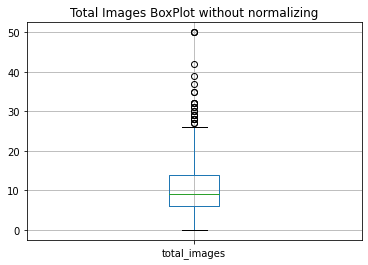

In [122]:
ax= data.boxplot(column='total_images')
ax.title.set_text('Total Images BoxPlot without normalizing')
plt.show()

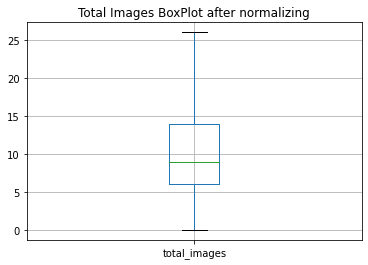

In [123]:
q3,q1,iqr = whiskers(data['total_images'])
data.drop(data[data['total_images'] > 1.5*iqr + q3].index, inplace=True)
ax= data.boxplot(column='total_images')
ax.title.set_text('Total Images BoxPlot after normalizing')
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Не забывай давать графикам названия. Так сразу будет понятно, что ты на них пытаешься показать. 
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
    
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Ну и тут здорово. 

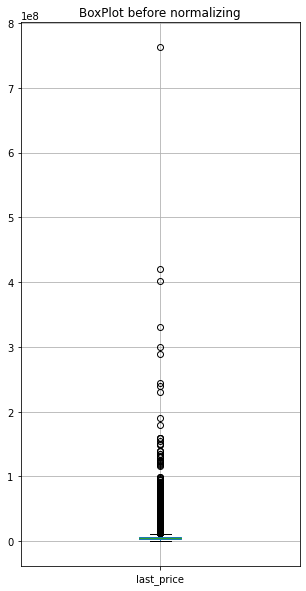

In [124]:
ax = data.plot(kind='box', y='last_price', figsize=(5,10), grid=True)
ax.title.set_text('BoxPlot before normalizing')
plt.show()

700+млн за одну квартиру, надо бы проверить - может она просто очень особенная.

In [125]:
data[data['last_price']==data['last_price'].max()]

total_images  last_price  total_area first_day_exposition  rooms  \
12971            19   763000000       400.0           2017-09-30      7   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
12971             2.6            10        250.0     10          NaN  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
12971        2  Санкт-Петербург           25108.0               3956.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
12971                1          530.0                 3          756.0   

       days_exposition  sold  
12971               33  True  

[1 rows x 23 columns]

Согласно артиклю с сайта "Деловой Петербург" 2017 года самая дорогая квартира продалась за 1.07 мрд, он имел 450 квадратных метров и 8 комнат, что очень схоже с нашими данными. Что значит скорее всего это не ошибка, а просто естественная аномалия. 

Попробуем построить диаграмму размаху, но для всех городов, которые не Питер, поскольку цены там скорее всего намного завышеней по сравнению с остальными городами как культурный центр России.

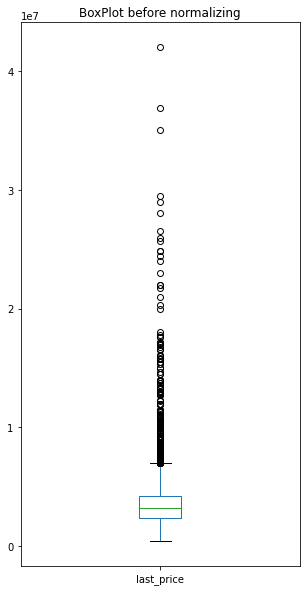

In [126]:
ax = data.query('locality_name != "Санкт-Петербург"').plot(kind='box', y='last_price', figsize=(5,10))
ax.title.set_text('BoxPlot before normalizing')
plt.show()

По-прежнему слишком много аномальных значений.

Хоть цена на некоторые из заявления составили сотни миллионов, но при этом они также имеют соответствующую большую площадь, поэтому хотелось мы посмотреть, которые из них выпадают из большая жилая площаль - большая цена.

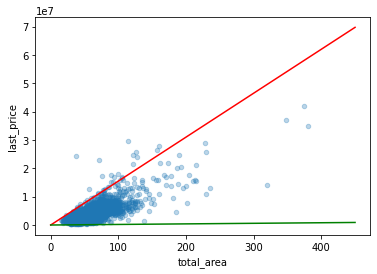

In [127]:
ax = data.query('locality_name != "Санкт-Петербург"').plot(kind='scatter', y='last_price', x='total_area',alpha=0.3)
x = np.linspace(0,450,100)
y = 155000 * x +1
plt.plot(x,y, '-r')
y = 2000 * x +1
plt.plot(x,y, '-g')
plt.show()

Можно заметить, что большинство заявлений находятся под линией `y = 155000 * x +1 `, соответственно будем считать аномалиями все значения, которые находятся выше линии.

In [128]:
display(data.query('(last_price > 155000 * total_area) and (locality_name != "Санкт-Петербург")'))
display(data.query('(last_price > 10 * 155000 * total_area) and (locality_name != "Санкт-Петербург")')['last_price'].count())
(data.query(
    '(last_price > 155000 * total_area) and (locality_name != "Санкт-Петербург")'
)['last_price'] / (
    155_000* data.query('(last_price > 155000 * total_area) and (locality_name != "Санкт-Петербург")'
                       )['total_area']
)).sort_values()
#names = data.query()
#    '(last_price > 155000 * total_area) and (locality_name != "Санкт-Петербург")'
#)['locality_name'].unique()
# data.query('locality_name.isin(@names)').groupby('locality_name')['last_price'].median()

total_images  last_price  total_area first_day_exposition  rooms  \
140               8    16912000  105.699997           2016-12-09      2   
499               9    12200000   77.699997           2017-11-28      2   
543              11    12790000   56.599998           2018-11-06      2   
777              16    18000000  100.000000           2015-12-09      3   
2414             20    29500000  115.000000           2017-07-21      3   
2454             12    28000000  160.000000           2016-10-24      3   
3773             20    15300000   92.199997           2019-03-14      3   
4151             17    17600000   89.500000           2014-12-09      2   
4400              4    12300000   78.650002           2017-09-09      3   
5343             19    13540000   85.500000           2016-01-20      3   
7295             14     7950000   50.000000           2017-07-06      1   
7996             17    16600000  106.000000           2017-12-02      4   
9915             20     9000000   54.000000           2017-09-28      1   
10460             3    26500000  157.300003           2018-07-05      5   
12466            11    15000000   89.599998           2017-01-31      3   
13295            20    13333000   84.000000           2017-02-07      2   
13600             8     9500000   60.299999           2018-07-04      2   
14185            10    17212500   76.500000           2015-09-03      2   
14900            20    25900000  125.599998           2018-08-14      2   
15037             9    23000000   71.000000           2017-05-15      2   
15578            20    16000000  101.900002           2018-01-08      2   
15582            20    16990000   93.000000           2017-11-08      3   
15975            20    21700000  121.000000           2018-03-15      3   
19852            13    24800000  121.300003           2017-06-16      2   
21238             1    24412900   38.119999           2018-06-27      1   
21646            20    12800000   79.800003           2019-03-23      3   
21934             3     7305000   43.299999           2018-10-09      1   
22217            12    11300000   70.000000           2018-07-23      2   
22474             7    24000000  128.000000           2015-07-24      4   
22941             8    10965000   69.300003           2019-01-10      1   
23316            16     6300000   39.400002           2016-05-16      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
140              2.70             3    48.400000      1          NaN  ...   
499              2.55             5    30.000000      5          NaN  ...   
543              3.50             3    29.400000      1         True  ...   
777              3.00             3    50.800000      2          NaN  ...   
2414             3.00             2    69.750000      2          NaN  ...   
2454             3.00             2    92.000000      2          NaN  ...   
3773             4.00             4    55.800000      4          NaN  ...   
4151             3.00             8    39.620000      7          NaN  ...   
4400             2.55             5    48.000000      1          NaN  ...   
5343             3.00             7    59.100000      5        False  ...   
7295             3.00             6    23.000000      4          NaN  ...   
7996             3.20             3    50.000000      3          NaN  ...   
9915             3.00             6    21.500000      3          NaN  ...   
10460            3.00             6    84.971167      5          NaN  ...   
12466            2.80             3    57.000000      3          NaN  ...   
13295            3.00             4    42.000000      3          NaN  ...   
13600            2.70            18    33.216786      2          NaN  ...   
14185            3.00             4    30.200000      2          NaN  ...   
14900            4.00             4    42.700000      4          NaN  ...   
15037            3.30             4    31.000000      2        Fal

0

4400     1.008962
7996     1.010347
499      1.012995
15578    1.013011
13600    1.016423
22941    1.020807
5343     1.021694
13295    1.024040
7295     1.025806
23316    1.031603
140      1.032258
21646    1.034845
22217    1.041475
3773     1.070604
9915     1.075269
12466    1.080069
10460    1.086890
21934    1.088430
2454     1.129032
15975    1.157025
777      1.161290
15582    1.178633
22474    1.209677
4151     1.268697
19852    1.319044
14900    1.330388
14185    1.451613
543      1.457882
2414     1.654979
15037    2.089959
21238    4.131757
dtype: float64

Хоть мы и получили список аномалий, но ни один из них, не является больше, чем на порядок, поэтому это вряд ли связано, с тем что кто-то случайно приписал лишний ноль.

Тоже самое, но для Питера.

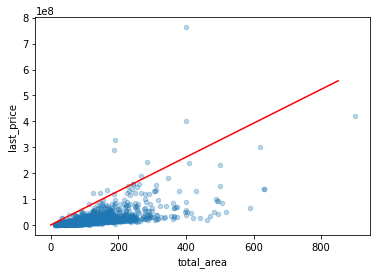

In [129]:
ax = data.query('locality_name == "Санкт-Петербург"').plot(kind='scatter', y='last_price', x='total_area',alpha=0.3)
x_ = np.linspace(0,850,100)
y = 655000 * x_ +1
plt.plot(x_,y, '-r')
#y = 2000 * x +1
#plt.plot(x_,y, '-g')
plt.show()

In [130]:
display(data.query('(last_price > 655000 * total_area) and (locality_name == "Санкт-Петербург")'))
display(data.query('(last_price > 10 * 655000 * total_area) and (locality_name == "Санкт-Петербург")')['last_price'].count())
(data.query(
    '(last_price > 655000 * total_area) and (locality_name == "Санкт-Петербург")'
)['last_price'] / (
    655_000* data.query('(last_price > 655000 * total_area) and (locality_name == "Санкт-Петербург")'
                       )['total_area']
)).sort_values()

total_images  last_price  total_area first_day_exposition  rooms  \
1436             19   330000000  190.000000           2018-04-04      3   
2536             16   159984000  242.399994           2015-08-27      4   
4859             16    28000000   33.000000           2019-04-29      1   
4996             20   124000000  124.500000           2017-10-12      4   
6462              2    82000000  114.000000           2015-12-17      3   
8322             20    39900000   55.299999           2017-10-26      1   
8900             13   190870000  268.000000           2016-03-25      3   
12971            19   763000000  400.000000           2017-09-30      7   
14706            15   401300000  401.000000           2016-02-20      5   
16461            17   245000000  285.700012           2017-04-10      6   
16647            15   122000000  145.000000           2017-04-25      3   
17172            14    28000000   33.000000           2019-04-30      1   
17912            17   135000000  166.000000           2019-02-07      3   
19155            20   160000000  243.000000           2018-11-12      5   
22831            18   289238400  187.500000           2019-03-19      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1436             3.50             7    95.000000      5          NaN  ...   
2536             3.85             9   131.000000      7          NaN  ...   
4859             3.50             5    15.965325      2          NaN  ...   
4996             3.00             4    67.200000      2        False  ...   
6462             2.55             5    78.500000      4          NaN  ...   
8322             3.05             6    35.000000      4          NaN  ...   
8900             2.80             8   132.000000      7          NaN  ...   
12971            2.60            10   250.000000     10          NaN  ...   
14706            2.55             9   204.000000      9        False  ...   
16461            3.35             7   182.800000      4          NaN  ...   
16647            3.30             6    36.000000      2          NaN  ...   
17172            3.50             5    15.965325      2          NaN  ...   
17912            3.30             7    52.000000      1          NaN  ...   
19155            2.55             5   145.000000      4          NaN  ...   
22831            3.37             6    63.700000      6          NaN  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
1436         1  Санкт-Петербург           23011.0               1197.0   
2536         0  Санкт-Петербург           21946.0               2242.0   
4859         1  Санкт-Петербург           23447.0               1376.0   
4996         1  Санкт-Петербург           20399.0               1722.0   
6462         0  Санкт-Петербург           22460.0               3400.0   
8322         4  Санкт-Петербург           25685.0               2136.0   
8900         1  Санкт-Петербург           32440.0               5297.0   
12971        2  Санкт-Петербург           25108.0               3956.0   
14706        3  Санкт-Петербург           21912.0               2389.0   
16461        1  Санкт-Петербург           33143.0               6235.0   
16647        1  Санкт-Петербург           33931.0               7023.0   
17172        1  Санкт-Петербург           23403.0               1462.0   
17912        0  Санкт-Петербург           32863.0               5955.0   
19155        1  Санкт-Петербург           22640.0                555.0   
22831        1  Санкт-Петербург           22494.0               1073.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
1436                 3          519.0                 3          285.0   
2536                 1          679.0                 1          227.0   
4859                 3          344.0                 3          119.0   
4996                 3          302.0                 3          172.0   
6462              

0

19155    1.005246
2536     1.007634
8900     1.087331
6462     1.098165
8322     1.101556
17912    1.241608
16647    1.284549
4859     1.295397
17172    1.295397
16461    1.309226
4996     1.520586
14706    1.527860
22831    2.355122
1436     2.651667
12971    2.912214
dtype: float64

Тоже самое, нет отклонений больше чем на 10. Тогда эти аномалии являются естественными, а не ошибками из-за лишнего нуля. Соответственно их можно отбросить.

Надо проверить, есть ли значения, которые слишком близко к нулю.

In [131]:
data[data['last_price'] == data['last_price'].min()]

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8793            2.75            25         32.0     25          NaN  ...   

      balcony    locality_name  airports_nearest  cityCenters_nearest  \
8793        1  Санкт-Петербург           36421.0               9176.0   

     parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
8793                1          805.0                 0         1344.0   

      days_exposition  sold  
8793                8  True  

[1 rows x 23 columns]

Если бы двух-комнатные квартиры в Питере стоили бы 12тыс, я бы давно переехал туда. Поэтому это скорее всего ошибка. Снова будем отдельно рассотревать заявления в Питере и не в нем.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тоже логично получается. 
</div 

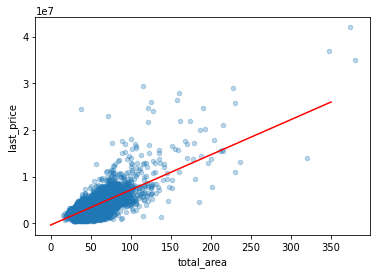

In [132]:
a, b = np.polyfit(
    x = data.query('locality_name != "Санкт-Петербург"')['total_area'], 
    y = data.query('locality_name != "Санкт-Петербург"')['last_price'], 
    deg = 1
)
ax = data.query('locality_name != "Санкт-Петербург"').plot(kind='scatter', y='last_price', x='total_area',alpha=0.3)
x = np.linspace(0,350,100)
plt.plot(x, a * x + b, '-r')
plt.show()

In [133]:
display(data.query('(last_price < @a * total_area + @b) and (locality_name != "Санкт-Петербург")'))
display((data.query(
    '(last_price < @a * total_area + @b) and (locality_name != "Санкт-Петербург")'
)['last_price'] / (
    a* data.query('(last_price < @a * total_area + @b) and (locality_name != "Санкт-Петербург")'
                       )['total_area'] + b
)).sort_values().head()
)
data.loc[(8 * data['last_price'] < a * data['total_area'] + b) & (data['locality_name'] != "Санкт-Петербург"),'last_price'] = 10 * data['last_price']

total_images  last_price  total_area first_day_exposition  rooms  \
33                8     4800000   73.000000           2018-10-15      4   
37               10     1990000   45.799999           2017-10-28      2   
47               17     3600000   56.099998           2018-10-18      3   
62                0     4800000   78.599998           2017-09-17      3   
68               11     4150000   74.000000           2017-08-04      3   
...             ...         ...         ...                  ...    ...   
23683            16     2100000   62.799999           2018-09-18      4   
23692             2     1350000   30.000000           2017-07-07      1   
23695            14     3100000   59.000000           2018-01-15      3   
23696            18     2500000   56.700001           2018-02-11      2   
23698             4     1350000   32.299999           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
33               2.55             9    51.600000      5          NaN  ...   
37               2.50             5    33.216786      1          NaN  ...   
47               3.00             4    42.500000      3          NaN  ...   
62               2.80             9    48.800000      5          NaN  ...   
68               2.80             5    44.000000      1          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23683            2.50             5    45.500000      3          NaN  ...   
23692            2.55             5    17.500000      4          NaN  ...   
23695            2.55             5    38.000000      4          NaN  ...   
23696            2.80             3    29.700000      1          NaN  ...   
23698            2.50             5    12.300000      1          NaN  ...   

       balcony                  locality_name  airports_nearest  \
33           1                        Колпино           26535.0   
37           0  городской посёлок Красный Бор           84869.0   
47           1                        Гатчина           84869.0   
62           2                      Сертолово           84869.0   
68           2            деревня Фёдоровское           84869.0   
...        ...                            ...               ...   
23683        1           посёлок Дзержинского           84869.0   
23692        1                         Тихвин           84869.0   
23695        1                          Тосно           84869.0   
23696        0               село Рождествено           84869.0   
23698        0            посёлок Новый Учхоз           84869.0   

       cityCenters_nearest parks_around3000  parks_nearest  ponds_around3000  \
33                 32321.0                0         3190.0                 0   
37                 13266.0                0         3190.0                 0   
47                 13266.0                0         3190.0                 3   
62                 13266.0                0         3190.0                 0   
68                 13266.0                0         3190.0                 0   
...                    ...              ...            ...               ...   
23683              13266.0                0         3190.0                 0   
23692              13266.0                0         3190.0                 0   
23695              13266.0                0         3190.0                 0   
23696              13266.0                0         3190.0                 0   
23698              13266.0                0         3190.0                 0   

       ponds_nearest  days_exposition   sold  
33            1344.0               92   True  
37            1344.0              196   True  
47             474.0              179   True  
62            1344.0                5   True  
68            1344.0              234   True  
...              ...              ...    ...  
23683         1344.0              228  False  
23692         1344.0              413  

14911    0.115606
4405     0.140096
23477    0.144374
11351    0.147868
9471     0.153809
dtype: float64

Тоже, но для Питера.

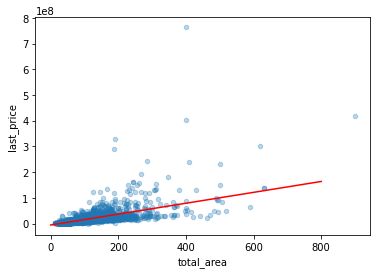

In [134]:
a, b = np.polyfit(
    x = data.query('locality_name == "Санкт-Петербург"')['total_area'], 
    y = data.query('locality_name == "Санкт-Петербург"')['last_price'], 
    deg = 1
)
ax = data.query('locality_name == "Санкт-Петербург"').plot(kind='scatter', y='last_price', x='total_area',alpha=0.3)
x = np.linspace(0,800,100)
plt.plot(x, a * x + b, '-r')
plt.show()

In [135]:
display(data.query('(last_price < @a * total_area + @b) and (locality_name == "Санкт-Петербург")'))
display((data.query(
    '(last_price < @a * total_area + @b) and (locality_name == "Санкт-Петербург")'
)['last_price'] / (
    a* data.query('(last_price < @a * total_area + @b) and (locality_name == "Санкт-Петербург")'
                       )['total_area'] + b
)).sort_values().head()
)
data.loc[(8 * data['last_price'] < a * data['total_area'] + b) & (data['locality_name'] == "Санкт-Петербург"),'last_price'] = 10 * data['last_price']


total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000  108.000000           2019-03-07      3   
2                10     5196000   56.000000           2015-08-20      2   
4                 2    10000000  100.000000           2018-06-19      2   
7                 5     7915000   71.599998           2019-04-18      2   
9                18     5400000   61.000000           2017-02-26      3   
...             ...         ...         ...                  ...    ...   
23680            14     5000000   59.000000           2019-04-04      3   
23684            20    21400000  145.000000           2018-11-02      4   
23688            19     9200000  101.000000           2019-04-01      3   
23691            11     9470000   72.900002           2016-10-13      2   
23694             9     9700000  133.809998           2017-03-21      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70            16    51.000000      8          NaN  ...   
2                2.55             5    34.300000      4          NaN  ...   
4                3.03            14    32.000000     13          NaN  ...   
7                2.75            24    33.216786     22          NaN  ...   
9                2.50             9    43.600000      7          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23680            2.50             5    52.000000      1          NaN  ...   
23684            3.00            26    71.400000     17          NaN  ...   
23688            3.05            15    63.000000     12          NaN  ...   
23691            2.75            25    40.300000      7          NaN  ...   
23694            3.70             5    73.300000      3          NaN  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
0            1  Санкт-Петербург           18863.0              16028.0   
2            0  Санкт-Петербург           21741.0              13933.0   
4            1  Санкт-Петербург           31856.0               8098.0   
7            2  Санкт-Петербург           23982.0              11634.0   
9            2  Санкт-Петербург           50898.0              15008.0   
...        ...              ...               ...                  ...   
23680        0  Санкт-Петербург           26835.0              11878.0   
23684        1  Санкт-Петербург           11827.0              11459.0   
23688        1  Санкт-Петербург           15632.0              14428.0   
23691        1  Санкт-Петербург           19424.0               4489.0   
23694        1  Санкт-Петербург           24665.0               4232.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0                    1          482.0                 2          755.0   
2                    1           90.0                 2          574.0   
4                    2          112.0                 1           48.0   
7                    0         3190.0                 0         1344.0   
9                    0         3190.0                 0         1344.0   
...                ...            ...               ...            ...   
23680                0         3190.0                 0         1344.0   
23684                0         3190.0                 0         1344.0   
23688                0         3190.0                 0         1344.0   
23691                0         3190.0                 1          806.0   
23694                1          796.0                 3          381.0   

       days_exposition   sold  
0                   58  False  
2                  558   True  
4                  121   True  
7                   16  False  
9                  289   True  
...                ...    ...  
23680               30  False  
23684              183  False  
23688               23   True  
23691              519   True  
23694              774  False  

[7397 rows x 23 co

8793     0.000699
21338    0.092535
19952    0.092746
17753    0.093798
23394    0.115656
dtype: float64

In [136]:
data.loc[8793, 'last_price']  = 100 * data.loc[8793, 'last_price']

Исправили ошибки, которые скорее всего связаны с человеческим фактором.

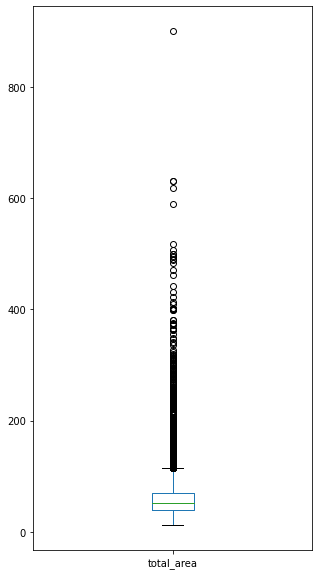

In [137]:
ax = data.plot(kind='box', y='total_area', figsize=(5,10))
plt.show()

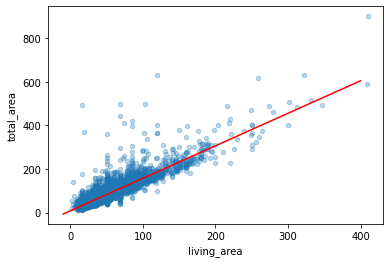

In [138]:
a, b = np.polyfit(
    x = data['living_area'], 
    y = data['total_area'], 
    deg = 1
)

ax = data.plot(kind='scatter', x='living_area', y='total_area',alpha=0.3)
x = np.linspace(-10,400,100)
plt.plot(x, a * x + b, '-r')
plt.show()

In [139]:
display(data.query('(total_area > @a * living_area + @b)').sort_values(by='total_area'))
display((data.query(
    '(total_area > @a * living_area + @b) '
)['total_area'] / (
    a* data.query('(total_area > @a * living_area + @b) '
                       )['living_area'] + b
)).sort_values().tail()
)

total_images  last_price  total_area first_day_exposition  rooms  \
17582            11     2680000   22.000000           2018-08-11      0   
21758             0     2330000   23.000000           2018-01-01      0   
1947             11     1400000   24.000000           2018-06-15      1   
5531              7     1800000   26.000000           2015-04-07      1   
7312              8     3400000   27.000000           2018-02-21      2   
...             ...         ...         ...                  ...    ...   
4237              1    50000000  517.000000           2017-10-14      7   
15651            20   300000000  618.000000           2017-12-18      7   
3117             19   140000000  631.000000           2019-03-30      7   
12859            20   140000000  631.200012           2019-04-09      7   
19540             8   420000000  900.000000           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
17582            2.75            25     5.000000      8          NaN  ...   
21758            2.75            24     2.000000     22          NaN  ...   
1947             2.55             5    10.000000      5          NaN  ...   
5531             2.55             5    10.000000      1        False  ...   
7312             2.50            15     9.000000      4          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
4237             3.00             4   332.000000      3          NaN  ...   
15651            3.40             7   258.000000      5          NaN  ...   
3117             2.55             5   119.474087      5          NaN  ...   
12859            3.90             4   322.300000      4          NaN  ...   
19540            2.80            25   409.700000     25          NaN  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
17582        2  Санкт-Петербург           22735.0              11618.0   
21758        2           Мурино           51553.0              21888.0   
1947         1         Коммунар           84869.0              13266.0   
5531         0           Выборг           84869.0              13266.0   
7312         1  Санкт-Петербург           50246.0              16444.0   
...        ...              ...               ...                  ...   
4237         1  Санкт-Петербург           22835.0               1847.0   
15651        1  Санкт-Петербург           32440.0               5297.0   
3117         1  Санкт-Петербург           25707.0               4972.0   
12859        1  Санкт-Петербург           25707.0               4972.0   
19540        0  Санкт-Петербург           30706.0               7877.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
17582                1          835.0                 1          652.0   
21758                1          454.0                 3          133.0   
1947                 0         3190.0                 0         1344.0   
5531                 0         3190.0                 0         1344.0   
7312                 1          617.0                 0         1344.0   
...                ...            ...               ...            ...   
4237                 2          477.0                 2          540.0   
15651                0         3190.0                 2          198.0   
3117                 0         3190.0                 2          210.0   
12859                0         3190.0                 2          210.0   
19540                0         3190.0                 2          318.0   

       days_exposition   sold  
17582               70   True  
21758               66   True  
1947                 3   True  
5531               708   True  
7312               437  False  
...                ...    ...  
4237               567  False  
15651              111   True  
3117                35  False  
12859               25  False  
19540              106   True  

[10409 rows x 23 c

15016     4.550055
21276     5.431687
23574    10.280784
19392    10.347073
9826     15.052141
dtype: float64

В данной выборке есть три серьезные аномалии.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Не перестаю восторгаться твоим подходом. 
</div 

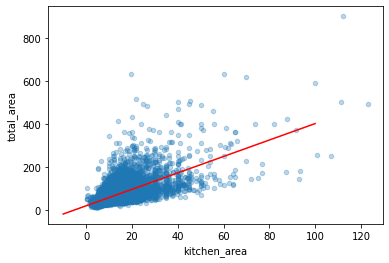

In [140]:
a, b = np.polyfit(
    x = data['kitchen_area'], 
    y = data['total_area'], 
    deg = 1
)

ax = data.plot(kind='scatter', x='kitchen_area', y='total_area',alpha=0.3)
x = np.linspace(-10,100,100)
plt.plot(x, a * x + b, '-r')
plt.show()

In [141]:
display(data.query('(total_area > @a * kitchen_area + @b)').sort_values(by='total_area'))
display((data.query(
    '(total_area > @a * kitchen_area + @b) '
)['total_area'] / (
    a* data.query('(total_area > @a * kitchen_area + @b) '
                       )['kitchen_area'] + b
)).sort_values().tail()
)

total_images  last_price  total_area first_day_exposition  rooms  \
20217             7     4250000   28.500000           2019-05-01      1   
11033             6     5350000   32.000000           2016-04-20      1   
17834             5     2940000   34.700001           2017-10-09      1   
21889             9     2900000   38.000000           2016-06-07      2   
1853             10     3100000   38.299999           2017-12-12      2   
...             ...         ...         ...                  ...    ...   
5358             20    65000000  590.000000           2019-02-14     15   
15651            20   300000000  618.000000           2017-12-18      7   
3117             19   140000000  631.000000           2019-03-30      7   
12859            20   140000000  631.200012           2019-04-09      7   
19540             8   420000000  900.000000           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
20217            2.80            14    19.500000     10          NaN  ...   
11033            2.60            14    16.000000     10          NaN  ...   
17834            2.66            26    15.500000     14          NaN  ...   
21889            2.70             2    28.000000      1          NaN  ...   
1853             2.70             2    27.500000      1          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
5358             3.50             6   409.000000      3          NaN  ...   
15651            3.40             7   258.000000      5          NaN  ...   
3117             2.55             5   119.474087      5          NaN  ...   
12859            3.90             4   322.300000      4          NaN  ...   
19540            2.80            25   409.700000     25          NaN  ...   

       balcony     locality_name  airports_nearest  cityCenters_nearest  \
20217        1   Санкт-Петербург           37199.0              12721.0   
11033        0   Санкт-Петербург           19008.0               3953.0   
17834        1            Мурино           51553.0              21888.0   
21889        0  посёлок Песочный           56095.0              25867.0   
1853         0  посёлок Песочный           56095.0              25867.0   
...        ...               ...               ...                  ...   
5358         0   Санкт-Петербург           24447.0               4666.0   
15651        1   Санкт-Петербург           32440.0               5297.0   
3117         1   Санкт-Петербург           25707.0               4972.0   
12859        1   Санкт-Петербург           25707.0               4972.0   
19540        0   Санкт-Петербург           30706.0               7877.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
20217                0         3190.0                 0         1344.0   
11033                0         3190.0                 1           69.0   
17834                1          454.0                 3          133.0   
21889                0         3190.0                 0         1344.0   
1853                 0         3190.0                 0         1344.0   
...                ...            ...               ...            ...   
5358                 1          767.0                 0         1344.0   
15651                0         3190.0                 2          198.0   
3117                 0         3190.0                 2          210.0   
12859                0         3190.0                 2          210.0   
19540                0         3190.0                 2          318.0   

       days_exposition   sold  
20217                3  False  
11033              210   True  
17834              318   True  
21889               45   True  
1853                14   True  
...                ...    ...  
5358                14   True  
15651              111   True  
3117                35  False  
12859               25  False  
19540              106   True  

[10549

3365     5.017716
7857     5.083138
14991    5.646145
20820    5.861391
12859    6.671367
dtype: float32

Потенциальные ошибки были исправлены, поэтому дальше можно будет отбрасывать данные-выбрасы.

In [142]:
drop_out_of_whiskers(data,'last_price', 'locality_name == "Санкт-Петербург"' )
drop_out_of_whiskers(data,'last_price', 'locality_name != "Санкт-Петербург"' )

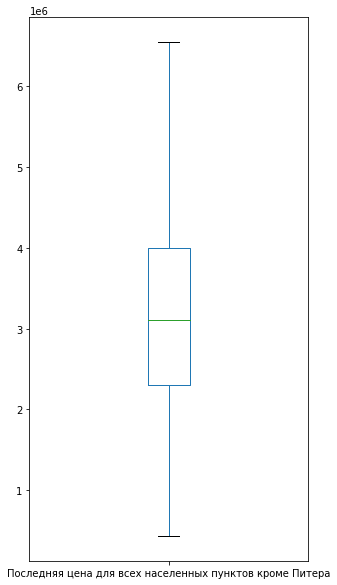

In [143]:
ax = data.query('locality_name != "Санкт-Петербург"').plot(kind='box', y='last_price', figsize=(5,10), label='Последняя цена для всех населенных пунктов кроме Питера')
plt.show()

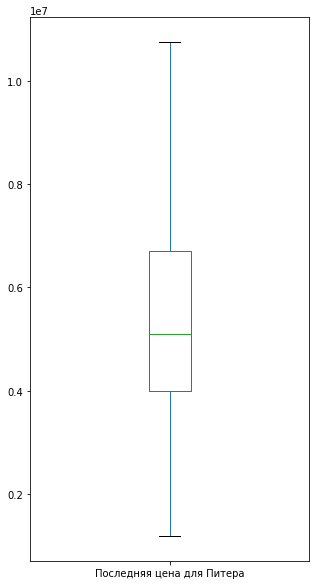

In [144]:
ax = data.query('locality_name == "Санкт-Петербург"').plot(kind='box', y='last_price', figsize=(5,10), label='Последняя цена для Питера')
plt.show()

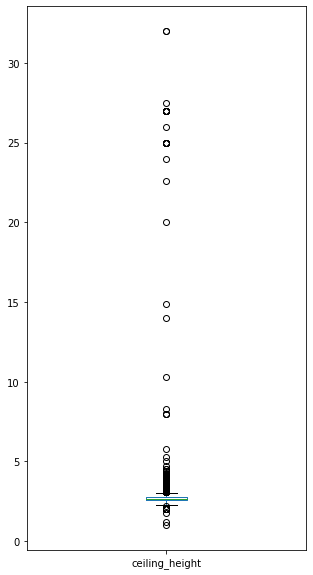

In [145]:
ax = data.plot(kind='box', y='ceiling_height', figsize=(5,10))
plt.show()

Рекомендованная высота потолков 2.4 - 3.0 м, но можно найти пентхаусы с вытокой потолков, которая достигает 10 м, хотя она по прежнему не превышает 20 м.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут хорошо рассмотренно. 
</div 

Хотелось бы проверить наименьшее значение из высоты потолков.

In [146]:
data[data['ceiling_height']==data['ceiling_height'].min()]

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000        55.0           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
22590             1.0            12         32.4      7          NaN  ...   

       balcony    locality_name  airports_nearest  cityCenters_nearest  \
22590        1  Санкт-Петербург           33053.0              14217.0   

      parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
22590                2          293.0                 2          289.0   

       days_exposition  sold  
22590               13  True  

[1 rows x 23 columns]

1 метр, можно предположить бы что это просто ошиблись в высоте потолков у пентхауса, но общая площадь всего лишь 55 квадратных метров. Так, что это врядли ошибка связанная с порядком.

In [147]:
drop_out_of_whiskers(data, 'ceiling_height')

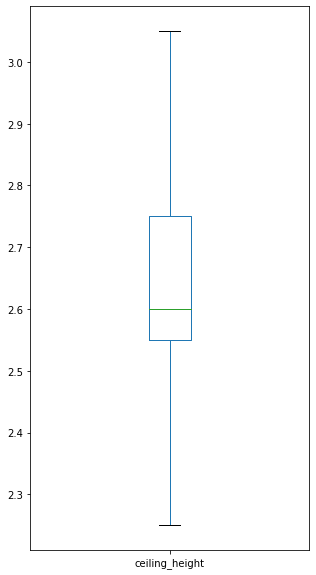

In [148]:
ax = data.plot(kind='box', y='ceiling_height', figsize=(5,10))
plt.show()

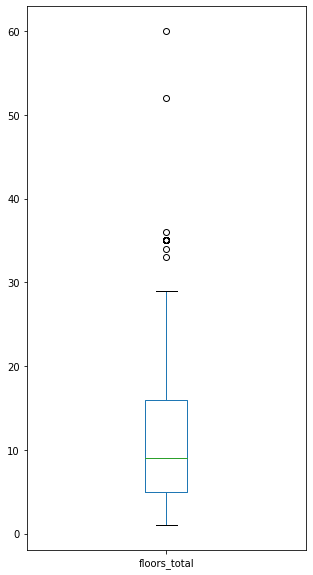

In [149]:
ax = data.plot(kind='box', y='floors_total', figsize=(5,10))
plt.show()

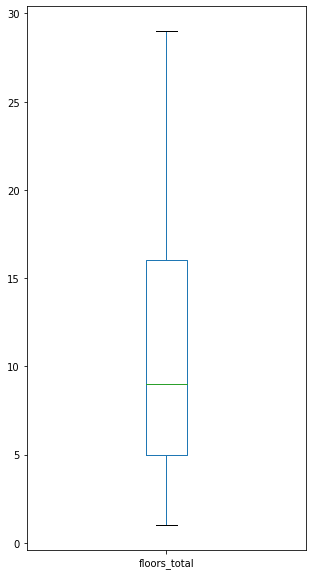

In [150]:
drop_out_of_whiskers(data,'floors_total')
ax = data.plot(kind='box', y='floors_total', figsize=(5,10))
plt.show()

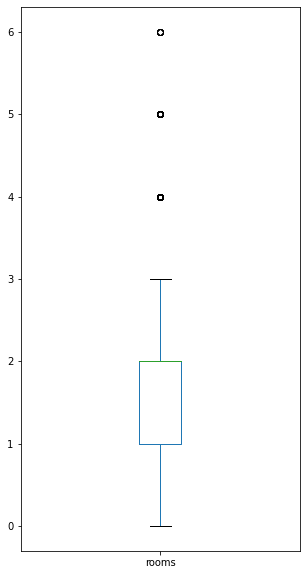

In [151]:
ax = data.plot(kind='box', y='rooms', figsize=(5,10))
plt.show()

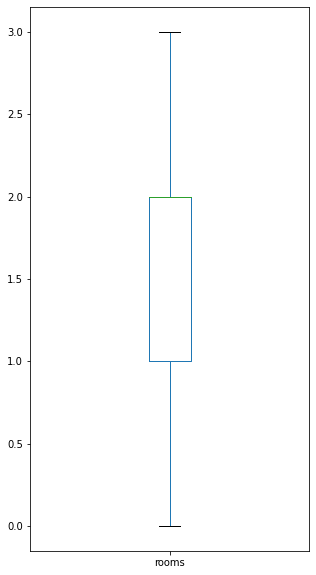

In [152]:
drop_out_of_whiskers(data,'rooms')
ax = data.plot(kind='box', y='rooms', figsize=(5,10))
plt.show()

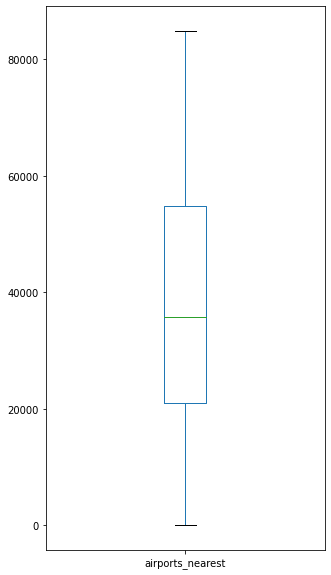

In [153]:
ax = data.plot(kind='box', y='airports_nearest', figsize=(5,10))
plt.show()

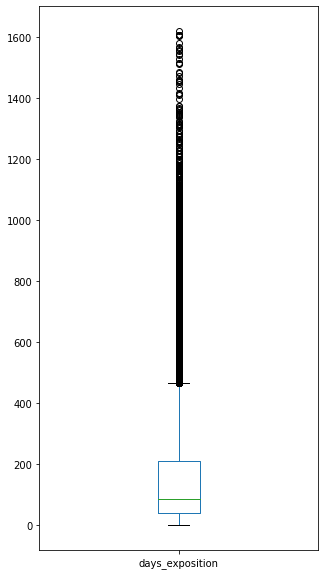

In [154]:
ax = data.plot(kind='box', y='days_exposition', figsize=(5,10))
plt.show()

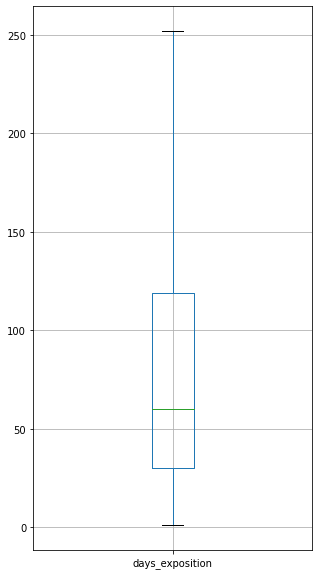

In [155]:
drop_out_of_whiskers(data,'days_exposition')
ax = data.plot(kind='box', y='days_exposition', figsize=(5,10),grid=True)
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут бы тоже промежуточный вывод увидеть. 
</div 

<div class="alert alert-block alert-info">
<b>💾 Summary:</b> 

Можно заметить то, что на большинстве диаграмм размаха распределения смещены вправо. Также после нормализации параметров данных было потеряно около половины строк.
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Соглашусь.

## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [156]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [157]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

               locality_name  airports_nearest  cityCenters_nearest  \
1             посёлок Шушары           12817.0              18603.0   
4            Санкт-Петербург           31856.0               8098.0   
5  городской посёлок Янино-1           84869.0              13266.0   
6          посёлок Парголово           52996.0              19143.0   
7            Санкт-Петербург           23982.0              11634.0   

   parks_around3000 parks_nearest  ponds_around3000  ponds_nearest  \
1                 0        3190.0                 0         1344.0   
4                 2         112.0                 1           48.0   
5                 0        3190.0                 0         1344.0   
6                 0        3190.0                 0         1344.0   
7                 0        3190.0                 0         1344.0   

   days_exposition   sold  price_per_square_meter  
1               81   True            82920.788947  
4              121   True           100000.000000  
5               55   True            95065.790667  
6              155   True            99195.712485  
7               16  False           110544.695093  

[5 rows x 24 columns]

### День публикации объявления

In [158]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_of_week

In [159]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
1           12817.0              18603.0                 0         3190.0   
4           31856.0               8098.0                 2          112.0   
5           84869.0              13266.0                 0         3190.0   
6           52996.0              19143.0                 0         3190.0   
7           23982.0              11634.0                 0         3190.0   

  ponds_around3000  ponds_nearest  days_exposition   sold  \
1                0         1344.0               81   True   
4                1           48.0              121   True   
5                0         1344.0               55   True   
6                0         1344.0              155   True   
7                0         1344.0               16  False   

   price_per_square_meter  day_of_week_exposition  
1            82920.788947                       1  
4           100000.000000                       1  
5            95065.790667                       0  
6            99195.712485                       3  
7           110544.695093                       3  

[5 rows x 25 columns]

### Месяц публикации объявления

In [160]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [161]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1              18603.0                 0         3190.0                 0   
4               8098.0                 2          112.0                 1   
5              13266.0                 0         3190.0                 0   
6              19143.0                 0         3190.0                 0   
7              11634.0                 0         3190.0                 0   

  ponds_nearest  days_exposition   sold  price_per_square_meter  \
1        1344.0               81   True            82920.788947   
4          48.0              121   True           100000.000000   
5        1344.0               55   True            95065.790667   
6        1344.0              155   True            99195.712485   
7        1344.0               16  False           110544.695093   

   day_of_week_exposition  month_exposition  
1                       1                12  
4                       1                 6  
5                       0                 9  
6                       3                11  
7                       3                 4  

[5 rows x 26 columns]

### Год публикации объявления

In [162]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [163]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
1                 0         3190.0                 0         1344.0   
4                 2          112.0                 1           48.0   
5                 0         3190.0                 0         1344.0   
6                 0         3190.0                 0         1344.0   
7                 0         3190.0                 0         1344.0   

  days_exposition   sold  price_per_square_meter  day_of_week_exposition  \
1              81   True            82920.788947                       1   
4             121   True           100000.000000                       1   
5              55   True            95065.790667                       0   
6             155   True            99195.712485                       3   
7              16  False           110544.695093                       3   

   month_exposition  year_exposition  
1                12             2018  
4                 6             2018  
5                 9             2018  
6                11             2017  
7                 4             2019  

[5 rows x 27 columns]

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тобой верно выделяются временные отрезки из даты. 
</div 

### Тип этажа квартиры 

In [164]:
data['type_of_floor'] = data.apply(
    lambda row: 'первый' if row['floor']==1 else 'последний' if row['floor'] == row['floors_total'] else 'другой' , axis=1
)
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition   sold  \
1         3190.0                 0         1344.0               81   True   
4          112.0                 1           48.0              121   True   
5         3190.0                 0         1344.0               55   True   
6         3190.0                 0         1344.0              155   True   
7         3190.0                 0         1344.0               16  False   

   price_per_square_meter  day_of_week_exposition  month_exposition  \
1            82920.788947                       1                12   
4           100000.000000                       1                 6   
5            95065.790667                       0                 9   
6            99195.712485                       3                11   
7           110544.695093                       3                 4   

   year_exposition  type_of_floor  
1             2018         первый  
4             2018         другой  
5             2018         другой  
6             2017         другой  
7             2019         другой  

[5 rows x 28 columns]

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Категоризация сделана максимально понятным и доступным способом. 
</div 

### Расстояние в км до центра города

In [165]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000).astype(np.uint8)
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
1             7     3350000   40.400002           2018-12-04      1   
4             2    10000000  100.000000           2018-06-19      2   
5            10     2890000   30.400000           2018-09-10      1   
6             6     3700000   37.299999           2017-11-02      1   
7             5     7915000   71.599998           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1            2.75            11    18.600000      1          NaN  ...   
4            3.03            14    32.000000     13          NaN  ...   
5            2.65            12    14.400000      5          NaN  ...   
6            2.66            26    10.600000      6          NaN  ...   
7            2.75            24    33.216786     22          NaN  ...   

   ponds_around3000  ponds_nearest  days_exposition   sold  \
1                 0         1344.0               81   True   
4                 1           48.0              121   True   
5                 0         1344.0               55   True   
6                 0         1344.0              155   True   
7                 0         1344.0               16  False   

  price_per_square_meter  day_of_week_exposition  month_exposition  \
1           82920.788947                       1                12   
4          100000.000000                       1                 6   
5           95065.790667                       0                 9   
6           99195.712485                       3                11   
7          110544.695093                       3                 4   

   year_exposition  type_of_floor  cityCenters_nearest_km  
1             2018         первый                      19  
4             2018         другой                       8  
5             2018         другой                      13  
6             2017         другой                      19  
7             2019         другой                      12  

[5 rows x 29 columns]

## Проведите исследовательский анализ данных

In [166]:
data['locality_name'].value_counts().head(5)

Санкт-Петербург    9727
Мурино              485
посёлок Шушары      345
Всеволожск          266
Колпино             251
Name: locality_name, dtype: int64

Важно отметить, что данная база данных является срезом для Санкт-Петербурга и других населённых пункутов близ него.

### Исследовательский анализ общей площади квартиры.

`total_area` — общая площадь квартиры в квадратных метрах (м²)
Стоит отметить, хотя общая площадь должна быть суммой площади кухни, жилой, коридоров и балконов, но ещё до каких либо изменений данных в базе находились строки, где сумма площади только кухни и жилой превышало общую.

Для того, чтобы продемонстрировать, что это было так изначально, а не где-то произошли ошибочные изменения в данных на этапе подготовки, лучше будет заново экспортировать базу данных и обозначить её как изначальную

In [167]:
try:
    data_original = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    pass

In [168]:
data_original.query('total_area < kitchen_area + living_area')['total_area'].count()

64

In [169]:
data_original.query('total_area == kitchen_area + living_area')['total_area'].count()

70

Также можно смело предположить, что в большинстве расчётов учитывается площадь коридоров, потому что из десятки тысяч заявлений, только 70 имеют общую площадь равную сумме кухне и жилой.

In [170]:
data['total_area'].describe()

count    15354.000000
mean        49.714417
std         15.512181
min         12.000000
25%         37.700001
50%         46.000000
75%         59.700001
max        138.000000
Name: total_area, dtype: float64

После устранений аномалий были получены следующие метрики:

- средняя площадь 49 квадратных метров.
- медиана 46 квадратных метров.

Что более или менее соответствует действительности, согласно артиклю от "Делового Петербурга" - "По подсчетам аналитиков Единого реестра застройщиков, за 5 последних лет средняя площадь квартир в Петербурге выросла с 39 до 45 м2."

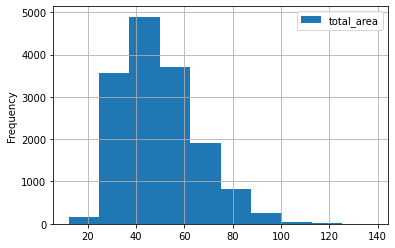

In [171]:
ax = data.plot(kind='hist', y='total_area', grid=True)
plt.show()

Гистограмма распределения жилой площади соответствует Пуассоновскому распределению.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С выводом согласен. Все так и есть. 
</div 

### Исследовательский анализ жилой площади квартиры.

`living_area` — жилая площадь в квадратных метрах (м²). Согласно приказу Минземстроя России № 37 от 4 августа 1998 года, жилая площадь – суммарное значение квадратуры всех комнат, пригодных для жизни. Хотя некоторые люди иногда включают кухню в этот расчёт.

In [172]:
data_original.query('living_area < kitchen_area')['living_area'].count()

355

Но в базе данных есть по крайней мере 355 заявлений, где жилая площадь меньше площади кухни, что не имело бы смысла во втором случае. Поэтому будем считать, что они кухня не является частью жилой.

In [173]:
data['living_area'].describe()

count    15354.000000
mean        28.254572
std         11.287472
min          2.000000
25%         18.000000
50%         28.000000
75%         35.000000
max        100.000000
Name: living_area, dtype: float64

После устранений аномалий были получены следующие метрики:

- среднее 28.2 квадратных метров;
- медианное 28 квадратных метров.

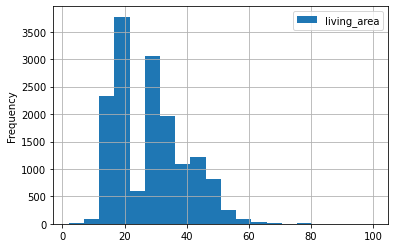

In [174]:
ax =data.plot(kind='hist', y='living_area', grid=True, bins=20)
plt.show()

Можно заметить, что гистограмма имеет несколько пиков:
- около 20;
- около 30;
- около 40.
Скорее всего это связано, с разным количеством комнат.

In [175]:
data['rooms'].value_counts()

1    6303
2    5637
3    3250
0     164
Name: rooms, dtype: int64

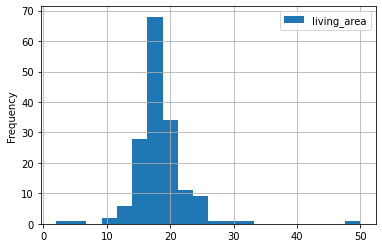

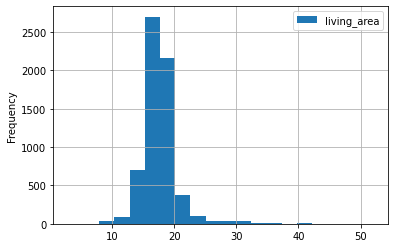

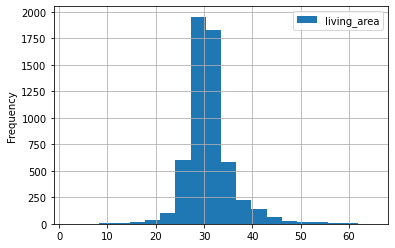

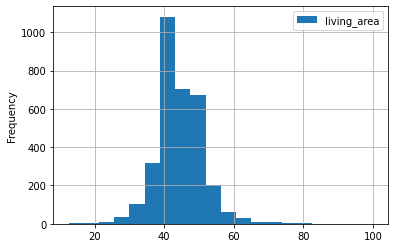

In [176]:
ax = data.groupby('rooms').plot(kind='hist', y='living_area', bins= 20, legend=True, grid=True)
plt.show()

Гистограммы распределения жилой площади сгруппированных по комнатам более или менее соответствуют распределению Пуассона. Также  Однокомнатные квартиры имеют пик около 20, двухкомнатные около 30 и трехкомнатные около 40. Что объясняет несколько пиков у изначального графика.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь все отлично. 
</div 

In [177]:
data.groupby('rooms')['living_area'].describe()

count       mean       std   min        25%   50%        75%    max
rooms                                                                      
0       164.0  18.369756  4.399984   2.0  16.700000  18.0  19.300000   50.0
1      6303.0  17.631906  2.986573   3.0  15.965325  17.3  18.700000   52.0
2      5637.0  31.087493  4.642939   2.0  28.100000  30.5  33.216786   65.0
3      3250.0  44.441217  6.821680  12.5  40.000000  43.5  48.800000  100.0

### Исследовательский анализ площади кухни у квартиры.

`kitchen_area` — площадь кухни в квадратных метрах (м²)

In [178]:
data['kitchen_area'].describe()

count    15354.000000
mean         9.213434
std          3.359776
min          1.300000
25%          7.000000
50%          8.686320
75%         10.738955
max         50.000000
Name: kitchen_area, dtype: float64

После устранений аномалий были получены следующие метрики:

- средняя 9 квадратных метров;
- медианная 8.7 квадратных метров.

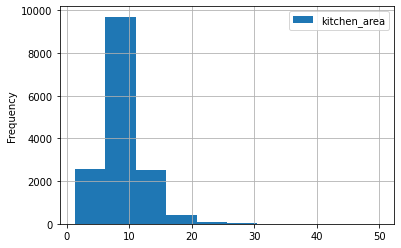

In [179]:
ax = data.plot(kind='hist', y='kitchen_area', grid=True)
plt.show()

Гистограмма распределения площади кухни соответствует Пуассоновскому распределению.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И тут шикарно. 
</div 

### Исследовательский анализ цены квартиры.

`last_price` — цена на момент снятия с публикации

In [180]:
data['last_price'].describe()

count    1.535400e+04
mean     4.503993e+06
std      1.897290e+06
min      4.300000e+05
25%      3.220000e+06
50%      4.200000e+06
75%      5.500000e+06
max      1.075000e+07
Name: last_price, dtype: float64

После устранений аномалий были получены следующие метрики:
- средняя цена 4.5 млн рублей;
- медианная цена 4.2 млн рублей.

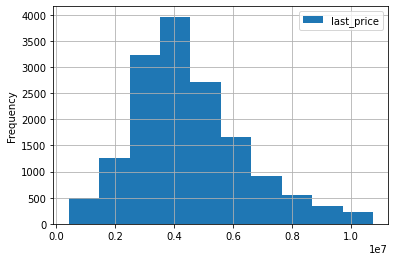

In [181]:
ax = data.plot(kind='hist', y='last_price', grid=True)
plt.show()

Гистограмма распределения площади кухни соответствует Пуассоновскому распределению.

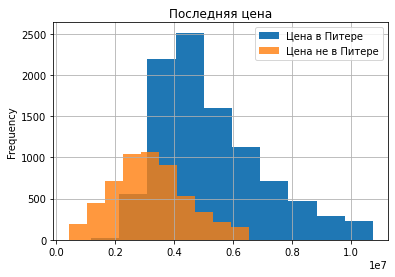

In [182]:
ax = data.query('locality_name == "Санкт-Петербург"').plot(kind='hist', y='last_price', grid=True)
data.query('locality_name != "Санкт-Петербург"').plot(kind='hist', y='last_price', grid=True, ax=ax, title='Последняя цена', alpha=0.8)
ax.legend(['Цена в Питере', 'Цена не в Питере'])
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут классно. 
</div 

In [183]:
data.query('locality_name == "Санкт-Петербург"')['last_price'].describe()

count    9.727000e+03
mean     5.268974e+06
std      1.774632e+06
min      1.190000e+06
25%      3.950000e+06
50%      4.870000e+06
75%      6.300000e+06
max      1.075000e+07
Name: last_price, dtype: float64

In [184]:
data.query('locality_name != "Санкт-Петербург"')['last_price'].describe()

count    5.627000e+03
mean     3.181623e+06
std      1.272093e+06
min      4.300000e+05
25%      2.300000e+06
50%      3.100000e+06
75%      3.990000e+06
max      6.550000e+06
Name: last_price, dtype: float64

Цены не в Питере почти в полтора раза дешевле, чем в Питере.

### Исследовательский анализ количества комнат квартиры.

`rooms` — число комнат

In [185]:
data['rooms'].describe()

count    15354.000000
mean         1.779797
std          0.785149
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: rooms, dtype: float64

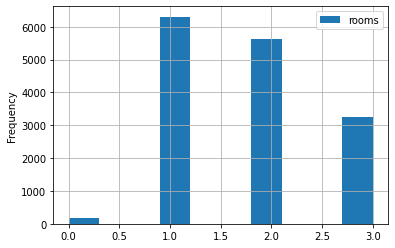

In [186]:
ax = data.plot(kind='hist', y='rooms', grid=True)
plt.show()

In [187]:
data['rooms'].value_counts()

1    6303
2    5637
3    3250
0     164
Name: rooms, dtype: int64

Может ли вообще быть такое, что количество комнат будет нулевое? Согласно `ЖК РФ Статья 16. Виды жилых помещений` 
> 4. Комнатой признается часть жилого дома или квартиры, предназначенная для использования в качестве места непосредственного проживания граждан в жилом доме или квартире.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И вновь знание предметной области. 
</div 

Соответственно если в помещении никто не проживает, оно фактически не считается комнатой.

In [188]:
print('Количество заявлений, где количество комнат нулевое',(data['rooms']==0).sum())
print('Количество заявлений, где количество комнат нулевое и заявления является студией', data[data['rooms']==0].studio.sum())

Количество заявлений, где количество комнат нулевое 164
Количество заявлений, где количество комнат нулевое и заявления является студией 113


Из 164 нулевых-комнатных заявлений 113 являются студиями, что объясняет почему они не имеют комнат, но что насчёт остальных заявлений.

In [189]:
data[(data['rooms']==0)&(~data.studio)].open_plan.mean()

1.0

Получаются, что все они имеют открытые планировки.

### Исследовательский анализ высоты потолков квартиры.

`ceiling_height` — высота потолков (м)

In [190]:
data['ceiling_height'].describe()

count    15354.000000
mean         2.650166
std          0.135821
min          2.250000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.050000
Name: ceiling_height, dtype: float64

После устранений аномалий были получены следующие метрики:

- средняя высота 2.65 метров;
- медианная высота 2.6 метров.

Данные проходят проверки действительности, поскольку рекомендованной высотой является 2.4м-3м.

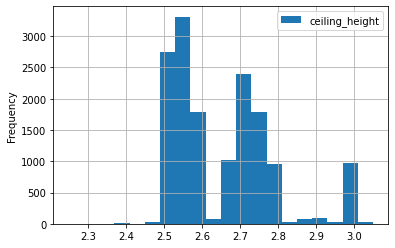

In [191]:
ax = data.plot(kind='hist', y='ceiling_height', grid=True, bins=20)
plt.show()

Можно заметить, что гистограмма имеет 3 отчетливых пика, это связано с тем, что высота потолка не подчиняется случайному распределению [согласно статье "Делового Петербурга"](https://www.dp.ru/a/2019/07/21/Vishe_stropila_stroiteli) есть 3 класса жилья:
- С класс, эконом, высота потолков 2.6 метров;
- В класс, бизнес-лайт, высота потолков 2.75 метров;
- А класс, элита, высота потолков 3 метров.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Потолки более 3 метров еще могут говорить о наличии дореволюционной застройки. 
</div 

<div class="alert alert-block alert-info">
<b>💾 Thinking:</b> 

Возможно, к сожалению моих знаний недостаточно, чтобы проверить эту гипотезу. Скорее всего такие данные просто являются аномалиями.
</div>

In [192]:
print('Медианная цена класс С -', data.query('2.4 <= ceiling_height <= 2.7')['last_price'].median())
print('Медианная цена класс В -', data.query('2.6 <= ceiling_height < 2.9')['last_price'].median())
print('Медианная цена класс А -', data.query('2.9 <= ceiling_height ')['last_price'].median())

Медианная цена класс С - 4000000.0
Медианная цена класс В - 4500000.0
Медианная цена класс А - 5205000.0


### Исследовательский анализ типа этажа квартиры.

`type_of_floor` -  тип этажа квартиры («первый», «последний», «другой»)

In [193]:
data['type_of_floor'] = data['type_of_floor'].astype('category')

In [194]:
data['type_of_floor'].value_counts()

другой       11534
последний     2022
первый        1798
Name: type_of_floor, dtype: int64

In [195]:
data['type_of_floor'].describe()

count      15354
unique         3
top       другой
freq       11534
Name: type_of_floor, dtype: object

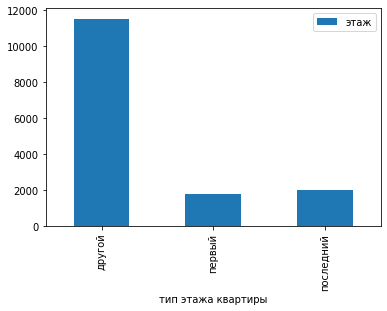

In [196]:
ax = data.pivot_table(values='floor', index='type_of_floor', aggfunc=len).plot(kind='bar', xlabel='тип этажа квартиры')
ax.legend(['этаж'])
plt.show()

Результаты не удивительны, владельцы квартир как на первом, так и на последнем или любом этаже одинаково хотят продать свои квартиры. Поэтому количество заявлений с первого и последнего этаже приблизительно одинаково, в то время как намного больше их вместе взятых "другие" 

### Исследовательский анализ общего количества этажей в доме.

`floors_total` — всего этажей в доме

In [197]:
data['floors_total'].describe()

count    15354.000000
mean        11.167123
std          6.594157
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

После устранений аномалий были получены следующие метрики:

- среднее 11;
- медианное 9.

In [198]:
len(data['floors_total'].unique())

29

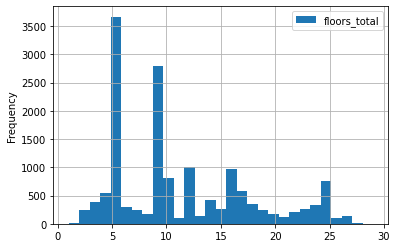

In [199]:
ax = data.plot(kind='hist', y='floors_total', grid=True, bins=29)
plt.show()

Гистограмма общего количества этажей в доме не подчиняется Пуассоновскому распределению. Это связано с тем, что общее количество этажей не является случайной независимой величиной. Стандарт менялся с течением времени. Например согласно [артиклю из "Делового Петербурга"](https://www.dp.ru/a/2019/06/04/Padenie_jetazhej) пределеный этаж в Лененградской области в 2018 году понизился до 12 этажей. Можно заметить его как один из пиков в гистограмме.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь здорово. Идем дальше. 
</div 

### Исследовательский анализ расстояния до центра города в метрах.

`cityCenters_nearest` — расстояние до центра города (м)

In [200]:
data['cityCenters_nearest'].describe()

count    15354.000000
mean     15090.419922
std       7047.670898
min        399.000000
25%      12154.250000
50%      13266.000000
75%      16094.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

После устранений аномалий были получены следующие метрики:
- среднее расстояние 15км;
- медианное расстояние 13км.

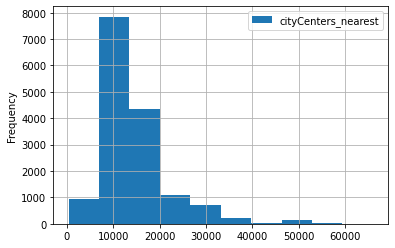

In [201]:
ax = data.plot(kind='hist', y='cityCenters_nearest', grid=True)
plt.show()

Из пункта о заполнении пропусков в столбце расстояния до цетра города, расстояние до города считается как расстояние до Петербурга.

### Исследовательский анализ расстояния до ближайшего аэропорта.

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

In [202]:
data['airports_nearest'].describe()

count    15354.000000
mean     42521.976562
std      25824.453125
min          0.000000
25%      20792.500000
50%      35651.500000
75%      53129.250000
max      84869.000000
Name: airports_nearest, dtype: float64

После устранений аномалий были получены следующие метрики:
- среднее расстояние 42км;
- медианное расстояние 35км.

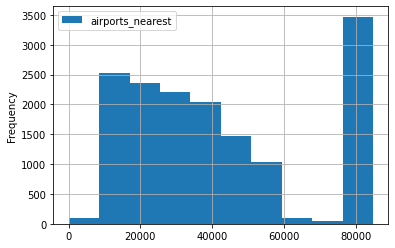

In [203]:
ax = data.plot(kind='hist', y='airports_nearest', grid=True)
plt.show()

In [204]:
data_original['airports_nearest'].isna().sum()

5542

Огромный скачок на 80000м объясняется тем, что в изначальных данных было 5000+ строчек с пустым расстоянием до ближайшего аэропорта, соответственно они были заполнены просто максимальным расстоянием до ближайшего аэропорта, но в реальности это длинный хвост условно бесконечного пуассоновского распределения, где х > 80000 - сжатый до столбца.

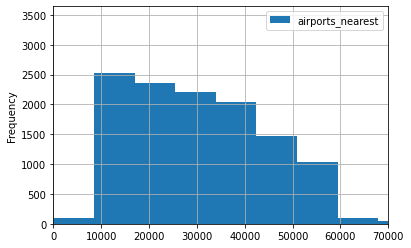

In [205]:
ax = data.plot(kind='hist', y='airports_nearest', grid=True, xlim=(0,70000))
plt.show()

### Исследовательский анализ расстояния до ближайшего парка.

`parks_nearest` — расстояние до ближайшего парка (м)

In [206]:
data['parks_nearest'].describe()

count    15354.000000
mean      2248.297363
std       1300.224365
min          1.000000
25%        554.250000
50%       3190.000000
75%       3190.000000
max       3190.000000
Name: parks_nearest, dtype: float64

После устранений аномалий были получены следующие метрики:
- среднее расстояние 2247м,
- медианное расстояние 3190м.

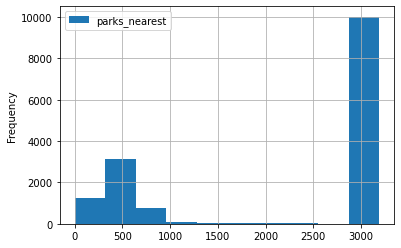

In [207]:
ax = data.plot(kind='hist', y='parks_nearest', grid=True)
plt.show()

In [208]:
print(data[data['parks_around3000']==0]['last_price'].count())

10010


Огромный скачок на 3000м объясняется тем, что в изначальных данных было 10000+ строчек с пустым расстоянием до ближайшего парка и нулевым количество парков в радиусе 3000м, соответственно они были заполнены 3км, но в реальности это длинный хвост условно бесконечного пуассоновского распределения, где х > 3000 - сжатый до столбца.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Присоединяюсь и к такому выводу. 
</div 

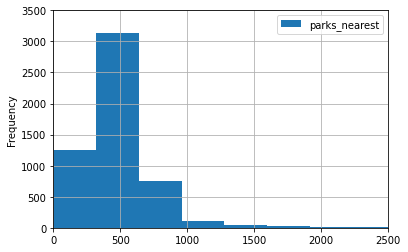

In [209]:
ax = data.plot(kind='hist', y='parks_nearest', grid=True, xlim=(0,2500), ylim=(0,3500))
plt.show()

### Исследовательский анализ дня публикации заявления
`day_of_week_exposition` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [210]:
data['day_of_week_exposition'].describe()

count    15354.000000
mean         2.597239
std          1.807936
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week_exposition, dtype: float64

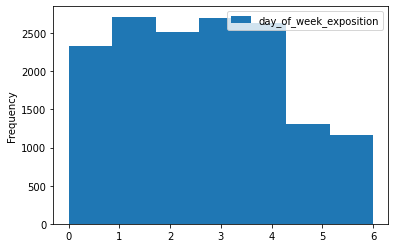

In [211]:
ax = data.plot(kind='hist', y='day_of_week_exposition', bins=7)
plt.show()

Количество заявлений которое было подано в выходные дни значительнее меньше, чем в будние дни.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В выходные люди меньше всего публикуют квартир. Ты полностью прав. 
</div 

В прошлом мы добавили столбец `sold`, где хранились данные о том, продались заявления или нет. Хотелось бы проверить, есть ли зависимость между тем, в какой день подались заявление, и тем продались они или нет. 

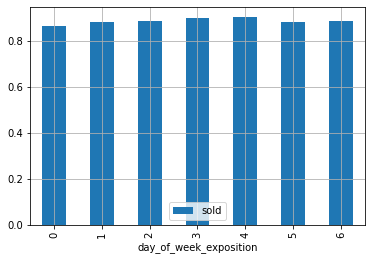

In [212]:
ax = pd.pivot_table(data, index='day_of_week_exposition', values='sold', aggfunc=np.mean).plot(kind='bar', grid=True)
plt.show()

Как можно заметить, заявления одинаково хорошо продовались (в процете от всех заявлений поданных в тот день) независимо от дня

### Исследовательский анализ месяца публикации заявления
`month_exposition` - месяц, когда заявление было подано.

In [213]:
data['day_of_week_exposition'].describe()

count    15354.000000
mean         2.597239
std          1.807936
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week_exposition, dtype: float64

In [214]:
data['month_exposition'].value_counts()

2     1757
3     1665
4     1602
11    1593
10    1422
9     1325
8     1144
6     1089
7     1053
12     996
1      971
5      737
Name: month_exposition, dtype: int64

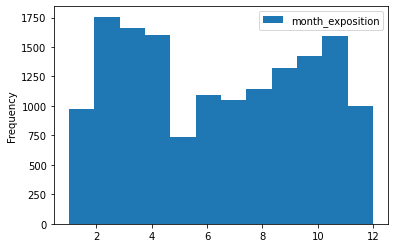

In [215]:
ax = data.plot(kind='hist', y='month_exposition', bins=12)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот здесь в просадке месяца с большим количеством выходных дней. 
</div 

Меньше всего заявлений подавалось в *Мае, Июне, Июле, Августе, Декабре и Январе*. Скорее всего это связано с тем, что все эти месяца связаны с отдыхом/праздниками (Майские праздике, Лето, Новый Год) и люди не просто не хотят заморачиваться с этим. Можно это сравнить с тем, как в выходные дни в прошлом задании меньше всего подавалось заявлений в выходные дни.

В прошлом мы добавили столбец `sold`, где хранились данные о том, продались заявления или нет. Хотелось бы проверить, есть ли зависимость между тем, в какой месяц подались заявление, и тем продались они или нет. 

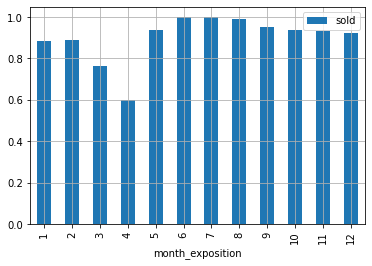

In [216]:
ax = pd.pivot_table(data, index='month_exposition', values='sold', aggfunc=np.mean).plot(kind='bar', grid=True)
plt.show()

In [217]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Скорее всего просядание в продаваемости связано с тем, что они просто напросто не успели продаться, так как последний день заявления 3 мая, что совсем близко к апрелю. 

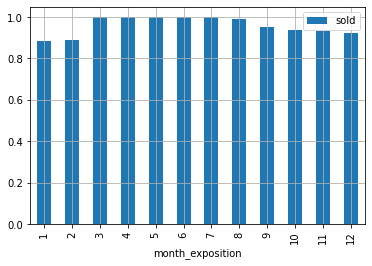

In [218]:
ax = pd.pivot_table(data.query('first_day_exposition < datetime.date(2019,3,1)'), index='month_exposition', values='sold', aggfunc=np.mean).plot(kind='bar', grid=True)
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
К этому моменту у тебя осталось  чуть больше половину значений от изначальных данных. Так много убирать не стоит. Вообще придерживайся правила, что если удаляем, то не более 10%. Если выьросов больше 10 %, то жто уже не выбросы, а скорее тренд. Поэтому, надо пересмотреть удаление и сделать его более мягким. 
</div 

In [219]:
print('Data before 2019-3-1 - ',data.query('first_day_exposition < datetime.date(2019,3,1)')['total_images'].count())

Data before 2019-3-1 -  13806


In [220]:
print('Data after 2019-3-1 - ',data.query('first_day_exposition >= datetime.date(2019,3,1)')['total_images'].count())

Data after 2019-3-1 -  1548


<div class="alert alert-block alert-info">
<b>💾 Explaining:</b> 

Извините, тут наверное я неправильно объяснил. Ничего я не удалял. Я просто рассмотрел срез данных до определенной даты. Как следует из следующего пункта большинство заявлений успевают продаваться меньше, чем за 60 дней, поэтому можно предположить, что если прошло меньше двух месяцев до выгрузки базы данных, то многие заявления просто не успели продаться к тому моменту. Такой мой был вывод и объяснения тому графику.  
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Хорошо, с этим разобрались, но на будущее, имей в виду. 

После того как убрали совсем поздние заявления данные смогли нормализоваться ,

### Исследование как быстро продавались заявления.

Дня начало необходимо будет "отбросить" те, заявления которые не продались, поскольку они будет мешать исследованию.

In [221]:
data.loc[data['sold'], 'days_exposition'].describe()

count    13623.000000
mean        81.719225
std         63.575288
min          1.000000
25%         32.000000
50%         60.000000
75%        120.000000
max        252.000000
Name: days_exposition, dtype: float64

После устранений аномалий были получены следующие метрики:
- среднее 81 дней;
- медианное 60 дней.

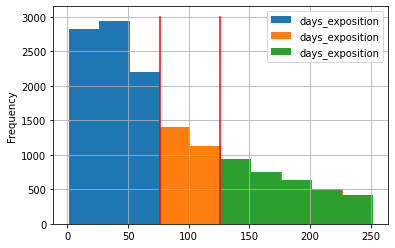

In [222]:
ax = data[data['sold']].plot(kind='hist', y='days_exposition', grid=True, bins=10)
data[(data['sold'])&(data['days_exposition']>75)].plot(kind='hist', y='days_exposition', grid=True, bins=7, ax=ax)
data[(data['sold'])&(data['days_exposition']>125)].plot(kind='hist', y='days_exposition', grid=True, bins=5, ax=ax)
y =  np.linspace(0,3000,100)
plt.plot(100*[76], y, '-r')
y =  np.linspace(0,3000,100)
plt.plot(100*[126], y, '-r')
plt.show()

Как можно заметить большинство заявлений продались за первые 75 дней. Соответственно будем делить, заявления на быстро проданные, если они продались меньше чем за 75 дней, и необычайно долгие - больше 125

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот тут стоило бы рассмотреть график чуть более подробно. Там можно заметить выбивающиеся значения. Как думаешь, о чем они говорят. 
</div 

<div class="alert alert-block alert-info">
<b>💾 Fixing:</b> 

    
</div>


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Вот и легенды есть. Отлично.  

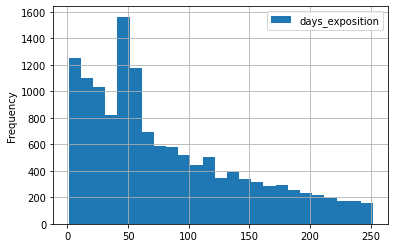

In [223]:
ax = data[data['sold']].plot(kind='hist', y='days_exposition', grid=True, bins=25)
plt.show()

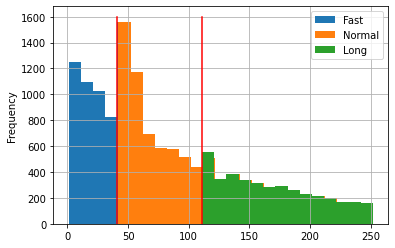

In [224]:
ax = data[data['sold']].plot(kind='hist', y='days_exposition', grid=True, bins=25)
data[(data['sold'])&(data['days_exposition']>41)].plot(kind='hist', y='days_exposition', grid=True, bins=21, ax=ax)
data[(data['sold'])&(data['days_exposition']>110)].plot(kind='hist', y='days_exposition', grid=True, bins=14, ax=ax)
ax.legend(['Fast', 'Normal', 'Long'])
y =  np.linspace(0,1600,100)
plt.plot(100*[41], y, '-r')
y =  np.linspace(0,1600,100)
plt.plot(100*[111], y, '-r')
plt.show()

<div class="alert alert-block alert-info">
<b>💾 Fixing:</b> 

Согласно [презентации от Сбербанка](https://www.sberbank.com/common/img/uploaded/files/pdf/analytics/prodat_kvartiru.pdf) после прохождения определенного количества дней на квартиру начинают предлагать скидки. Можно предположить, что скачки в гистограмме вызваны именно этим, условно говоря после 40 дней начинают предлагать первые скидки. После 110 дней вторые. 

Тогда можно разделить данные по следующему методу:
- быстрые заявление, те которые продались до первых скидок т.е. быстрее 40 дней;
- номальные заявления, те которые продались после первых скидок 40-110;
- долгие заявления, те которые продались после вторых скидок, >110.
    
</div>

### Исследование различных факторов которые влияют на цену заявления.

In [225]:
### Визуализация для категориальных данных.
def data_plot(data, column, condition='ceiling_height > 0', do_corr=True, label='Исследование фактора для Питера', categorical=True):
    if categorical:
        ax = pd.pivot_table(
        data.query(condition), index=column, values='last_price', aggfunc=np.median
        ).plot(kind='bar', grid=True)
    else:
        ax = data.query(condition).plot(kind='scatter',y='last_price', x=column, grid=True, alpha=0.6)
    ax.set_title(label)
    plt.show()
    if do_corr:
        display(data.query(condition)[[column, 'last_price']].corr()) ### Коэффициент корреляции
    else:
        return 0
    return data.query(condition)[[column, 'last_price']].corr()

Как было расмотрено в предыдущих пунктах цена в Питере и вне его сильно различается, потом будем рассматривать такие заявления отдельно.

#### Фактор - количество комнат

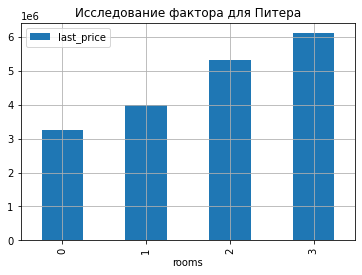

rooms  last_price
rooms       1.000000    0.496159
last_price  0.496159    1.000000

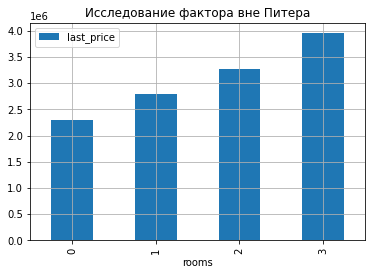

rooms  last_price
rooms       1.000000    0.331605
last_price  0.331605    1.000000

In [226]:
table_peter_corr={}
table_not_peter_corr={}
table_peter_corr['rooms'] = data_plot(data,'rooms','locality_name == "Санкт-Петербург"' )['rooms']['last_price']
table_not_peter_corr['rooms'] = data_plot(data,'rooms','locality_name != "Санкт-Петербург"',label='Исследование фактора вне Питера' )['rooms']['last_price']

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен. 
</div 

Интересно, что в Питере стоимость квартиры значительней больше зависит от количества комнат чем вне его (0.5 против 0.3 коэффициента корреляции). В целом связь между количеством комнат и ценой присутствует, но она не сильная.

#### Фактор - тип этажа

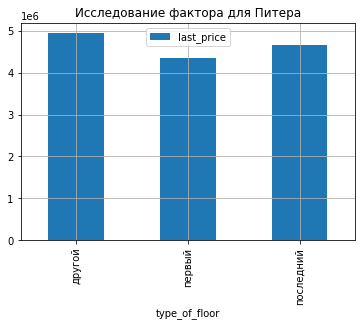

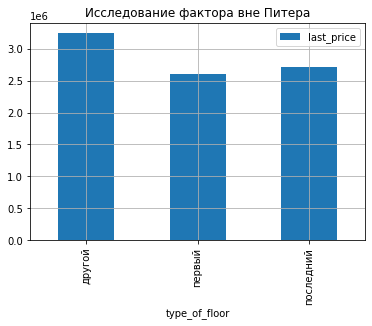

In [227]:
data_plot(data,'type_of_floor','locality_name == "Санкт-Петербург"', False )
data_plot(data,'type_of_floor','locality_name != "Санкт-Петербург"', False, 'Исследование фактора вне Питера' )
pass

Можно заметить, что квартиры на первом этаже в среднем стояли меньше, чем на любом другом, хотя есть разница между квартирами в Питере и вне его. Например, последний этаж и любой другой приблизительно одинаковы по стоимости в Питере, тогда как "другой" значительней дороже первого и последнего вне Питере. Хотя в целом, данные приблизительно одинаковы.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

#### Фактор - день размещения

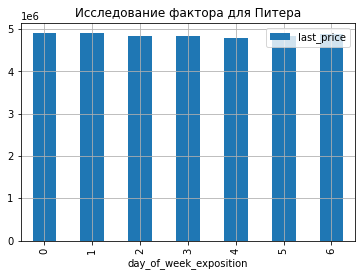

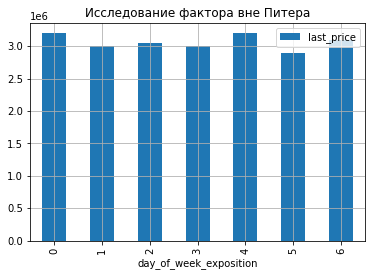

0

In [232]:
data_plot(
    data,'day_of_week_exposition','locality_name == "Санкт-Петербург"',False
)
data_plot(
    data,'day_of_week_exposition','locality_name != "Санкт-Петербург"', False, 'Исследование фактора вне Питера'
)

Можно заметить, что никакой зависимости между ценой и днем подачи заявления нет.

#### Фактор - месяц размещения

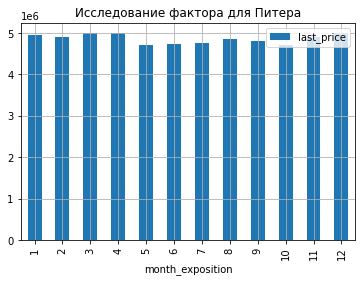

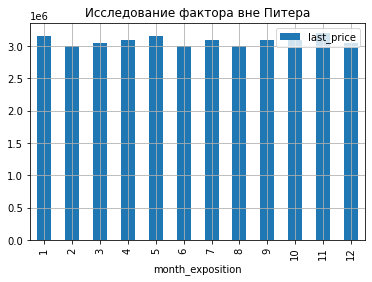

0

In [233]:
data_plot(
    data,'month_exposition','locality_name == "Санкт-Петербург"',False
)
data_plot(
    data,'month_exposition','locality_name != "Санкт-Петербург"', False, 'Исследование фактора вне Питера'
)

Можно заметить, что никакой зависимости между ценой и месяцем подачи заявления нет.

#### Фактор - год заявления

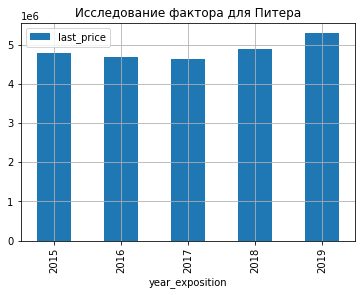

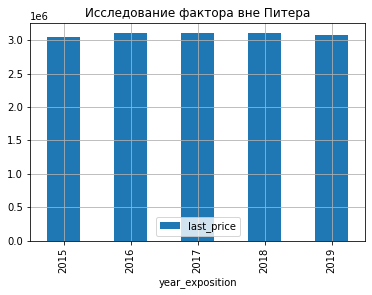

0

In [234]:
data_plot(
    data,'year_exposition','locality_name == "Санкт-Петербург"',False
)
data_plot(
    data,'year_exposition','locality_name != "Санкт-Петербург"', False, 'Исследование фактора вне Питера'
)

Связь между ценой квартиры и годом подачи заявления в Питере крайне слабая, но можно заметить, что с течением времени, цена все же немного возрастает. В то время как вне Питере абсолютно никакой закономерности не прослеживается.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Успех
    
А вот тут не согласен. Тут надо убрать подсчет зависимости для дня, месяца и года экспозиции.  У этих параметров нет линейной связи и звисимость надо считать только по графику. 
</div 

    
<div class="alert alert-block alert-info">
<b>💾 Fixing:</b> 
    
Убрал коэффициент корреляции
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Вот теперь все стало на свои места. Здорово. 

#### Фактор - площади кухни

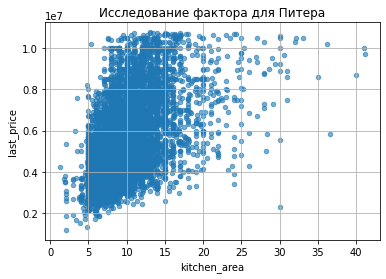

kitchen_area  last_price
kitchen_area      1.000000    0.519401
last_price        0.519401    1.000000

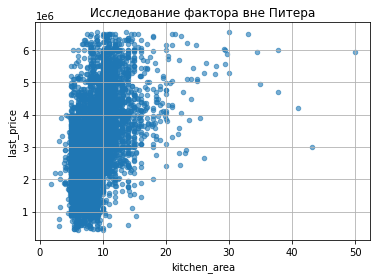

kitchen_area  last_price
kitchen_area      1.000000    0.460719
last_price        0.460719    1.000000

In [235]:
table_peter_corr['kitchen_area'] = data_plot(
    data,'kitchen_area','locality_name == "Санкт-Петербург"', categorical=False
)['kitchen_area']['last_price']
table_not_peter_corr['kitchen_area'] = data_plot(
    data,'kitchen_area','locality_name != "Санкт-Петербург"', True, 'Исследование фактора вне Питера', False
)['kitchen_area']['last_price']

Связь площади кухни и стоимости присутствует, но она слабая. Опять же вне Питера фактор влияет меньше.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А здесь все по делу. Зависимость есть и она слабая. 
</div 

#### Фактор - площадь жилой части

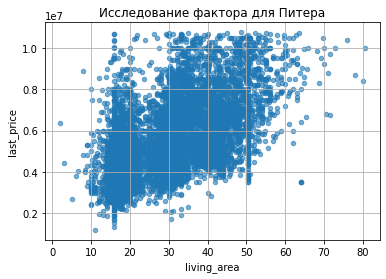

living_area  last_price
living_area     1.000000    0.603365
last_price      0.603365    1.000000

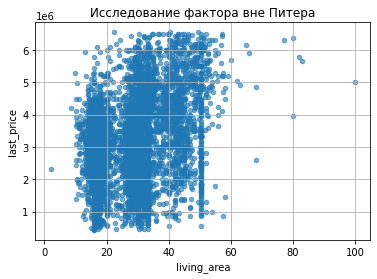

living_area  last_price
living_area      1.00000     0.36142
last_price       0.36142     1.00000

In [236]:
table_peter_corr['living_area'] = data_plot(
    data,'living_area','locality_name == "Санкт-Петербург"', categorical=False
)['living_area']['last_price']
table_not_peter_corr['living_area'] = data_plot(
    data,'living_area','locality_name != "Санкт-Петербург"', True, 'Исследование фактора вне Питера', False
)['living_area']['last_price']

Можно заметить на обоих графиках наличие трех условных пятна, которые связаны с тем, что жилая площадь имеет сильную зависимость от количества комнат, соответственно эти пятна разделены на количество комнат.

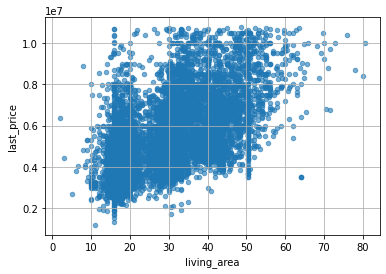

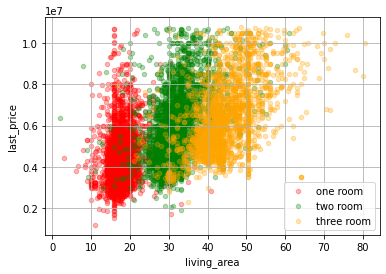

In [237]:
ax = data.query('locality_name == "Санкт-Петербург"').plot(kind='scatter',y='last_price', x='living_area', grid=True, alpha=0.6)
plt.show()
ax = data.query('(locality_name == "Санкт-Петербург")and(rooms==1)').plot(kind='scatter',y='last_price', x='living_area', grid=True, alpha=0.3, color='red')
ax = data.query('(locality_name == "Санкт-Петербург")and(rooms==2)').plot(kind='scatter',y='last_price', x='living_area', grid=True, alpha=0.3,ax=ax,color='green') 
ax = data.query('(locality_name == "Санкт-Петербург")and(rooms==3)').plot(kind='scatter',y='last_price', x='living_area', grid=True, alpha=0.3,ax=ax,color='orange')                
ax.legend(['one room', 'two room', 'three room'])
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут бы надо легенду вывести, на которой будет видно, каким цветов обозначаются те или инные данные. 
</div 

    
<div class="alert alert-block alert-info">
<b>💾 Fixing:</b> 
    
Вывел.   
</div>

В целом связь между жилой площадью и ценой **В Питере** прослеживается, хотя того же самого нельзя сказать про те заявления вне Питера.

#### Фактор - общей площади

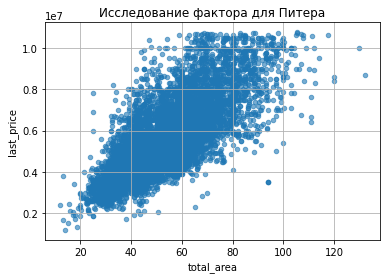

total_area  last_price
total_area    1.000000    0.782843
last_price    0.782843    1.000000

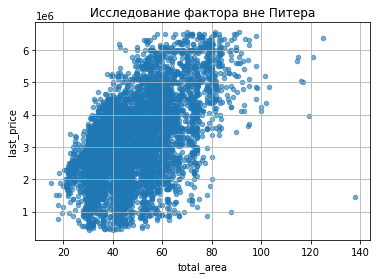

total_area  last_price
total_area    1.000000    0.553733
last_price    0.553733    1.000000

In [238]:
table_peter_corr['total_area'] = data_plot(
    data,'total_area','locality_name == "Санкт-Петербург"', categorical=False
)['total_area']['last_price']
table_not_peter_corr['total_area'] = data_plot(
    data,'total_area','locality_name != "Санкт-Петербург"', True, 'Исследование фактора вне Питера', False
)['total_area']['last_price']

In [241]:
print('Коэффициенты корреляции в Питере')
display(pd.DataFrame(
    sorted(table_peter_corr.items(), key=operator.itemgetter(1),reverse=True),
    index=['']*4,
    columns=['']*2
))
print('Коэффициенты корреляции вне Питера')
pd.DataFrame(
    sorted(table_not_peter_corr.items(), key=operator.itemgetter(1),reverse=True),
    index=['']*4,
    columns=['']*2
)

Коэффициенты корреляции в Питере


total_area  0.782843
   living_area  0.603365
  kitchen_area  0.519401
         rooms  0.496159

Коэффициенты корреляции вне Питера


total_area  0.553733
  kitchen_area  0.460719
   living_area  0.361420
         rooms  0.331605

Можно заметить, что общая площадь в обоих случая оказало наибольшее влияние на стоимость квартиры. Хотя опять же вне Питера оно слабее.
#### Промежуточный вывод
В целом по иследовании можно сделать вывод, что категориальные переменные по типу "когда было выставленно заявление" не оказывает влияние на стоимость квартиры. В то время как факторы связанные с площадью оказывают прямое воздействие. 

### Задание 1

"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [242]:
table_task1 = pd.pivot_table(data,index='locality_name', values='price_per_square_meter', aggfunc=[len, np.mean])
table_task1.columns=['count', 'mean_price']
display(table_task1.sort_values(by='count',ascending=False).head(10))
display(
    table_task1.sort_values(
        by='count',ascending=False
    ).head(10).sort_values(  # Соортировка таблицы, чтобы выбрать максимальный и минимальный элемент
        by='mean_price'
    ).iloc[[0,-1]] # Последний и первый элемент - это соответственно максимальный и минимальный элемент
)

count     mean_price
locality_name                           
Санкт-Петербург    9727.0  105409.971268
Мурино              485.0   86737.003957
посёлок Шушары      345.0   78911.305155
Всеволожск          266.0   66923.205973
Колпино             251.0   75582.572763
посёлок Парголово   239.0   89157.691629
Гатчина             217.0   68006.310652
деревня Кудрово     215.0   92179.097555
Пушкин              187.0   97111.159195
Выборг              161.0   58364.375630

count     mean_price
locality_name                         
Выборг            161.0   58364.375630
Санкт-Петербург  9727.0  105409.971268

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг по городам получен.
</div 

Выборг - город с минимальной средней ценой 58тыс за один квадратный метр
Санкт-Петербург - город с максимальной средней ценой 105тыс за один квадратный метр

Что касается остальных населенных пунктов, то можно проследить зависимость, что цена существенно зависит от наличия каких либо значимых объектов в нем.

Естественно, Петербург будет самым дорогим из них. Пушкин - второй по стоимости город - имеет Екатериненский дворец, что придает ему более элитарный статус, а также он находится в близости от Питера

### Задание 2

"Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

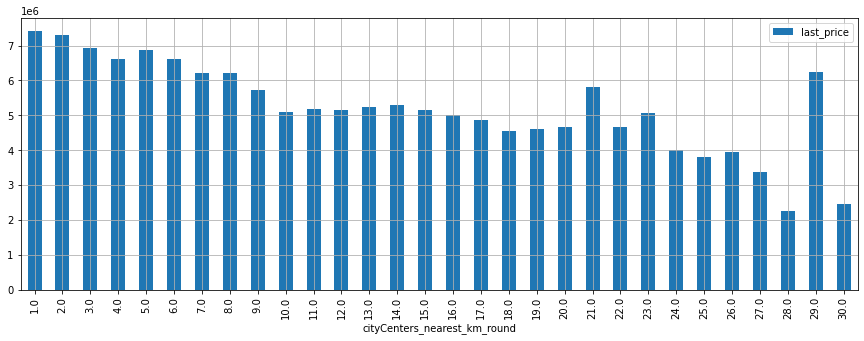

In [243]:
data['cityCenters_nearest_km_round'] = (
    (data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'] / 1000).apply(np.ceil)
).astype(int)
ax = pd.pivot_table(data,index='cityCenters_nearest_km_round', values='last_price').plot(kind='bar',grid=True, figsize=(15,5))
plt.show()
# data.drop(columns=['cityCenters_nearest_km_round'],inplace=True)

В целом прослеживается тенденция, чем дальше от города тем меньше цена, но при этом есть несколько выбросов на 21 км и 29 км.

In [244]:
data[data['cityCenters_nearest_km_round'] == 29]

total_images  last_price  total_area first_day_exposition  rooms  \
814               0     7600000       111.0           2017-07-26      3   
10798            10     4850000        62.0           2017-05-16      3   
23145            17     6300000        92.0           2017-07-20      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
814              3.00            16         63.0     12          NaN  ...   
10798            2.55             5         35.7      1        False  ...   
23145            2.70            16         46.0      7          NaN  ...   

       ponds_nearest  days_exposition  sold  price_per_square_meter  \
814             72.0               66  True            68468.468468   
10798         1344.0               63  True            78225.806452   
23145           46.0               14  True            68478.260870   

      day_of_week_exposition  month_exposition  year_exposition  \
814                        2                 7             2017   
10798                      1                 5             2017   
23145                      3                 7             2017   

       type_of_floor  cityCenters_nearest_km  cityCenters_nearest_km_round  
814           другой                      28                          29.0  
10798         первый                      29                          29.0  
23145         другой                      28                          29.0  

[3 rows x 30 columns]

3 записи, 3 заявления с трёх комнатными квартирами и 2 из 3 имеют площадь больше 90 квадратных метров. Это выброс просто является следствием недостачного количества выборки для этого расстояния.

In [245]:
data[data['cityCenters_nearest_km_round'] == 21]

total_images  last_price  total_area first_day_exposition  rooms  \
533              15     5900000   67.400002           2019-01-11      3   
673               5     4789500   46.500000           2019-03-19      1   
1102             15     9516000   85.199997           2019-03-27      3   
1401             20     7900000   52.500000           2017-10-30      2   
2854              5     3350000   30.600000           2017-06-22      1   
3621              6     2900000   30.700001           2018-08-22      1   
3736              7     6390000   54.900002           2018-01-19      3   
4156              0     5550000   63.000000           2016-03-23      3   
4650             14     4500000   37.099998           2018-10-12      1   
4878              6     6903805   57.700001           2019-03-19      1   
5787             16     9000000   88.000000           2018-08-06      3   
7870             10     3200000   36.700001           2018-10-09      1   
9163              5     5500000   53.700001           2018-03-26      2   
10238             6     7040000   49.439999           2018-12-30      2   
11117             6     6812033   60.400002           2018-07-24      2   
11293             6     3750000   42.000000           2018-09-16      1   
12462             4     7365000   79.199997           2017-11-17      2   
13901             1     2890000   31.299999           2016-05-11      1   
14459             4     9635328   76.800003           2018-10-01      1   
16002             6     6209835   51.900002           2019-03-19      1   
16251            14     3650000   48.000000           2017-08-29      2   
16284             8     5300000   66.199997           2018-10-01      3   
16907            17     4200000   50.700001           2017-04-28      2   
17546             6     6200000   69.000000           2017-05-04      3   
19205             8     4400000   54.900002           2019-04-17      2   
19521             6    10000000   71.000000           2019-01-22      2   
22332             6     5830583   52.200001           2018-12-30      1   
23320             8     3970000   40.000000           2019-03-22      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
533              2.50             9    48.500000      8          NaN  ...   
673              3.00             3    15.965325      1          NaN  ...   
1102             3.00             4    59.000000      3          NaN  ...   
1401             3.00             4    37.000000      4          NaN  ...   
2854             2.50             9    17.800000      6          NaN  ...   
3621             2.50             9    17.800000      5          NaN  ...   
3736             2.60            12    31.000000     10          NaN  ...   
4156             2.55             9    45.800000      8          NaN  ...   
4650             2.56            16    20.000000     10          NaN  ...   
4878             3.00             4    15.965325      3          NaN  ...   
5787             2.80             1    50.468246      1          NaN  ...   
7870             2.75            22    14.700000     22          NaN  ...   
9163             3.00             3    31.610000      1          NaN  ...   
10238            3.00             4    33.216786      4          NaN  ...   
11117            3.00             4    33.216786      2          NaN  ...   
11293            2.70            16    20.000000     13          NaN  ...   
12462            2.80             3    50.200000      3          NaN  ...   
13901            2.50            12    17.700000      3        False  ...   
14459            2.80             3    15.965325      3         True  ...   
16002            3.00             4    15.965325      3          NaN  ...   
16251            2.55             9    26.000000      7          NaN  ...   
16284            2.65            16    45.200000      3          NaN  ...   
16907            2.75            19    29.300000     10     

Только 28 строчек, опять же скорее всего просто недостаточно данных для более точного анализа.

In [246]:
data[data['cityCenters_nearest_km_round'] > 20]['cityCenters_nearest_km_round'].value_counts().sort_index()

21.0     28
22.0    140
23.0    103
24.0     21
25.0     20
26.0     65
27.0      2
28.0      1
29.0      3
30.0      1
Name: cityCenters_nearest_km_round, dtype: int64

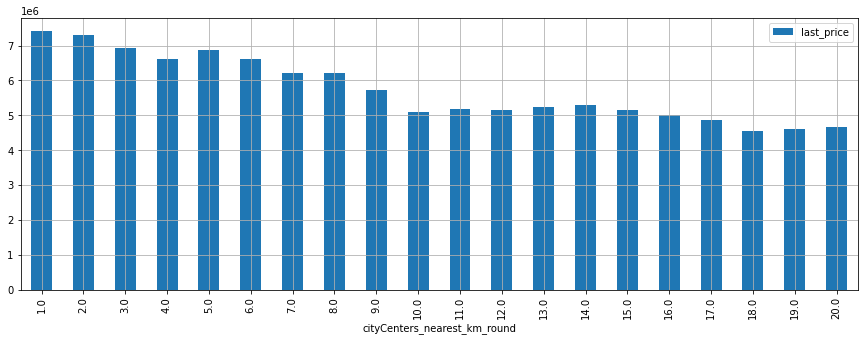

In [247]:
ax = pd.pivot_table(data[data['cityCenters_nearest_km_round'] < 21],index='cityCenters_nearest_km_round', values='last_price').plot(kind='bar',grid=True, figsize=(15,5))
plt.show()
data.drop(columns=['cityCenters_nearest_km_round'],inplace=True)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Как думаешь, а где заканчивается зона центра? 
</div 

    
<div class="alert alert-block alert-info">
<b>💾 Speculations:</b> 
    
Мнение о том, что в Питере является центром города разделяется, для кого-то это просто географичиский центр, для кого-то это исторический и культурный, но в задании было сказано, что данные делятся на, те которые задаются людьми, и топографические, определенные системой. Более чем наверняка можно предположить, что расстояние это топографические, значит берется центром именно географический. В таком случае, центр города имеет диаметр 2км.
</div>

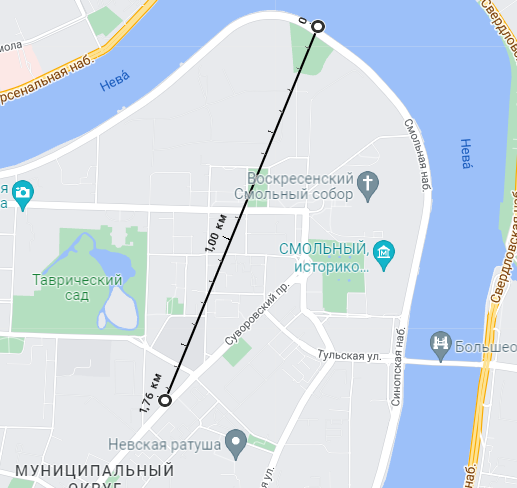

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
И в очередной раз отмечу. Мне очень нравится твой подход к изучению и использованию дополнительных источников. Работодатели это очень любят. Сохрани такой подход и на работе очень пригодится. 

После избавления от выбрасов связаных с недостаточным количеством данных, прослеживатеся четкая зависимость между расстояния до центра города и средней стоимостью квартиры.


## Общий вывод

В среднем большинство квартир успевают продоваться меньше, чем за 3 месяца.

Клиенты предпочитают подавать заявления в будние дни свободные от каких любо национальных праздников или близких к их отпуску. 

Стоимость квартиры зависит от множества факторов:
- от населённого пункта 
    + в Петербурге квартиры значительно дороже;
    + в Петербурге и вне его распределения и зависимость от различных факторов достаточно отличается;
- от общей площади
    + чем больше площадь, тем больше цену будут ставить клиеты;
    + это связь является одной из самых сильных из рассмотренных факторов;
- от расстояния до центра города
    + чем дальше от центра города, тем дешевле квартира;
- от площади жилой части
    + чем больше площадь, тем большую цену могу поставить клиетны;
    + площадь жилой части имеет сильную связь с количеством комнат, соответственно чем больше комнат, тем больше площадь;


Но также было выявлены параметры, которые не оказывают особого влияния на цену:
- дата подачи заявления
- тип этажа 

И это только те которые мы рассмотрели. 



<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за такой максимально подробный итоговый вывод. Данных нам точно хватит, чтобы составить Антифрод-систему. С таким выводом не стыдно идти к заказчику. 
</div 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:

    
#### Успех

Очень классный проект ты сделал. Мне очень понравилось проверять твою работу. Ты применяешь правильные методы для работы с данными. В работе не содержится лишнего кода. Каждое действие подкреплено комментариями. С визуализациями у тебя тоже все отлично. Отдельно отмечу раздел по Знакомству с данными и Предобработке. Очень надеюсь, что и следующие проекты ты будешь выполнять на таком же высоком уровне.
    
Но в работе есть замечания, которые надо будет поправить: 
    
* Поправить масштаб круговой диаграммы.
* Рассмотреть более подробно график по дням в экспозиции.
* Убрать подсчет корреляции для дней, месяцев и лет.
* Оставить в проекте больше данных. 
  
    
А еще, я оставил в работе рекомендации. Надеюсь, они тебе помогут в дальнейшем.
    
Буду ждать проект после доработок. Удачи. 
</div 
</div>

    
<div class="alert alert-block alert-info">
<b>💾 Finishing words:</b> 

Всё исправил.
Спасибо большое за Ваши замечания. Библиотека msno выглятит гороздо лучше, чем обычный `data.isna().sum()`
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Еще раз благодарю тебя для за такой классный проект. Очень достойная работа. С таким подходом точно станешь аналитиком. Проект я принимаю и желаю тебе успехов в дальнешей учебе. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод